In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table, vstack,hstack
import numpy.ma as ma
import sys
sys.path.insert(1, '/Users/nityaravi/Documents/Github/RotationCurves/ellipticals')
from elliptical_plottingFunctions import med_err

In [2]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
master_table_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDispDAPMeanSigma_Mvir_smoothness_lt_2_dipole_vflag_comoving_mratio.fits'
master_table = Table.read(master_table_fn, format='fits')

In [4]:
master_table[0:5]

<Table length=5>
plate ifudsgn   plateifu  ...      Mvis_R90         Mvis_Mtot_R90   
int64 bytes32   bytes32   ...      float64             float64      
----- ------- ----------- ... ------------------ -------------------
10001   12701 10001-12701 ... 10.194052181664302 -0.4430035547807538
10001   12702 10001-12702 ...                 --                  --
10001   12703 10001-12703 ... 10.601643248708838 -0.7214293900477919
10001   12704 10001-12704 ...                 --                  --
10001   12705 10001-12705 ... 10.544443187214002  -1.091547225135253

In [5]:
ellipticals = master_table[master_table['Mvir'] > 0]

## Get sample of spirals with cuts

1. vmax > 0
2. m90_disk > 0
3. 10 > v90 > 1000
4. alpha <= 99
5. vmax_err/vmax < 2
6. stellar mass > 9

In [6]:
spirals = master_table[master_table['v_max'] > 0]
spirals = spirals[spirals['M90_disk'] > 0]
spirals = spirals[spirals['alpha'] <= 99]
spirals = spirals[spirals['v_max_err']/spirals['v_max'] <= 2]

In [7]:
v90 = spirals['v_max'] * spirals['R90_kpc'] / (spirals['r_turn']**spirals['alpha'] + spirals['R90_kpc']**spirals['alpha'])**(1/spirals['alpha'])

In [8]:
all_mass_spirals = spirals[np.logical_and(v90 > 10, v90 < 1000)]
spirals = all_mass_spirals[all_mass_spirals['M90_disk']>9]

## get magnitudes

In [9]:
e_mag = np.zeros(len(ellipticals))
s_mag = np.zeros(len(spirals))

for i in range(len(e_mag)):
    e_mag[i] = ellipticals['nsa_elpetro_absmag'][i][4]
    

for i in range(len(s_mag)):
    s_mag[i] = spirals['nsa_elpetro_absmag'][i][4]

# make plots

In [10]:
plot_dir = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Ellipticals_Images/results_plots/'

In [11]:
Mvir = ellipticals['Mvir']
Mstar = ellipticals['nsa_elpetro_log_mass']
bins=np.histogram(np.hstack((Mvir,Mstar)), bins=10)[1]

## Mass and velocity dispersion histograms

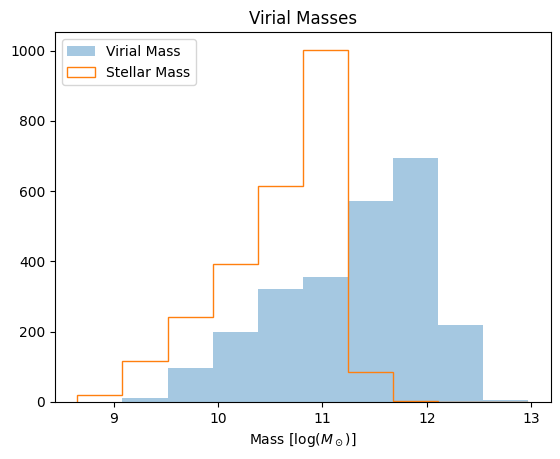

In [25]:
plt.hist(Mvir, label='Virial Mass', histtype='stepfilled', alpha=0.4, bins=bins)
plt.hist(Mstar, label='Stellar Mass', histtype='step', bins=bins)
plt.xlabel(r'Mass [$\log(M_\odot)$]')
plt.legend(loc='upper left')
plt.title('Virial Masses')
plt.savefig(plot_dir + 'mass_hist_ellipticals.png')
plt.show()

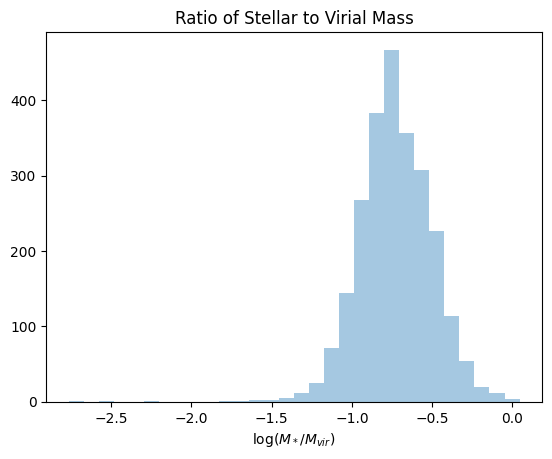

In [26]:
plt.hist(Mstar - Mvir, histtype='stepfilled', alpha=0.4, bins=30)
plt.xlabel('log($M_*/M_{vir}$)')
plt.title('Ratio of Stellar to Virial Mass')
plt.savefig(plot_dir + 'MstarMtot_hist_ellipticals.png')
plt.show()

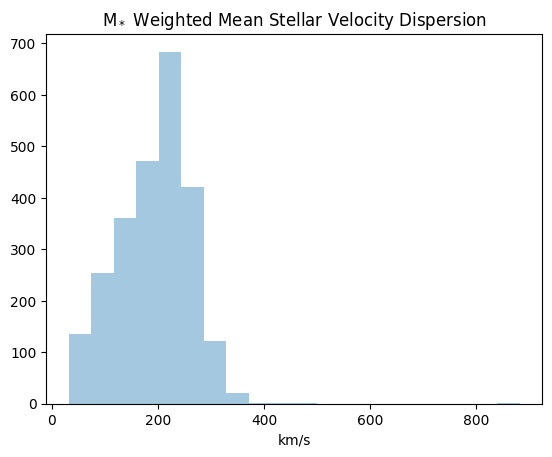

In [27]:
plt.hist(ellipticals['star_sigma'], histtype='stepfilled', alpha=0.4, bins=20)
plt.xlabel('km/s')
plt.title(r'M$_*$ Weighted Mean Stellar Velocity Dispersion')
plt.savefig(plot_dir + 'mediansigmastar_hist_ellipticals.png')
plt.show()

## ellipticals only plots

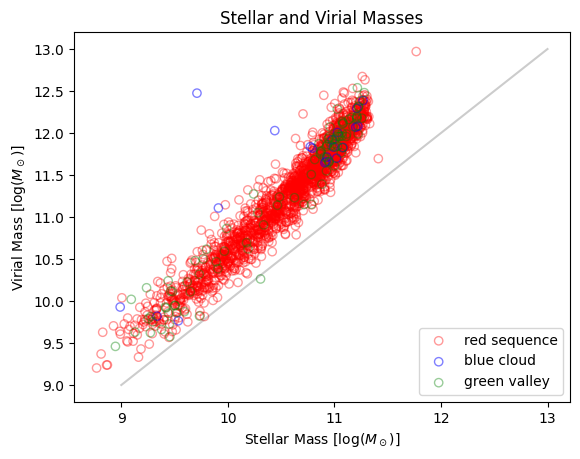

In [30]:
plt.scatter(Mstar[ellipticals['CMD_class'] == 3], Mvir[ellipticals['CMD_class'] == 3], 
            alpha=0.4, color = 'r', label='red sequence', facecolor='none')
plt.scatter(Mstar[ellipticals['CMD_class'] == 1], Mvir[ellipticals['CMD_class'] == 1], 
            color = 'b', alpha=0.5, label='blue cloud', facecolor='none')
plt.scatter(Mstar[ellipticals['CMD_class'] == 2], Mvir[ellipticals['CMD_class'] == 2], 
            alpha=0.4, color = 'g', label='green valley', facecolor='none')
plt.legend()
plt.ylabel(r'Virial Mass [$\log (M_\odot)$]')
plt.xlabel(r'Stellar Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.title('Stellar and Virial Masses')
plt.savefig(plot_dir + 'Mstar_Mtot_scatter_cmd_ellipticals.png')
plt.show()

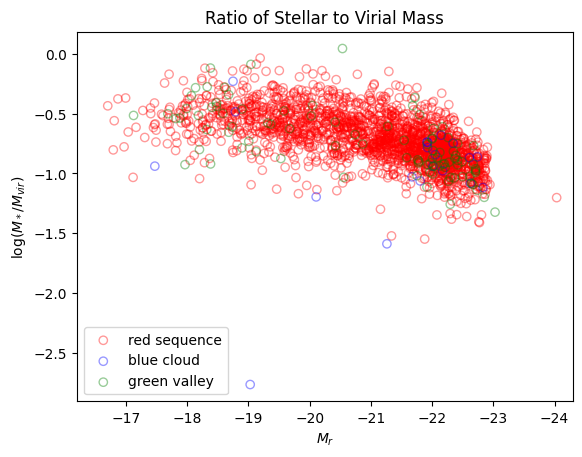

In [31]:
plt.scatter(e_mag[ellipticals['CMD_class'] == 3], Mstar[ellipticals['CMD_class'] == 3] - Mvir[ellipticals['CMD_class'] == 3], 
            alpha=0.4, color='r', label='red sequence', facecolor='none')
plt.scatter(e_mag[ellipticals['CMD_class'] == 1], Mstar[ellipticals['CMD_class'] == 1] - Mvir[ellipticals['CMD_class'] == 1], 
            alpha=0.4, color='b', label='blue cloud', facecolor='none')
plt.scatter(e_mag[ellipticals['CMD_class'] == 2], Mstar[ellipticals['CMD_class'] == 2] - Mvir[ellipticals['CMD_class'] == 2], 
            alpha=0.4, color='g', label='green valley', facecolor='none')



plt.legend()
plt.xlim(-16.2,-24.3)
plt.xlabel('$M_r$')
plt.title('Ratio of Stellar to Virial Mass')
plt.ylabel(r'$\log(M_*/M_{vir})$')
plt.savefig(plot_dir + 'Mr_MstarMtot_scatter_cmd_ellipticals.png')
plt.show()

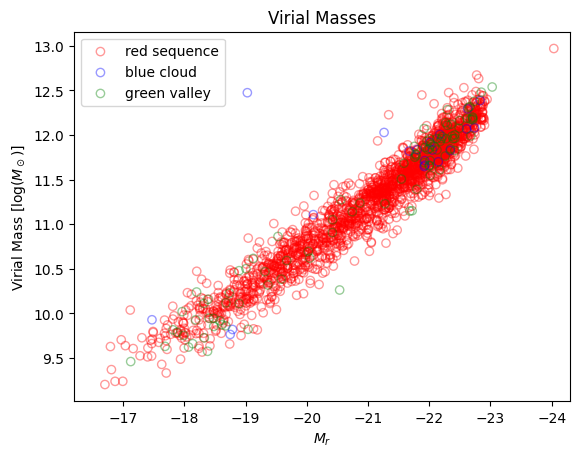

In [32]:
plt.scatter(e_mag[ellipticals['CMD_class'] == 3], Mvir[ellipticals['CMD_class'] == 3], 
            facecolor='none', color='r', alpha=0.4, label='red sequence')
plt.scatter(e_mag[ellipticals['CMD_class'] == 1], Mvir[ellipticals['CMD_class'] == 1], 
            facecolor='none', color='b', alpha=0.4, label='blue cloud')
plt.scatter(e_mag[ellipticals['CMD_class'] == 2], Mvir[ellipticals['CMD_class'] == 2], 
            facecolor='none', color='g', alpha=0.4, label='green valley')

plt.legend()
plt.xlabel('$M_r$')
plt.ylabel(r'Virial Mass [$\log(M_\odot)$]')
plt.title('Virial Masses')
plt.xlim(-16.2,-24.3)
plt.savefig(plot_dir + 'Mr_Mtot_scatter_cmd_ellipticals')
plt.show()

### dipole moment

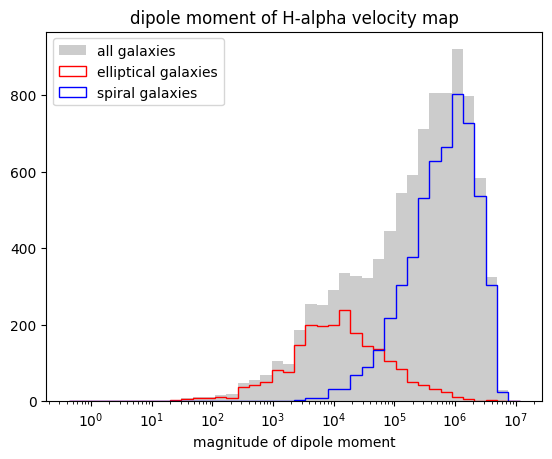

In [33]:
dipoles = master_table[master_table['dipole_moment'] > 0]
hist, bins = np.histogram(dipoles['dipole_moment'], bins=40)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(dipoles['dipole_moment'], bins=logbins, alpha=0.2, color='k', label='all galaxies')
plt.hist(dipoles[dipoles['Mvir'] > 0]['dipole_moment'], bins=logbins, histtype='step', color='r', label='elliptical galaxies')
plt.hist(spirals['dipole_moment'], bins=logbins, histtype='step', color='b', label='spiral galaxies')
plt.xscale('log')
plt.legend()
plt.title('dipole moment of H-alpha velocity map')
plt.xlabel('magnitude of dipole moment')
plt.savefig(plot_dir + 'dipolemoment_hist_ellipticals.png')

## full sample plots

### full sample stellar mass vs. total mass

In [34]:
tot_mass_bins = np.linspace(np.min(spirals['M_R90']), np.max(Mvir), 15)
tot_mass_points = (tot_mass_bins[1:] + tot_mass_bins[:-1])/2

s_mstar = []
e_mstar = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        e_mstar.append(ellipticals['nsa_elpetro_mass'][Mvir <= mass_lim])
        s_mstar.append(spirals['M90_disk'][spirals['M_R90'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        e_mstar.append(ellipticals['nsa_elpetro_mass'][np.logical_and(Mvir <= mass_lim, Mvir > lower_lim)])
        s_mstar.append(spirals['M90_disk'][np.logical_and(spirals['M_R90'] <= mass_lim, spirals['M_R90'] > lower_lim)])

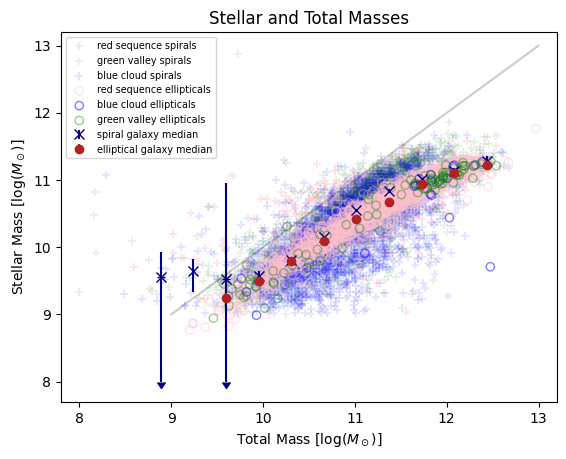

In [35]:
plt.scatter(spirals[spirals['CMD_class']==3]['M_R90'],spirals[spirals['CMD_class']==3]['M90_disk'],
            alpha=0.4, color='pink', marker='+', label='red sequence spirals')
plt.scatter(spirals[spirals['CMD_class']==2]['M_R90'],spirals[spirals['CMD_class']==2]['M90_disk'],
            alpha=0.1, color='g', marker='+', label='green valley spirals')
plt.scatter(spirals[spirals['CMD_class']==1]['M_R90'],spirals[spirals['CMD_class']==1]['M90_disk'],
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(Mvir[ellipticals['CMD_class'] == 3], Mstar[ellipticals['CMD_class'] == 3],
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 1], Mstar[ellipticals['CMD_class'] == 1],
            color = 'b', alpha=0.5, label='blue cloud ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 2], Mstar[ellipticals['CMD_class'] == 2],
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')


ep = med_err(e_mstar, logscale=False, return_logscale=True)
sp = med_err(s_mstar, logscale=True, return_logscale=True)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')


inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')



# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='elliptical galaxy median',linestyle='none')
# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='spiral galaxy median',linestyle='none')



plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Stellar Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.ylim(7.7,13.2)
plt.xlim(7.8,13.2)
plt.title('Stellar and Total Masses')
plt.savefig(plot_dir + 'Mtot_Mstar_scatter_cmd_morph.png')
plt.show()

### full sample SHMR

In [36]:
s_SHMR = []
e_SHMR = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        e_SHMR.append(Mstar[Mvir <= mass_lim] - Mvir[Mvir <= mass_lim])
        s_SHMR.append(spirals['M90_disk'][spirals['M_R90'] <= mass_lim] - spirals['M_R90'][spirals['M_R90'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        e_SHMR.append(Mstar[np.logical_and(Mvir <= mass_lim, Mvir > lower_lim)] - Mvir[np.logical_and(Mvir <= mass_lim, Mvir > lower_lim)])
        s_SHMR.append(spirals['M90_disk'][np.logical_and(spirals['M_R90'] <= mass_lim, spirals['M_R90'] > lower_lim)] - spirals['M_R90'][np.logical_and(spirals['M_R90'] <= mass_lim, spirals['M_R90'] > lower_lim)])

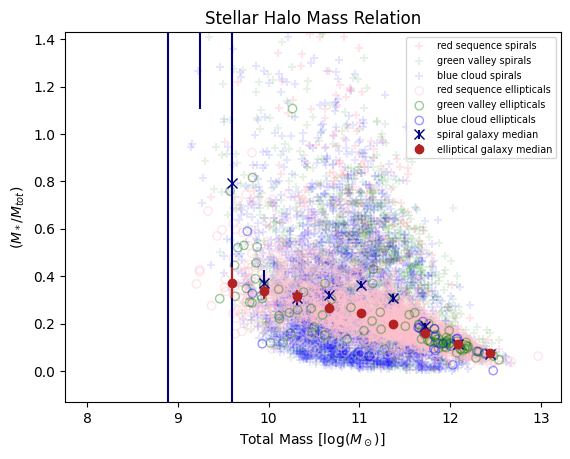

In [37]:
plt.scatter(spirals[spirals['CMD_class']==3]['M_R90'], 
            10**(spirals[spirals['CMD_class']==3]['M90_disk']-spirals[spirals['CMD_class']==3]['M_R90']),
            alpha=0.4, color='pink', marker='+', label='red sequence spirals')
plt.scatter(spirals[spirals['CMD_class']==2]['M_R90'], 
            10**(spirals[spirals['CMD_class']==2]['M90_disk']-spirals[spirals['CMD_class']==2]['M_R90']),
            alpha=0.1, color='g', marker='+', label='green valley spirals')
plt.scatter(spirals[spirals['CMD_class']==1]['M_R90'], 
            10**(spirals[spirals['CMD_class']==1]['M90_disk']-spirals[spirals['CMD_class']==1]['M_R90']),
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(Mvir[ellipticals['CMD_class'] == 3], 10**(Mstar[ellipticals['CMD_class'] == 3]-Mvir[ellipticals['CMD_class'] == 3]),
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none')
            
plt.scatter(Mvir[ellipticals['CMD_class'] == 2], 10**(Mstar[ellipticals['CMD_class'] == 2]-Mvir[ellipticals['CMD_class'] == 2]),
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')
            
plt.scatter(Mvir[ellipticals['CMD_class'] == 1], 10**(Mstar[ellipticals['CMD_class'] == 1]-Mvir[ellipticals['CMD_class'] == 1]),
            alpha=0.4, color = 'b', label='blue cloud ellipticals', facecolor='none')

ep = med_err(e_SHMR, True, False)
sp = med_err(s_SHMR, True, False)

# inf_bars = np.where(sp == np.inf)[0]
# sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7)
# plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]+0.1, uplims=True,
#              color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
# plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
#             linestyle='none', color='navy', mfc='none', mec='none')

# inf_bars = np.where(ep == np.inf)[0]
# ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none')
# plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]+0.1, uplims=True,
#              color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
# plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
#             linestyle='none', color='firebrick', mfc='none', mec='none')

# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='spiral galaxy median',linestyle='none')
            
plt.legend(fontsize='x-small')
plt.ylabel(r'$(M_*/M_{tot})$')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylim(-0.13,1.43)
plt.title('Stellar Halo Mass Relation')
plt.savefig(plot_dir + 'Mtot_MstarMtot_scatter_cmd_morph.png')
plt.show()

### total mass vs Mr

In [38]:
magnitude_bins = np.linspace(np.min(e_mag),np.max(s_mag),15)
points = (magnitude_bins[1:] + magnitude_bins[:-1])/2

e_vals = []
s_vals = []
for i in range(len(points)):
    mag_lim = magnitude_bins[i+1]
    if i == 0:
        e_vals.append(Mvir[e_mag <= mag_lim])
        s_vals.append(spirals['M_R90'][s_mag <= mag_lim])

    else:
        lower_lim = magnitude_bins[i]
        e_vals.append(Mvir[np.logical_and(e_mag <= mag_lim, e_mag > lower_lim)])
        s_vals.append(spirals['M_R90'][np.logical_and(s_mag <= mag_lim, s_mag > lower_lim)])



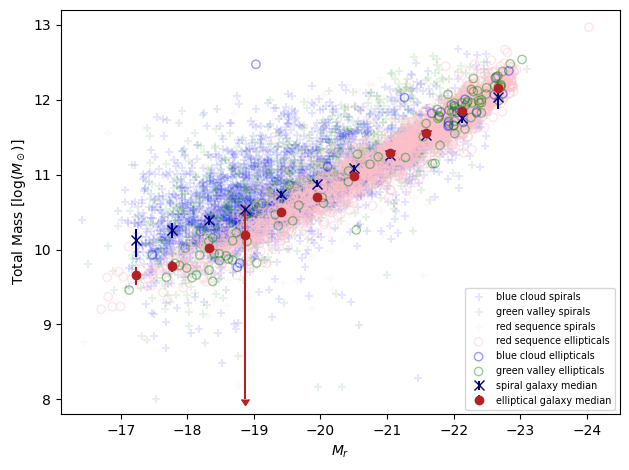

In [39]:
plt.scatter(s_mag[spirals['CMD_class'] == 1], spirals['M_R90'][spirals['CMD_class'] == 1], 
            color='blue', alpha=0.1, marker='+', label='blue cloud spirals')
plt.scatter(s_mag[spirals['CMD_class'] == 2], spirals['M_R90'][spirals['CMD_class'] == 2], 
            color='g', alpha=0.1,marker='+', label='green valley spirals')
plt.scatter(s_mag[spirals['CMD_class'] == 3], spirals['M_R90'][spirals['CMD_class'] == 3], 
            color='pink', alpha=0.1,marker='+', label='red sequence spirals')
plt.scatter(e_mag[ellipticals['CMD_class'] == 3], Mvir[ellipticals['CMD_class'] == 3], 
            color='pink', alpha=0.4, label='red sequence ellipticals', facecolor='none')
plt.scatter(e_mag[ellipticals['CMD_class'] == 1], Mvir[ellipticals['CMD_class'] == 1], 
            color='b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(e_mag[ellipticals['CMD_class'] == 2], Mvir[ellipticals['CMD_class'] == 2], 
            color='g', alpha=0.4, label='green valley ellipticals', facecolor='none')

ep = med_err(e_vals)
sp = med_err(s_vals)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7)
plt.errorbar(points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none')
plt.errorbar(points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')


plt.legend(fontsize='x-small')
plt.xlabel('$M_r$')
plt.ylabel(r'Total Mass [$\log(M_\odot)$]')
plt.tight_layout()
#plt.title('Spiral and Elliptical Galaxy Masses')
#plt.xlim(-16.9,-23.5)
#plt.xlim(-16.8,-22.9)
plt.xlim(-16.1, -24.5)
plt.ylim(7.8,13.2)
plt.savefig(plot_dir + 'Mr_Mtot_scatter_cmd_morph.png')
plt.show()

### def void and wall samples

In [12]:
s_void_mask = spirals['vflag_VF'] == 1
e_void_mask = ellipticals['vflag_VF'] == 1
s_wall_mask = spirals['vflag_VF'] == 0
e_wall_mask = ellipticals['vflag_VF'] == 0

s_void = spirals[s_void_mask]
s_mag_void = s_mag[s_void_mask]

e_void = ellipticals[e_void_mask]
e_mag_void = e_mag[e_void_mask]

s_wall = spirals[s_wall_mask]
s_mag_wall = s_mag[s_wall_mask]

e_wall = ellipticals[e_wall_mask]
e_mag_wall = e_mag[e_wall_mask]


### void vs. wall total mass(R90 for spirals) vs. Mr 

In [41]:
s_void_vals = []
e_void_vals = []
s_wall_vals = []
e_wall_vals = []


for i in range(len(points)):
    mag_lim = magnitude_bins[i+1]
    if i == 0:
        s_void_vals.append(s_void['M_R90'][s_mag_void <= mag_lim])
        e_void_vals.append(e_void['Mvir'][e_mag_void <= mag_lim])
        s_wall_vals.append(s_wall['M_R90'][s_mag_wall <= mag_lim])
        e_wall_vals.append(e_wall['Mvir'][e_mag_wall <= mag_lim])
    else:
        lower_lim = magnitude_bins[i]

        s_void_vals.append(s_void['M_R90'][np.logical_and(s_mag_void <= mag_lim, s_mag_void > lower_lim)])
        e_void_vals.append(e_void['Mvir'][np.logical_and(e_mag_void <= mag_lim, e_mag_void > lower_lim)])
        s_wall_vals.append(s_wall['M_R90'][np.logical_and(s_mag_wall <= mag_lim, s_mag_wall > lower_lim)])
        e_wall_vals.append(e_wall['Mvir'][np.logical_and(e_mag_wall <= mag_lim, e_mag_wall > lower_lim)])


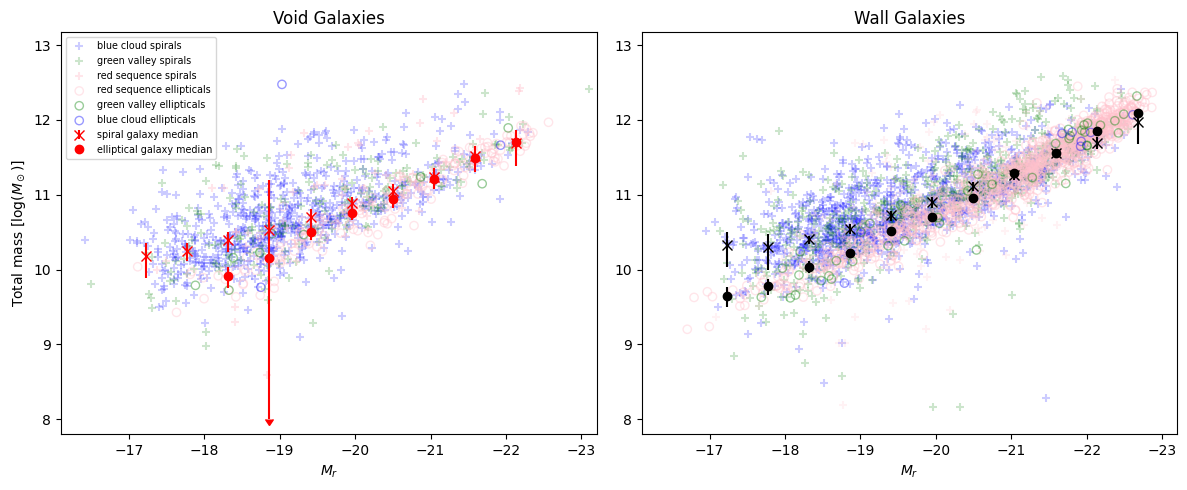

In [42]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')

ax[0].set_xlim(-16.1,-23.2)
ax[1].set_xlim(-16.1,-23.2)


ax[0].set_ylabel(r'Total mass [$\log(M_\odot)$]')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(Mvir)+0.2)
ax[1].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(Mvir)+0.2)


#void data
ax[0].scatter(s_mag_void[s_void['CMD_class'] == 1],s_void[s_void['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+', label='blue cloud spirals')
ax[0].scatter(s_mag_void[s_void['CMD_class'] == 2],s_void[s_void['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_mag_void[s_void['CMD_class'] == 3],s_void[s_void['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_mag_void[e_void['CMD_class'] == 3],e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_mag_void[e_void['CMD_class'] == 2],e_void[e_void['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_mag_void[e_void['CMD_class'] == 1],e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

#wall data
ax[1].scatter(s_mag_wall[s_wall['CMD_class'] == 1],s_wall[s_wall['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_mag_wall[s_wall['CMD_class'] == 2],s_wall[s_wall['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_mag_wall[s_wall['CMD_class'] == 3],s_wall[s_wall['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.2, marker='+')

ax[1].scatter(e_mag_wall[e_wall['CMD_class'] == 3],e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(e_mag_wall[e_wall['CMD_class'] == 2],e_wall[e_wall['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(e_mag_wall[e_wall['CMD_class'] == 1],e_wall[e_wall['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')


sp_void = med_err(s_void_vals)
sp_wall = med_err(s_wall_vals)
ep_void = med_err(e_void_vals)
ep_wall = med_err(e_wall_vals)

# ax[0].errorbar(points, sp_void[:,0], color='navy', yerr=[sp_void[:,1] ,sp_void[:,2]], 
#              marker='d', label='spiral galaxy median',linestyle='none')

# ax[0].errorbar(points, ep_void[:,0], color='firebrick', yerr=[ep_void[:,1] ,ep_void[:,2]], 
#              marker='d', label='elliptical galaxy median', linestyle='none')


# ax[1].errorbar(points, sp_wall[:,0], color='navy', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
#              marker='d',linestyle='none')

# ax[1].errorbar(points, ep_wall[:,0], color='firebrick', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
#              marker='d', linestyle='none')


inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
ax[0].errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

# ax[0].errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
#              marker='^', label='spiral galaxy median',linestyle='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
ax[0].errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

# ax[0].errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
#              marker='o', label='elliptical galaxy median', linestyle='none')


inf_bars = np.where(sp_void == np.inf)[0]
sp_wall[inf_bars][:,0]
ax[1].errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-8, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
ax[1].errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-8, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

# ax[1].errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
#              marker='^',linestyle='none')

# ax[1].errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
#              marker='o', linestyle='none')

ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mr_Mtot_scatter_cmd_morph_env.png', )


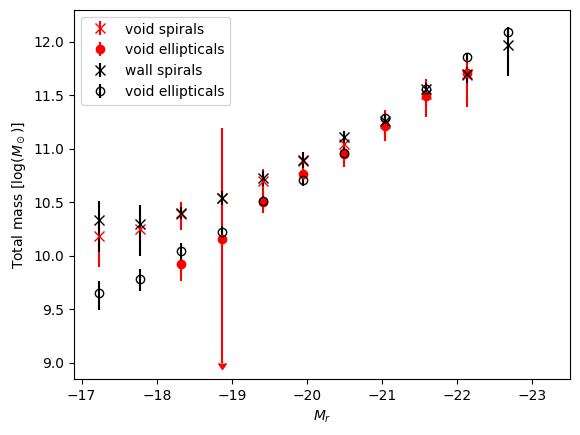

In [43]:
# plt.errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
#              marker='^', label='void spirals',linestyle='none', 
#              # markerfacecolor='none'
#             )

# plt.errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
#              marker='o', label='void ellipticals', linestyle='none', 
#              # markerfacecolor='none'
#             )


# plt.errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
#              marker='^',label='wall spirals', linestyle='none', 
#              markerfacecolor='none'
#             )

# plt.errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
#              marker='o',label='wall ellipticals', linestyle='none', 
#              markerfacecolor='none'
#             )


inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
plt.errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
plt.errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(sp_void == np.inf)[0]
sp_wall[inf_bars][:,0]
plt.errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
plt.errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',mfc='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')


#plt.title('Median total mass')
plt.xlabel('$M_r$')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')
#plt.yscale('log')
plt.legend()
plt.xlim((-16.9,-23.5))
plt.savefig(plot_dir + 'Mr_Mtot_median_morph_env.png')

plt.show()

### void vs. wall stellar mass vs total mass (all within r90 for spirals)

In [44]:
s_void_mstar = []
e_void_mstar = []

s_wall_mstar = []
e_wall_mstar = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        e_void_mstar.append(e_void['nsa_elpetro_mass'][e_void['Mvir'] <= mass_lim])
        s_void_mstar.append(s_void['M90_disk'][s_void['M_R90'] <= mass_lim])
        e_wall_mstar.append(e_wall['nsa_elpetro_mass'][e_wall['Mvir'] <= mass_lim])
        s_wall_mstar.append(s_wall['M90_disk'][s_wall['M_R90'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        e_void_mstar.append(e_void['nsa_elpetro_mass'][np.logical_and(e_void['Mvir'] <= mass_lim, e_void['Mvir'] > lower_lim)])
        s_void_mstar.append(s_void['M90_disk'][np.logical_and(s_void['M_R90'] <= mass_lim, s_void['M_R90'] > lower_lim)])
        e_wall_mstar.append(e_wall['nsa_elpetro_mass'][np.logical_and(e_wall['Mvir'] <= mass_lim, e_wall['Mvir'] > lower_lim)])
        s_wall_mstar.append(s_wall['M90_disk'][np.logical_and(s_wall['M_R90'] <= mass_lim, s_wall['M_R90'] > lower_lim)])

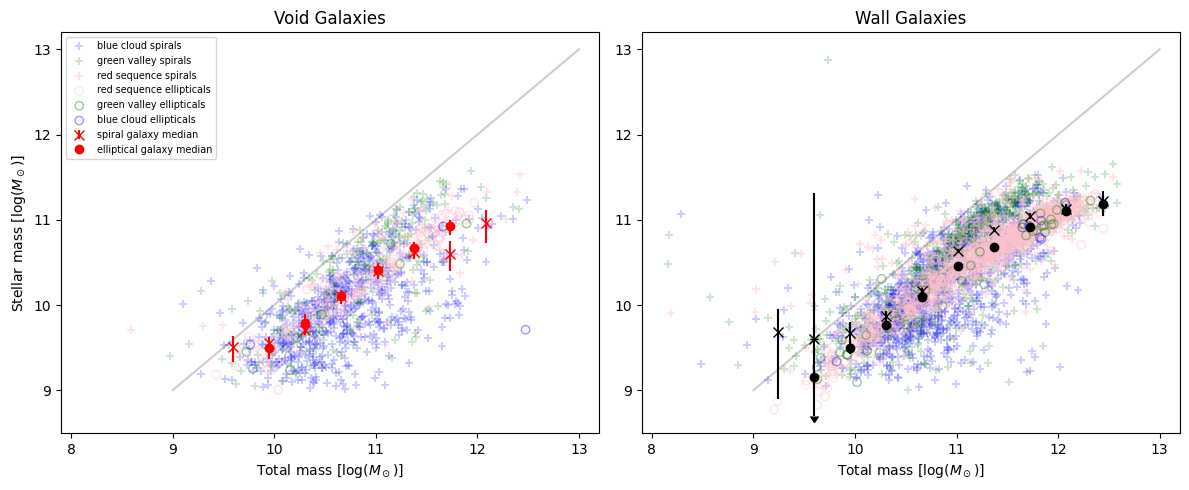

In [45]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')

ax[0].set_xlabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Total mass [$\log(M_\odot)$]')
ax[0].set_ylabel(r'Stellar mass [$\log(M_\odot)]$')

ax[0].set_ylim(8.5,13.2)
ax[1].set_ylim(8.5,13.2)
ax[0].set_xlim(7.9,13.2)
ax[1].set_xlim(7.9,13.2)

ax[0].plot([9,13],[9,13],color='k',alpha=0.2)
ax[1].plot([9,13],[9,13],color='k',alpha=0.2)

#void
ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M_R90'],s_void[s_void['CMD_class'] == 1]['M90_disk'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M_R90'],s_void[s_void['CMD_class'] == 2]['M90_disk'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M_R90'],s_void[s_void['CMD_class'] == 3]['M90_disk'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void[e_void['CMD_class'] == 3]['Mvir'],np.log10(e_void[e_void['CMD_class'] == 3]['nsa_elpetro_mass']),
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['Mvir'],np.log10(e_void[e_void['CMD_class'] == 2]['nsa_elpetro_mass']),
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 1]['Mvir'],np.log10(e_void[e_void['CMD_class'] == 1]['nsa_elpetro_mass']),
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



#wall
ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M_R90'],s_wall[s_wall['CMD_class'] == 1]['M90_disk'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M_R90'],s_wall[s_wall['CMD_class'] == 2]['M90_disk'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M_R90'],s_wall[s_wall['CMD_class'] == 3]['M90_disk'],
              color='pink', alpha=0.4, marker='+')

ax[1].scatter(e_wall[e_wall['CMD_class'] == 3]['Mvir'],np.log10(e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_mass']),
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['Mvir'],np.log10(e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_mass']),
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['Mvir'],np.log10(e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_mass']),
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')

sp_void_mstar = med_err(s_void_mstar)
sp_wall_mstar = med_err(s_wall_mstar)
ep_void_mstar = med_err(e_void_mstar, False, True)
ep_wall_mstar = med_err(e_wall_mstar, False, True)

inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
ax[0].errorbar(tot_mass_points, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(tot_mass_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(tot_mass_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
ax[0].errorbar(tot_mass_points, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(tot_mass_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(tot_mass_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
ax[1].errorbar(tot_mass_points, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(tot_mass_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-8.7, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(tot_mass_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
ax[1].errorbar(tot_mass_points, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(tot_mass_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-8.7, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(tot_mass_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

# ax[0].errorbar(tot_mass_points, sp_void_mstar[:,0], color='navy', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
#              marker='d', label='median spiral galaxy',linestyle='none', )

# ax[0].errorbar(tot_mass_points, ep_void_mstar[:,0], color='firebrick', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
#              marker='d', label='median elliptical galaxy ', linestyle='none', )


# ax[1].errorbar(tot_mass_points, sp_wall_mstar[:,0], color='navy', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
#              marker='d',linestyle='none')

# ax[1].errorbar(tot_mass_points, ep_wall_mstar[:,0], color='firebrick', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
#              marker='d', linestyle='none')


ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_Mstar_scatter_cmd_morph_env.png')

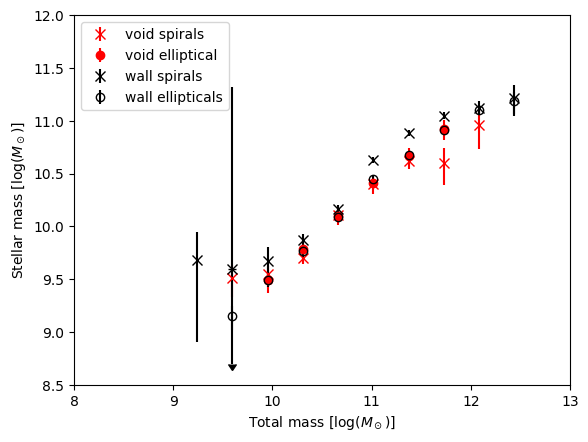

In [46]:
inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='void elliptical',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-8, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-8.7, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none',mfc='none')
plt.errorbar(tot_mass_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-8.7, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

# plt.errorbar(tot_mass_points, sp_void_mstar[:,0], color='navy', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
#              marker='d', label='void spirals',linestyle='none', markerfacecolor='none' )

# plt.errorbar(tot_mass_points, ep_void_mstar[:,0], color='firebrick', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
#              marker='d', label='void ellipticals ', linestyle='none', markerfacecolor='none')


# plt.errorbar(tot_mass_points, sp_wall_mstar[:,0], color='navy', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
#              marker='o',linestyle='none', label='wall spirals', markerfacecolor='none')

# plt.errorbar(tot_mass_points, ep_wall_mstar[:,0], color='firebrick', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
#              marker='o', linestyle='none', label='wall ellipticals', markerfacecolor='none')


#plt.title('Median total mass')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')
plt.ylabel(r'Stellar mass [$\log(M_\odot)$]')
#plt.yscale('log')
plt.legend()
plt.ylim(8.5,12)
plt.xlim(8,13)
plt.savefig(plot_dir + 'Mtot_Mstar_median_morph_env.png')
plt.show()

In [47]:
s_void_mstar_rms = []
e_void_mstar_rms = []
s_wall_mstar_rms = []
e_wall_mstar_rms = []

for i in range(len(tot_mass_points)):
    s_void_mstar_rms.append(np.log10(np.sqrt(np.mean((10**s_void_mstar[i])**2))))
    e_void_mstar_rms.append(np.log10(np.sqrt(np.mean((e_void_mstar[i])**2))))
    s_wall_mstar_rms.append(np.log10(np.sqrt(np.mean((10**s_wall_mstar[i])**2))))
    e_wall_mstar_rms.append(np.log10(np.sqrt(np.mean((e_wall_mstar[i])**2))))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3502: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/1104896357.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Total mass [$\log (M_\odot)$]')
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/1104896357.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('Stellar mass [$\log (M_\odot)$]')


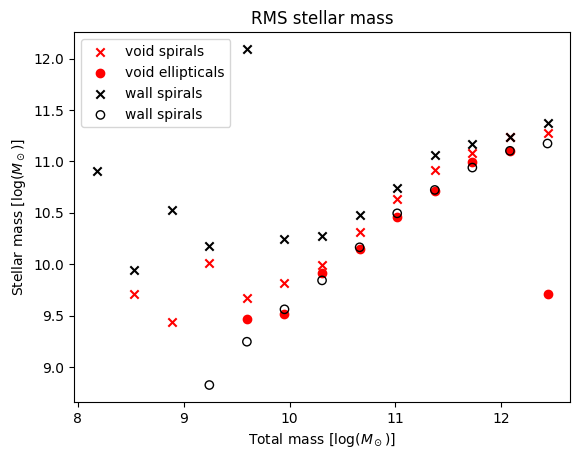

In [48]:
plt.scatter(tot_mass_points, s_void_mstar_rms, marker='x', color='r', label='void spirals')
plt.scatter(tot_mass_points, e_void_mstar_rms, marker='o', color='r', label='void ellipticals')
plt.scatter(tot_mass_points, s_wall_mstar_rms, marker='x', color='k', label='wall spirals')
plt.scatter(tot_mass_points, e_wall_mstar_rms, marker='o', color='k', label='wall spirals', fc='none')
plt.legend()
plt.xlabel('Total mass [$\log (M_\odot)$]')
plt.ylabel('Stellar mass [$\log (M_\odot)$]')
plt.title('RMS stellar mass')
plt.savefig(plot_dir + 'Mtot_Mstar_RMS_morph_env.png')
plt.show()

In [49]:
global_max = np.max([np.max(np.log10(e_void['nsa_elpetro_mass'])),np.max(np.log10(e_wall['nsa_elpetro_mass'])),
        np.max(s_void['M90_disk']), np.max(s_wall['M90_disk'])])
global_min = np.min([np.min(np.log10(e_void['nsa_elpetro_mass'])),np.min(np.log10(e_wall['nsa_elpetro_mass'])),
        np.min(s_void['M90_disk']), np.min(s_wall['M90_disk'])])

In [50]:
bins = np.linspace(global_min, global_max, 16)

/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/4291407713.py:17: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, wall_mstar_e/np.sum(wall_mstar_e), color='k', where='mid', label='wall ellipticals ({})'.format(np.sum(wall_mstar_e)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/4291407713.py:18: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, void_mstar_e/np.sum(void_mstar_e), color='r', where='mid', label='void ellipticals ({})'.format(np.sum(void_mstar_e)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/4291407713.py:20: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, void_mstar_s/np.sum(void_mstar_s), color='r', where='mid',linestyle=':', label='void spirals ({})'.format(np.sum(void_mstar_s)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/4291407713.py:16: RuntimeWarning: invalid value encountered in divide
  ax[j,k].fill_between(pts, all_m

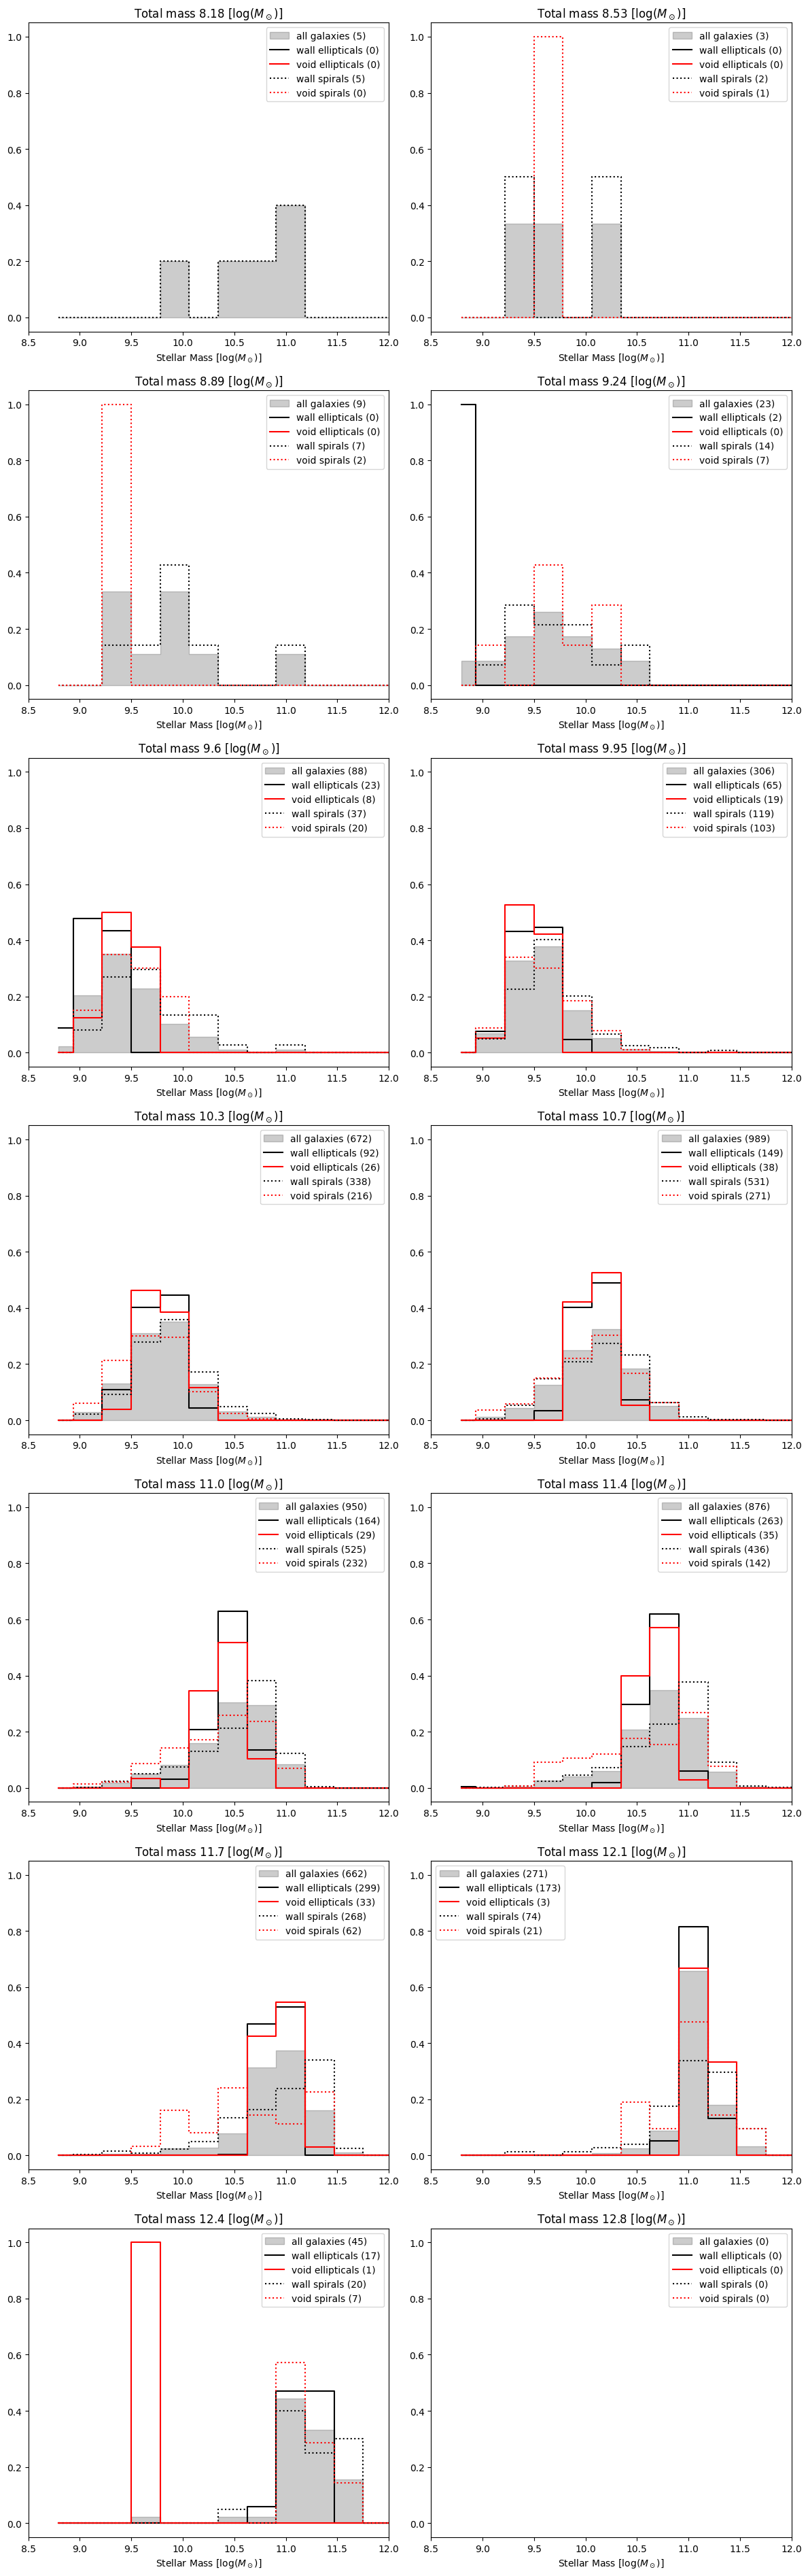

In [51]:
fig, ax = plt.subplots(7,2, figsize=(12,38))

for i in range(0,len(tot_mass_points)):
    j = int(i/2)
    k = i % 2
    
    mstar = np.hstack([s_void_mstar[i].data,np.log10(e_void_mstar[i].data), 
                       s_wall_mstar[i].data, np.log10(e_wall_mstar[i].data)])
    all_mstar, _ = np.histogram(mstar, bins=bins)
    pts = (bins[1:] + bins[:-1])/2
    wall_mstar_s, _ = np.histogram(s_wall_mstar[i], bins=bins)
    void_mstar_s, _ = np.histogram(s_void_mstar[i], bins=bins)
    wall_mstar_e, _ = np.histogram(np.log10(e_wall_mstar[i]), bins=bins)
    void_mstar_e, _ = np.histogram(np.log10(e_void_mstar[i]), bins=bins)

    ax[j,k].fill_between(pts, all_mstar/np.sum(all_mstar), 0, step = 'mid', color='k', alpha=0.2,label='all galaxies ({})'.format(np.sum(all_mstar)))
    ax[j,k].step(pts, wall_mstar_e/np.sum(wall_mstar_e), color='k', where='mid', label='wall ellipticals ({})'.format(np.sum(wall_mstar_e)))
    ax[j,k].step(pts, void_mstar_e/np.sum(void_mstar_e), color='r', where='mid', label='void ellipticals ({})'.format(np.sum(void_mstar_e)))
    ax[j,k].step(pts, wall_mstar_s/np.sum(wall_mstar_s), where = 'mid', color='k' ,linestyle=':',label='wall spirals ({})'.format(np.sum(wall_mstar_s)))
    ax[j,k].step(pts, void_mstar_s/np.sum(void_mstar_s), color='r', where='mid',linestyle=':', label='void spirals ({})'.format(np.sum(void_mstar_s)))
    
    ax[j,k].set_title(r'Total mass {:.3} [$\log (M_\odot)$]'.format(tot_mass_points[i]))
    ax[j,k].legend()
    ax[j,k].set_xlabel(r'Stellar Mass [$\log(M_\odot)$]')
    ax[j,k].set_xlim(8.5,12)
    ax[j,k].set_ylim(-0.05,1.05)

fig.tight_layout()
fig.savefig(plot_dir + 'Mstar_Mtothist_morph_env.png')

### void vs wall total vs stellar mass binned by stellar mass

In [52]:
mstar_bins = np.linspace(np.min([np.min(spirals['M90_disk']) ,np.log10(np.min(ellipticals['nsa_elpetro_mass']))]),
                             np.max([np.max(spirals['M90_disk']), np.log10(np.max(ellipticals['nsa_elpetro_mass']))]),
                             15)
                             


mstar_points = (mstar_bins[1:] + mstar_bins[:-1])/2

s_void_mtot = []
e_void_mtot = []

s_wall_mtot = []
e_wall_mtot = []

for i in range(len(mstar_points)):
    mass_lim = mstar_bins[i+1]
    if i == 0:
        e_void_mtot.append(e_void['Mvir'][np.log10(e_void['nsa_elpetro_mass']) <= mass_lim])
        s_void_mtot.append(s_void['M_R90'][s_void['M90_disk'] <= mass_lim])
        e_wall_mtot.append(e_wall['Mvir'][np.log10(e_wall['nsa_elpetro_mass']) <= mass_lim])
        s_wall_mtot.append(s_wall['M_R90'][s_wall['M90_disk'] <= mass_lim])

    else:
        lower_lim = mstar_bins[i]
        e_void_mtot.append(e_void['Mvir'][np.logical_and(np.log10(e_void['nsa_elpetro_mass']) <= mass_lim,
                                                             np.log10(e_void['nsa_elpetro_mass']) > lower_lim)])
        s_void_mtot.append(s_void['M_R90'][np.logical_and(s_void['M90_disk'] <= mass_lim, s_void['M90_disk'] > lower_lim)])
        e_wall_mtot.append(e_wall['Mvir'][np.logical_and(np.log10(e_wall['nsa_elpetro_mass']) <= mass_lim, 
                                                             np.log10(e_wall['nsa_elpetro_mass']) > lower_lim)])
        s_wall_mtot.append(s_wall['M_R90'][np.logical_and(s_wall['M90_disk'] <= mass_lim, s_wall['M90_disk'] > lower_lim)])

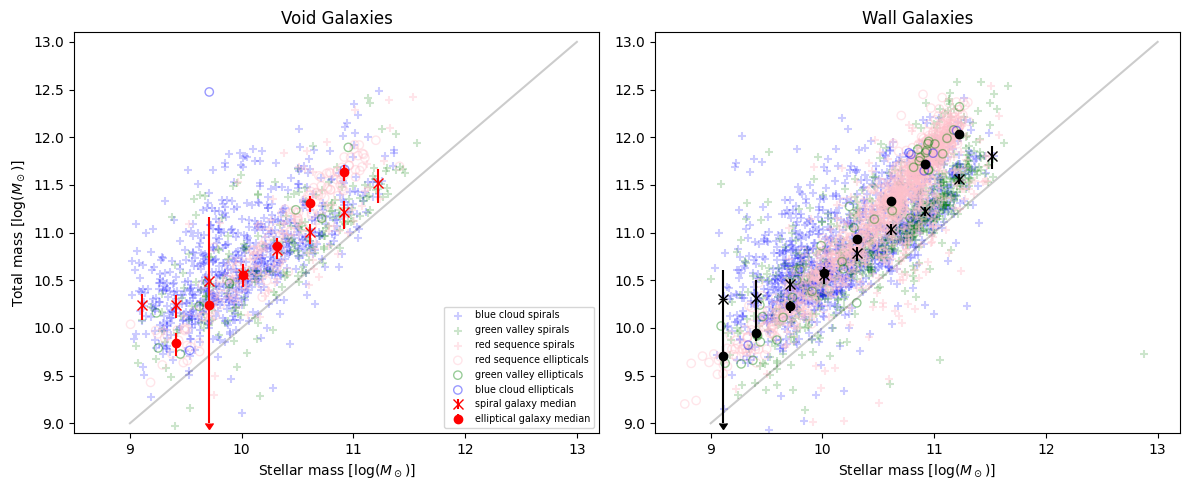

In [53]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_ylabel(r'Total mass [$\log(M_\odot)$]')
ax[0].set_xlabel(r'Stellar mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Stellar mass [$\log(M_\odot)$]')


ax[1].set_ylim(8.9,13.1)
ax[0].set_ylim(8.9,13.1)
ax[1].set_xlim(8.5,13.2)
ax[0].set_xlim(8.5,13.2)

ax[0].plot([9,13],[9,13],color='k',alpha=0.2)
ax[1].plot([9,13],[9,13],color='k',alpha=0.2)

#void
ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M90_disk'], s_void[s_void['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M90_disk'], s_void[s_void['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M90_disk'], s_void[s_void['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(np.log10(e_void[e_void['CMD_class'] == 3]['nsa_elpetro_mass']), e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(np.log10(e_void[e_void['CMD_class'] == 2]['nsa_elpetro_mass']), e_void[e_void['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(np.log10(e_void[e_void['CMD_class'] == 1]['nsa_elpetro_mass']), e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



#wall
ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M90_disk'],s_wall[s_wall['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M90_disk'],s_wall[s_wall['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M90_disk'],s_wall[s_wall['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+')

ax[1].scatter(np.log10(e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_mass']),e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(np.log10(e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_mass']), e_wall[e_wall['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(np.log10(e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_mass']), e_wall[e_wall['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')

sp_void_mstar = med_err(s_void_mtot)
sp_wall_mstar = med_err(s_wall_mtot)
ep_void_mstar = med_err(e_void_mtot, True, True)
ep_wall_mstar = med_err(e_wall_mtot, True, True)

inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
ax[0].errorbar(mstar_points, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(mstar_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(mstar_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
ax[0].errorbar(mstar_points, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(mstar_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(mstar_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
ax[1].errorbar(mstar_points, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(mstar_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(mstar_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
ax[1].errorbar(mstar_points, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(mstar_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(mstar_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mstar_Mtot_scatter_cmd_morph_env.png')

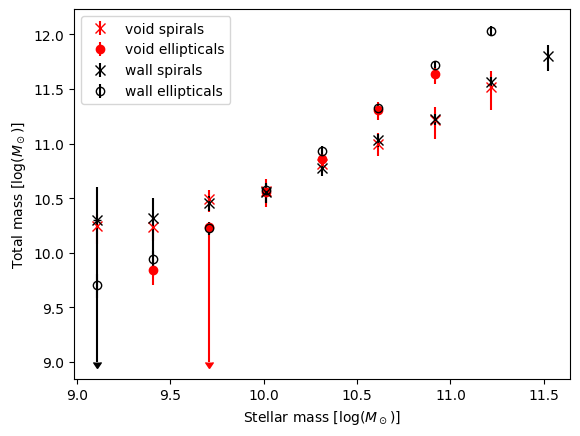

In [54]:
inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
plt.errorbar(mstar_points, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(mstar_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
plt.errorbar(mstar_points, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(mstar_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(mstar_points[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
plt.errorbar(mstar_points, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(mstar_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
plt.errorbar(mstar_points, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none',mfc='none')
plt.errorbar(mstar_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')



#plt.title('Median total mass')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')
plt.xlabel(r'Stellar mass [$\log(M_\odot)]$')
#plt.yscale('log')
plt.legend()
#plt.ylim(8.5,12)
#plt.xlim(8,14)
plt.savefig(plot_dir + 'Mstar_Mtot_median_morph_env.png')
plt.show()

In [55]:
s_void_mtot_rms = []
e_void_mtot_rms = []
s_wall_mtot_rms = []
e_wall_mtot_rms = []

for i in range(len(tot_mass_points)):
    s_void_mtot_rms.append(np.log10(np.sqrt(np.mean((10**s_void_mtot[i])**2))))
    e_void_mtot_rms.append(np.log10(np.sqrt(np.mean((10**e_void_mtot[i])**2))))
    s_wall_mtot_rms.append(np.log10(np.sqrt(np.mean((10**s_wall_mtot[i])**2))))
    e_wall_mtot_rms.append(np.log10(np.sqrt(np.mean((10**e_wall_mtot[i])**2))))

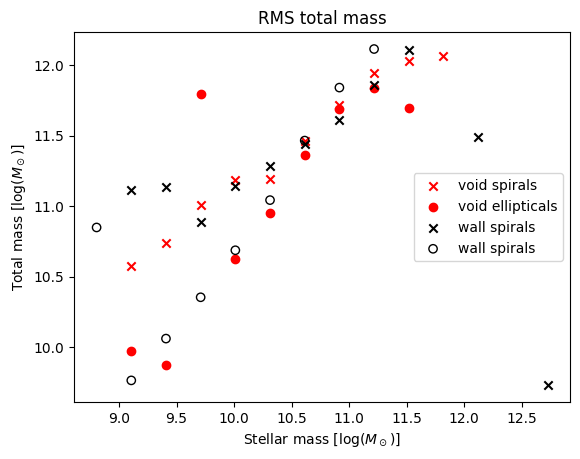

In [56]:
plt.scatter(mstar_points, s_void_mtot_rms, marker='x', color='r', label='void spirals')
plt.scatter(mstar_points, e_void_mtot_rms, marker='o', color='r', label='void ellipticals')
plt.scatter(mstar_points, s_wall_mtot_rms, marker='x', color='k', label='wall spirals')
plt.scatter(mstar_points, e_wall_mtot_rms, marker='o', color='k', label='wall spirals', fc='none')
plt.legend()
plt.ylabel(r'Total mass [$\log (M_\odot)$]')
plt.xlabel(r'Stellar mass [$\log (M_\odot)$]')
plt.title('RMS total mass')
plt.savefig(plot_dir + 'Mstar_Mtot_RMS_morph_env.png')
plt.show()

In [57]:
global_max = np.max([np.max(e_void['Mvir']),np.max(e_wall['Mvir']),
        np.max(s_void['M_R90']), np.max(s_wall['M_R90'])])
global_min = np.min([np.min(e_void['Mvir']),np.min(e_wall['Mvir']),
        np.min(s_void['M_R90']), np.min(s_wall['M_R90'])])

In [58]:
bins = np.linspace(global_min, global_max, 16)

In [59]:
len(mstar_points)

14

/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/2723424453.py:18: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, void_mstar_e/np.sum(void_mstar_e), color='r', where='mid', label='void ellipticals ({})'.format(np.sum(void_mstar_e)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/2723424453.py:19: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, wall_mstar_s/np.sum(wall_mstar_s), where = 'mid', color='k' ,linestyle=':',label='wall spirals ({})'.format(np.sum(wall_mstar_s)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/2723424453.py:20: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, void_mstar_s/np.sum(void_mstar_s), color='r', where='mid',linestyle=':', label='void spirals ({})'.format(np.sum(void_mstar_s)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/2723424453.py:17: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, w

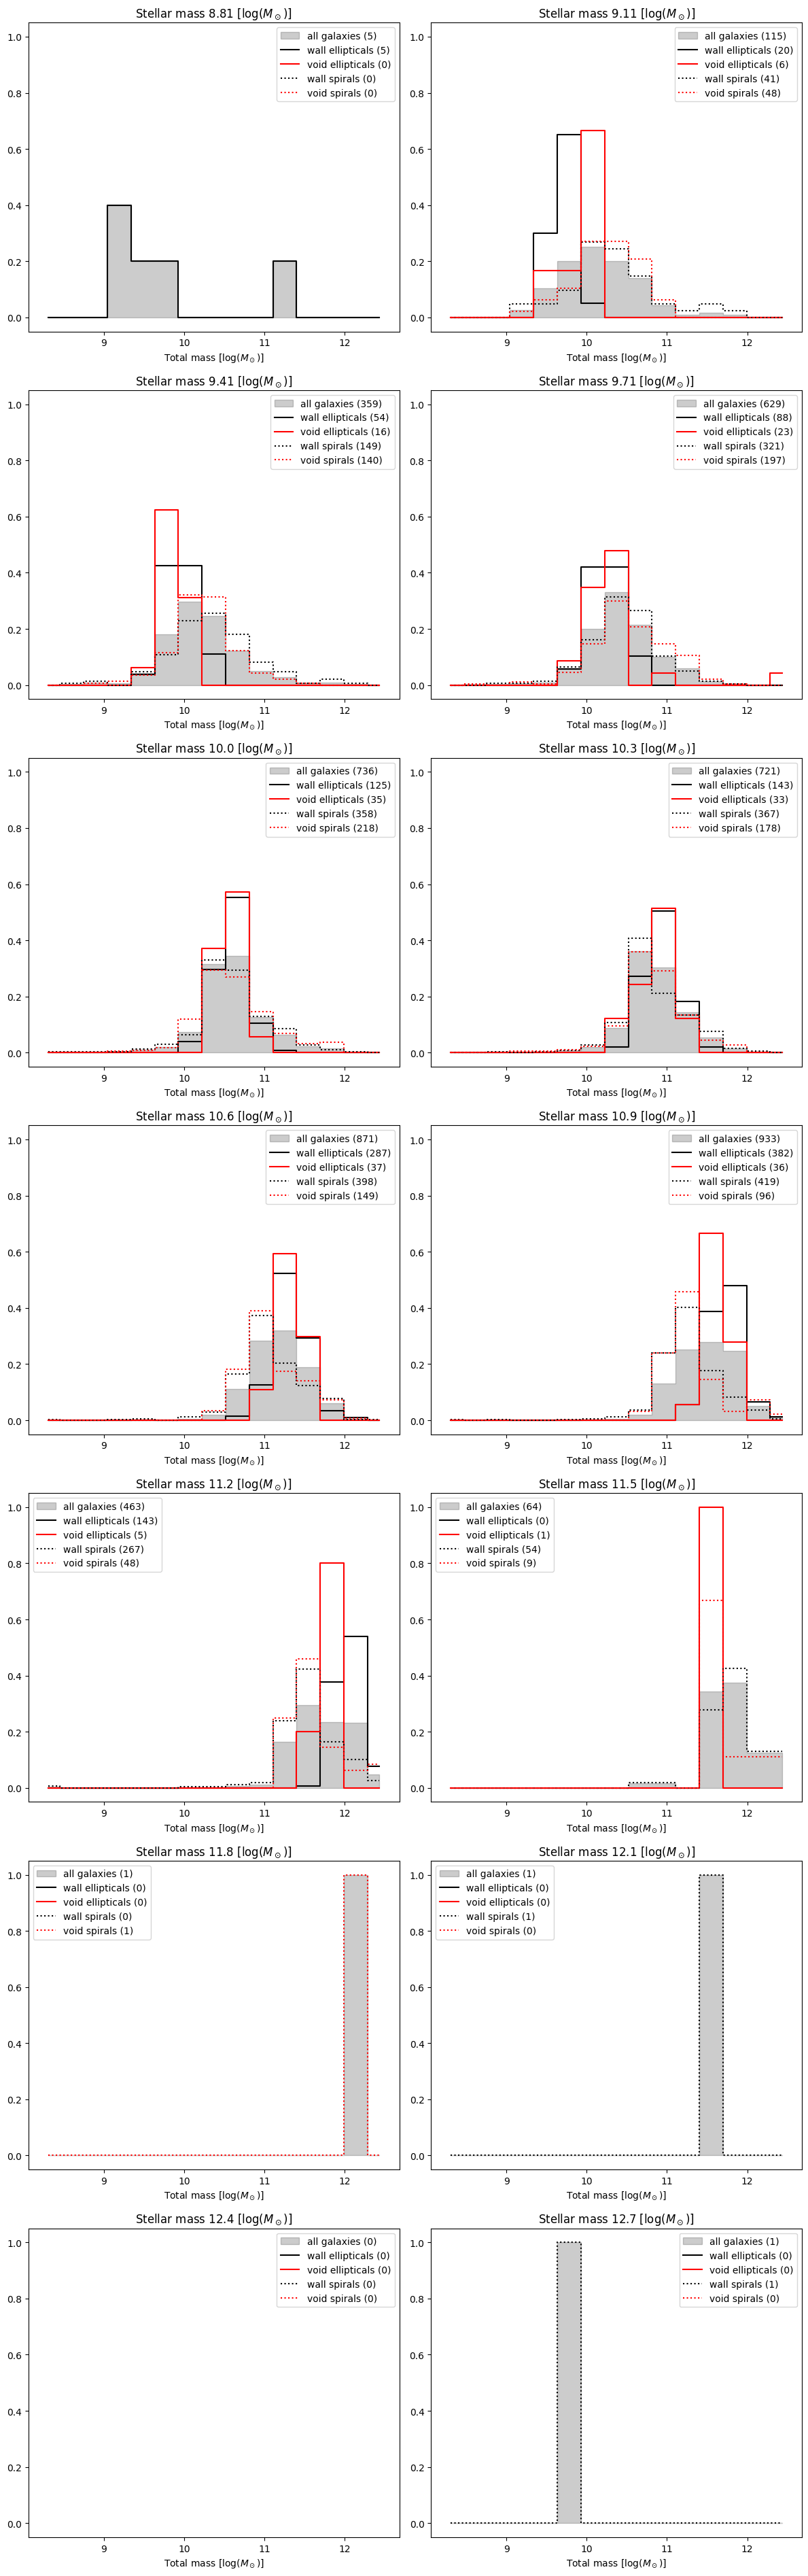

In [60]:
fig, ax = plt.subplots(7,2, figsize=(12,38))

for i in range(0,len(mstar_points)):
    j = int(i/2)
    k = i % 2
    
    mtot = np.hstack([s_void_mtot[i].data,e_void_mtot[i].data, 
                       s_wall_mtot[i].data, e_wall_mtot[i].data])
    all_mtot, _ = np.histogram(mtot, bins=bins)
    pts = (bins[1:] + bins[:-1])/2
    wall_mstar_s, _ = np.histogram(s_wall_mtot[i], bins=bins)
    void_mstar_s, _ = np.histogram(s_void_mtot[i], bins=bins)
    wall_mstar_e, _ = np.histogram(e_wall_mtot[i], bins=bins)
    void_mstar_e, _ = np.histogram(e_void_mtot[i], bins=bins)

    ax[j,k].fill_between(pts, all_mtot/np.sum(all_mtot), 0, step = 'mid', color='k', alpha=0.2,label='all galaxies ({})'.format(np.sum(all_mtot)))
    ax[j,k].step(pts, wall_mstar_e/np.sum(wall_mstar_e), color='k', where='mid', label='wall ellipticals ({})'.format(np.sum(wall_mstar_e)))
    ax[j,k].step(pts, void_mstar_e/np.sum(void_mstar_e), color='r', where='mid', label='void ellipticals ({})'.format(np.sum(void_mstar_e)))
    ax[j,k].step(pts, wall_mstar_s/np.sum(wall_mstar_s), where = 'mid', color='k' ,linestyle=':',label='wall spirals ({})'.format(np.sum(wall_mstar_s)))
    ax[j,k].step(pts, void_mstar_s/np.sum(void_mstar_s), color='r', where='mid',linestyle=':', label='void spirals ({})'.format(np.sum(void_mstar_s)))
    
    ax[j,k].set_title(r'Stellar mass {:.3} [$\log (M_\odot)$]'.format(mstar_points[i]))
    ax[j,k].legend()
    ax[j,k].set_xlabel(r'Total mass [$\log(M_\odot)$]')
    ax[j,k].set_xlim(global_min-0.1,global_max+0.1)
    ax[j,k].set_ylim(-0.05,1.05)

fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_Mstarhist_morph_env.png')

### total mass vs mr colored by wall, void

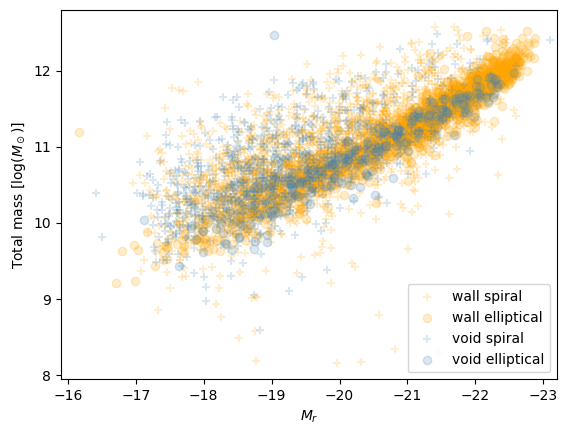

In [61]:
# distribution of all void and wall galaxies

plt.scatter(s_mag_wall,s_wall['M_R90'], color='orange', alpha=0.2, marker='+', label='wall spiral')
plt.scatter(e_mag_wall,e_wall['Mvir'], color='orange', alpha=0.2, marker='o', label='wall elliptical')
plt.scatter(s_mag_void,s_void['M_R90'], color='steelblue', alpha=0.2, marker='+', label='void spiral')
plt.scatter(e_mag_void,e_void['Mvir'], color='steelblue', alpha=0.2, marker='o', label='void elliptical')
plt.xlim(-15.9, -23.2)
plt.xlabel('$M_r$')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')
plt.legend()
plt.savefig(plot_dir + 'Mr_Mtot_scatter.png')
plt.show()

### void vs. wall 3.5 R90 Mtot vs Mr

In [62]:
s_void_3p5_vals = []
e_void_3p5_vals = []
s_wall_3p5_vals = []
e_wall_3p5_vals = []

for i in range(len(points)):
    mag_lim = magnitude_bins[i+1]
    if i == 0:
        s_void_3p5_vals.append(s_void['M'][s_mag_void <= mag_lim])
        e_void_3p5_vals.append(e_void['Mvir'][e_mag_void <= mag_lim])
        s_wall_3p5_vals.append(s_wall['M'][s_mag_wall <= mag_lim])
        e_wall_3p5_vals.append(e_wall['Mvir'][e_mag_wall <= mag_lim])
    else:
        lower_lim = magnitude_bins[i]

        s_void_3p5_vals.append(s_void['M'][np.logical_and(s_mag_void <= mag_lim, s_mag_void > lower_lim)])
        e_void_3p5_vals.append(e_void['Mvir'][np.logical_and(e_mag_void <= mag_lim, e_mag_void > lower_lim)])
        s_wall_3p5_vals.append(s_wall['M'][np.logical_and(s_mag_wall <= mag_lim, s_mag_wall > lower_lim)])
        e_wall_3p5_vals.append(e_wall['Mvir'][np.logical_and(e_mag_wall <= mag_lim, e_mag_wall > lower_lim)])

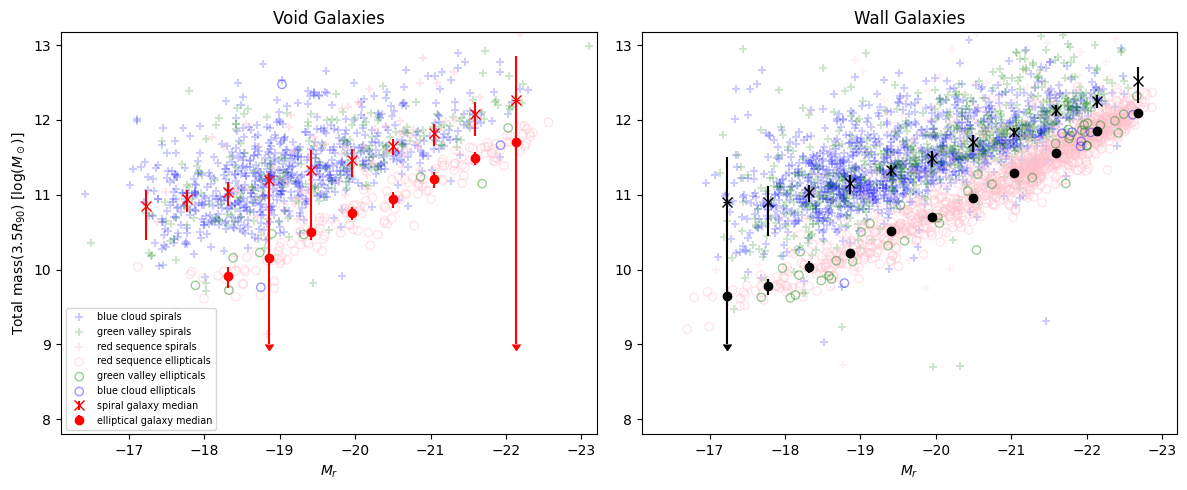

In [63]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')
ax[0].set_xlim(-16.1,-23.2)
ax[1].set_xlim(-16.1,-23.2)


ax[0].set_ylabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(Mvir)+0.2)
ax[1].set_ylim(np.min(spirals['M_R90'])-0.2,np.max(Mvir)+0.2)


#void data
ax[0].scatter(s_mag_void[s_void['CMD_class'] == 1],s_void[s_void['CMD_class'] == 1]['M'],
              color='b', alpha=0.2, marker='+', label='blue cloud spirals')
ax[0].scatter(s_mag_void[s_void['CMD_class'] == 2],s_void[s_void['CMD_class'] == 2]['M'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_mag_void[s_void['CMD_class'] == 3],s_void[s_void['CMD_class'] == 3]['M'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_mag_void[e_void['CMD_class'] == 3],e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_mag_void[e_void['CMD_class'] == 2],e_void[e_void['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_mag_void[e_void['CMD_class'] == 1],e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

#wall data
ax[1].scatter(s_mag_wall[s_wall['CMD_class'] == 1],s_wall[s_wall['CMD_class'] == 1]['M'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_mag_wall[s_wall['CMD_class'] == 2],s_wall[s_wall['CMD_class'] == 2]['M'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_mag_wall[s_wall['CMD_class'] == 3],s_wall[s_wall['CMD_class'] == 3]['M'],
              color='pink', alpha=0.2, marker='+')

ax[1].scatter(e_mag_wall[e_wall['CMD_class'] == 3],e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(e_mag_wall[e_wall['CMD_class'] == 2],e_wall[e_wall['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(e_mag_wall[e_wall['CMD_class'] == 1],e_wall[e_wall['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')



sp_void = med_err(s_void_3p5_vals)
sp_wall = med_err(s_wall_3p5_vals)
ep_void = med_err(e_void_3p5_vals)
ep_wall = med_err(e_wall_3p5_vals)

inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
ax[0].errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
ax[0].errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall == np.inf)[0]
sp_wall[inf_bars][:,0]
ax[1].errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
ax[1].errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

# ax[0].errorbar(points, sp_void[:,0], color='navy', yerr=[sp_void[:,1] ,sp_void[:,2]], 
#              marker='d', label='median spiral galaxy mass',linestyle='none')

# ax[0].errorbar(points, ep_void[:,0], color='firebrick', yerr=[ep_void[:,1] ,ep_void[:,2]], 
#              marker='d', label='median elliptical galaxy mass', linestyle='none')


# ax[1].errorbar(points, sp_wall[:,0], color='navy', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
#              marker='d',linestyle='none')

# ax[1].errorbar(points, ep_wall[:,0], color='firebrick', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
#              marker='d', linestyle='none')

ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mr_Mtot3p5_scatter_cmd_morph_env.png', )


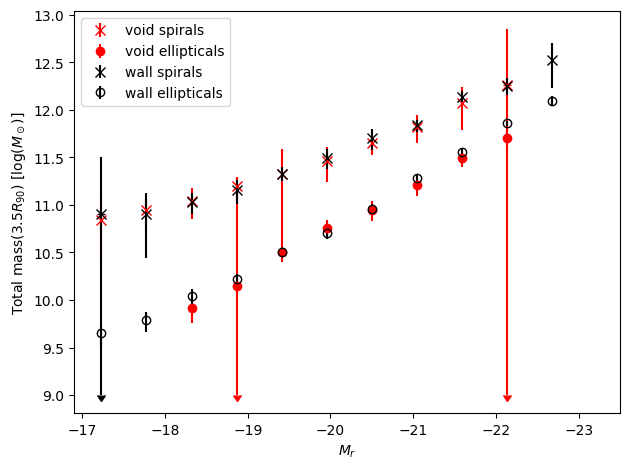

In [64]:
# plt.errorbar(points, sp_void[:,0], color='navy', yerr=[sp_void[:,1] ,sp_void[:,2]], 
#              marker='d', label='void spirals',linestyle='none', markerfacecolor='none')

# plt.errorbar(points, ep_void[:,0], color='firebrick', yerr=[ep_void[:,1] ,ep_void[:,2]], 
#              marker='d', label='void ellipticals', linestyle='none', markerfacecolor='none')


# plt.errorbar(points, sp_wall[:,0], color='navy', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
#              marker='o',label='wall spirals',linestyle='none', markerfacecolor='none')

# plt.errorbar(points, ep_wall[:,0], color='firebrick', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
#              marker='o',label='wall ellipticals', linestyle='none', markerfacecolor='none')

inf_bars = np.where(sp_void == np.inf)[0]
sp_void[inf_bars][:,0]
plt.errorbar(points, sp_void[:,0], color='r', yerr=[sp_void[:,1] ,sp_void[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=sp_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void == np.inf)[0]
ep_void[inf_bars][:,0]
plt.errorbar(points, ep_void[:,0], color='r', yerr=[ep_void[:,1] ,ep_void[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=ep_void[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_void[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall == np.inf)[0]
sp_wall[inf_bars][:,0]
plt.errorbar(points, sp_wall[:,0], color='k', yerr=[sp_wall[:,1] ,sp_wall[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=sp_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], sp_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall == np.inf)[0]
ep_wall[inf_bars][:,0]
plt.errorbar(points, ep_wall[:,0], color='k', yerr=[ep_wall[:,1] ,ep_wall[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none',mfc='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=ep_wall[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(points[inf_bars], ep_wall[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
plt.legend()
plt.xlim(-16.9,-23.5)

plt.tight_layout()
plt.savefig(plot_dir + 'Mr_Mtot3p5_median_morph_env.png', )

### void vs. wall 3.5 R90 Mtot vs Mstar

In [65]:
tot_mass_bins_3p5 = np.linspace(np.min(s_wall['M']), np.max(s_wall['M']), 15)
tot_mass_points_3p5 = (tot_mass_bins_3p5[1:] + tot_mass_bins_3p5[:-1])/2

s_void_mstar_3p5 = []
e_void_mstar_3p5 = []

s_wall_mstar_3p5 = []
e_wall_mstar_3p5 = []

for i in range(len(tot_mass_points_3p5)):
    mass_lim = tot_mass_bins_3p5[i+1]
    if i == 0:
        e_void_mstar_3p5.append(e_void['nsa_elpetro_mass'][e_void['Mvir'] <= mass_lim])
        s_void_mstar_3p5.append(s_void['M_disk'][s_void['M'] <= mass_lim])
        e_wall_mstar_3p5.append(e_wall['nsa_elpetro_mass'][e_wall['Mvir'] <= mass_lim])
        s_wall_mstar_3p5.append(s_wall['M_disk'][s_wall['M'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins_3p5[i]
        e_void_mstar_3p5.append(e_void['nsa_elpetro_mass'][np.logical_and(e_void['Mvir'] <= mass_lim, e_void['Mvir'] > lower_lim)])
        s_void_mstar_3p5.append(s_void['M_disk'][np.logical_and(s_void['M'] <= mass_lim, s_void['M'] > lower_lim)])
        e_wall_mstar_3p5.append(e_wall['nsa_elpetro_mass'][np.logical_and(e_wall['Mvir'] <= mass_lim, e_wall['Mvir'] > lower_lim)])
        s_wall_mstar_3p5.append(s_wall['M_disk'][np.logical_and(s_wall['M'] <= mass_lim, s_wall['M'] > lower_lim)])

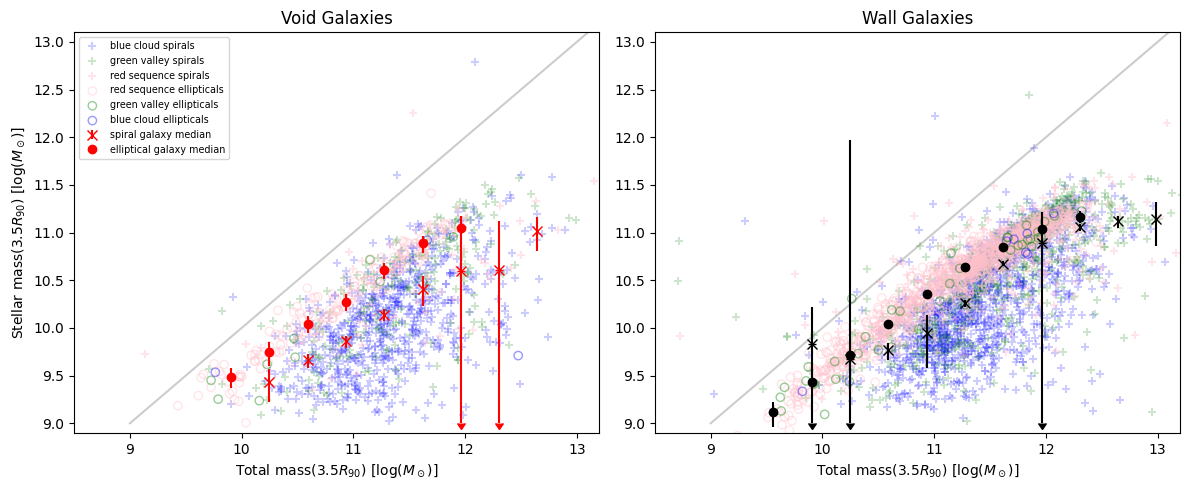

In [66]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_xlabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
ax[0].set_ylabel(r'Stellar mass(3.5$R_{90}$) [$\log(M_\odot)]$')

ax[0].set_ylim(8.9,13.1)
ax[1].set_ylim(8.9,13.1)
ax[0].set_xlim(8.5,13.2)
ax[1].set_xlim(8.5,13.2)

ax[0].plot([9,14],[9,14],color='k',alpha=0.2)
ax[1].plot([9,14],[9,14],color='k',alpha=0.2)

#void
ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M'],s_void[s_void['CMD_class'] == 1]['M_disk'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M'],s_void[s_void['CMD_class'] == 2]['M_disk'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M'],s_void[s_void['CMD_class'] == 3]['M_disk'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void[e_void['CMD_class'] == 3]['Mvir'],np.log10(e_void[e_void['CMD_class'] == 3]['nsa_elpetro_mass']),
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['Mvir'],np.log10(e_void[e_void['CMD_class'] == 2]['nsa_elpetro_mass']),
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 1]['Mvir'],np.log10(e_void[e_void['CMD_class'] == 1]['nsa_elpetro_mass']),
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



#wall
ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M'],s_wall[s_wall['CMD_class'] == 1]['M_disk'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M'],s_wall[s_wall['CMD_class'] == 2]['M_disk'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M'],s_wall[s_wall['CMD_class'] == 3]['M_disk'],
              color='pink', alpha=0.4, marker='+')

ax[1].scatter(e_wall[e_wall['CMD_class'] == 3]['Mvir'],np.log10(e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_mass']),
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['Mvir'],np.log10(e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_mass']),
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['Mvir'],np.log10(e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_mass']),
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')

sp_void_mstar = med_err(s_void_mstar_3p5)
sp_wall_mstar = med_err(s_wall_mstar_3p5)
ep_void_mstar = med_err(e_void_mstar_3p5, False, True)
ep_wall_mstar = med_err(e_wall_mstar_3p5, False, True)

inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
ax[0].errorbar(tot_mass_points_3p5, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(tot_mass_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(tot_mass_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
ax[0].errorbar(tot_mass_points_3p5, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(tot_mass_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(tot_mass_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
ax[1].errorbar(tot_mass_points_3p5, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(tot_mass_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(tot_mass_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
ax[1].errorbar(tot_mass_points_3p5, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(tot_mass_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(tot_mass_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
             linestyle='none', color='k', mfc='none', mec='none')

# ax[0].errorbar(tot_mass_points_3p5, sp_void_mstar[:,0], color='navy', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
#              marker='d', label='median spiral galaxy',linestyle='none', )

# ax[0].errorbar(tot_mass_points_3p5, ep_void_mstar[:,0], color='firebrick', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
#              marker='d', label='median elliptical galaxy ', linestyle='none', )


# ax[1].errorbar(tot_mass_points_3p5, sp_wall_mstar[:,0], color='navy', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
#              marker='d',linestyle='none')

# ax[1].errorbar(tot_mass_points_3p5, ep_wall_mstar[:,0], color='firebrick', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
#              marker='d', linestyle='none')


ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_Mstar3p5_scatter_cmd_morph_env.png')

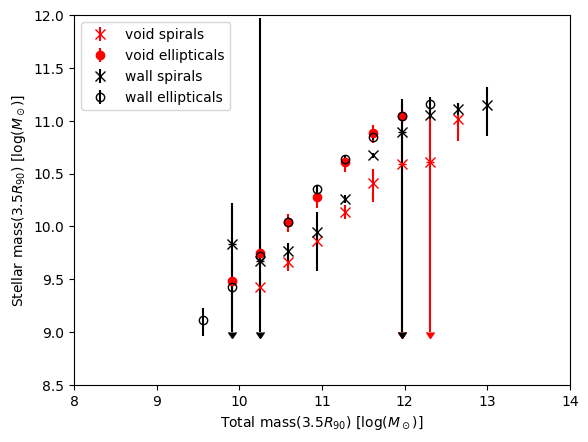

In [229]:
inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points_3p5, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points_3p5, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(tot_mass_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points_3p5, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
plt.errorbar(tot_mass_points_3p5, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', mfc='none')
plt.errorbar(tot_mass_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
             linestyle='none', color='k', mfc='none', mec='none')

# plt.errorbar(tot_mass_points_3p5, sp_void_mstar[:,0], color='navy', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
#              marker='d', label='void spirals',linestyle='none', markerfacecolor='none' )

# plt.errorbar(tot_mass_points_3p5, ep_void_mstar[:,0], color='firebrick', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
#              marker='d', label='void ellipticals ', linestyle='none', markerfacecolor='none')


# plt.errorbar(tot_mass_points_3p5, sp_wall_mstar[:,0], color='navy', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
#              marker='o',linestyle='none', label='wall spirals', markerfacecolor='none')

# plt.errorbar(tot_mass_points_3p5, ep_wall_mstar[:,0], color='firebrick', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
#              marker='o', linestyle='none', label='wall ellipticals', markerfacecolor='none')


#plt.title('Median total mass')
plt.xlabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
plt.ylabel(r'Stellar mass(3.5$R_{90}$) [$\log(M_\odot)]$')
#plt.yscale('log')
plt.legend()
plt.ylim(8.5,12)
plt.xlim(8,14)
plt.savefig(plot_dir + 'med_mstar_env_3p5.png')
plt.show()

### void vs. wall 3.5 R90 Mtot vs Mstar binned by Mstar

In [67]:
mstar_bins_3p5 = np.linspace(np.min([np.min(spirals['M_disk']) ,np.log10(np.min(ellipticals['nsa_elpetro_mass']))]),
                             np.max([np.max(spirals['M_disk']), np.log10(np.max(ellipticals['nsa_elpetro_mass']))]),
                             20)
                             


mstar_points_3p5 = (mstar_bins_3p5[1:] + mstar_bins_3p5[:-1])/2

s_void_mtot_3p5 = []
e_void_mtot_3p5 = []

s_wall_mtot_3p5 = []
e_wall_mtot_3p5 = []

for i in range(len(mstar_points_3p5)):
    mass_lim = mstar_bins_3p5[i+1]
    if i == 0:
        e_void_mtot_3p5.append(e_void['Mvir'][np.log10(e_void['nsa_elpetro_mass']) <= mass_lim])
        s_void_mtot_3p5.append(s_void['M'][s_void['M_disk'] <= mass_lim])
        e_wall_mtot_3p5.append(e_wall['Mvir'][np.log10(e_wall['nsa_elpetro_mass']) <= mass_lim])
        s_wall_mtot_3p5.append(s_wall['M'][s_wall['M_disk'] <= mass_lim])

    else:
        lower_lim = mstar_bins_3p5[i]
        e_void_mtot_3p5.append(e_void['Mvir'][np.logical_and(np.log10(e_void['nsa_elpetro_mass']) <= mass_lim,
                                                             np.log10(e_void['nsa_elpetro_mass']) > lower_lim)])
        s_void_mtot_3p5.append(s_void['M'][np.logical_and(s_void['M_disk'] <= mass_lim, s_void['M_disk'] > lower_lim)])
        e_wall_mtot_3p5.append(e_wall['Mvir'][np.logical_and(np.log10(e_wall['nsa_elpetro_mass']) <= mass_lim, 
                                                             np.log10(e_wall['nsa_elpetro_mass']) > lower_lim)])
        s_wall_mtot_3p5.append(s_wall['M'][np.logical_and(s_wall['M_disk'] <= mass_lim, s_wall['M_disk'] > lower_lim)])

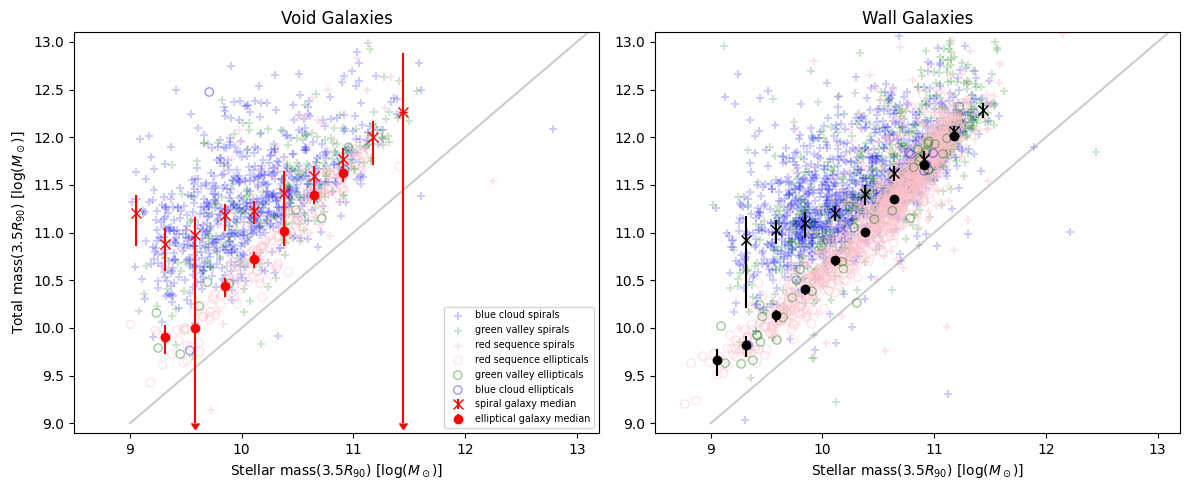

In [68]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_ylabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
ax[0].set_xlabel(r'Stellar mass(3.5$R_{90}$) [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Stellar mass(3.5$R_{90}$) [$\log(M_\odot)$]')


ax[1].set_ylim(8.9,13.1)
ax[0].set_ylim(8.9,13.1)
ax[1].set_xlim(8.5,13.2)
ax[0].set_xlim(8.5,13.2)

ax[0].plot([9,14],[9,14],color='k',alpha=0.2)
ax[1].plot([9,14],[9,14],color='k',alpha=0.2)

#void
ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M_disk'], s_void[s_void['CMD_class'] == 1]['M'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M_disk'], s_void[s_void['CMD_class'] == 2]['M'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M_disk'], s_void[s_void['CMD_class'] == 3]['M'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(np.log10(e_void[e_void['CMD_class'] == 3]['nsa_elpetro_mass']), e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(np.log10(e_void[e_void['CMD_class'] == 2]['nsa_elpetro_mass']), e_void[e_void['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(np.log10(e_void[e_void['CMD_class'] == 1]['nsa_elpetro_mass']), e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



#wall
ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M_disk'],s_wall[s_wall['CMD_class'] == 1]['M'],
              color='b', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M_disk'],s_wall[s_wall['CMD_class'] == 2]['M'],
              color='g', alpha=0.2, marker='+')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M_disk'],s_wall[s_wall['CMD_class'] == 3]['M'],
              color='pink', alpha=0.4, marker='+')

ax[1].scatter(np.log10(e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_mass']),e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence', facecolor='none')
ax[1].scatter(np.log10(e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_mass']), e_wall[e_wall['CMD_class'] == 2]['Mvir'],
              color='g', alpha=0.4, marker='o', label='green valley', facecolor='none')
ax[1].scatter(np.log10(e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_mass']), e_wall[e_wall['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud', facecolor='none')

sp_void_mstar = med_err(s_void_mtot_3p5)
sp_wall_mstar = med_err(s_wall_mtot_3p5)
ep_void_mstar = med_err(e_void_mtot_3p5, True, True)
ep_wall_mstar = med_err(e_wall_mtot_3p5, True, True)

inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
ax[0].errorbar(mstar_points_3p5, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(mstar_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(mstar_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
ax[0].errorbar(mstar_points_3p5, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[0].errorbar(mstar_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(mstar_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
ax[1].errorbar(mstar_points_3p5, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(mstar_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(mstar_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
ax[1].errorbar(mstar_points_3p5, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
ax[1].errorbar(mstar_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(mstar_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

# ax[0].errorbar(mstar_points_3p5, sp_void_mstar[:,0], color='navy', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
#              marker='d', label='median spiral galaxy',linestyle='none', )

# ax[0].errorbar(mstar_points_3p5, ep_void_mstar[:,0], color='firebrick', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
#              marker='d', label='median elliptical galaxy ', linestyle='none', )


# ax[1].errorbar(mstar_points_3p5, sp_wall_mstar[:,0], color='navy', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
#              marker='d',linestyle='none')

# ax[1].errorbar(mstar_points_3p5, ep_wall_mstar[:,0], color='firebrick', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
#              marker='d', linestyle='none')


ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mstar_Mtot3p5_scatter_cmd_morph_env.png')

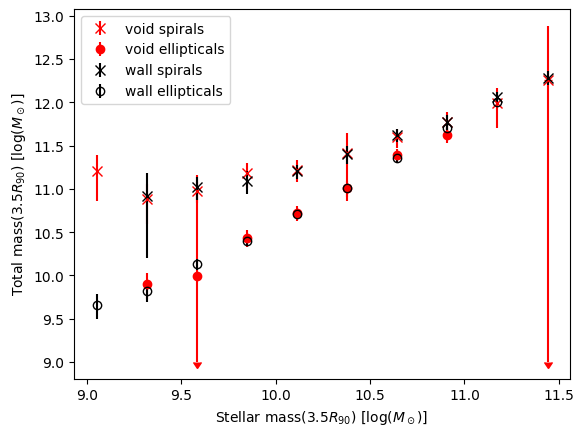

In [69]:
# plt.errorbar(mstar_points_3p5, sp_void_mstar[:,0], color='navy', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
#              marker='d', label='void spirals',linestyle='none', markerfacecolor='none' )

# plt.errorbar(mstar_points_3p5, ep_void_mstar[:,0], color='firebrick', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
#              marker='d', label='void ellipticals ', linestyle='none', markerfacecolor='none')


# plt.errorbar(mstar_points_3p5, sp_wall_mstar[:,0], color='navy', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
#              marker='o',linestyle='none', label='wall spirals', markerfacecolor='none')

# plt.errorbar(mstar_points_3p5, ep_wall_mstar[:,0], color='firebrick', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
#              marker='o', linestyle='none', label='wall ellipticals', markerfacecolor='none')

inf_bars = np.where(sp_void_mstar == np.inf)[0]
sp_void_mstar[inf_bars][:,0]
plt.errorbar(mstar_points_3p5, sp_void_mstar[:,0], color='r', yerr=[sp_void_mstar[:,1] ,sp_void_mstar[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(mstar_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=sp_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points_3p5[inf_bars], sp_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(ep_void_mstar == np.inf)[0]
ep_void_mstar[inf_bars][:,0]
plt.errorbar(mstar_points_3p5, ep_void_mstar[:,0], color='r', yerr=[ep_void_mstar[:,1] ,ep_void_mstar[:,2]], 
             marker='o', label='void ellipticals',linestyle='none',)
plt.errorbar(mstar_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=ep_void_mstar[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points_3p5[inf_bars], ep_void_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mstar[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mstar == np.inf)[0]
sp_wall_mstar[inf_bars][:,0]
plt.errorbar(mstar_points_3p5, sp_wall_mstar[:,0], color='k', yerr=[sp_wall_mstar[:,1] ,sp_wall_mstar[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(mstar_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=sp_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points_3p5[inf_bars], sp_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(ep_wall_mstar == np.inf)[0]
ep_wall_mstar[inf_bars][:,0]
plt.errorbar(mstar_points_3p5, ep_wall_mstar[:,0], color='k', yerr=[ep_wall_mstar[:,1] ,ep_wall_mstar[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', mfc='none')
plt.errorbar(mstar_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=ep_wall_mstar[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(mstar_points_3p5[inf_bars], ep_wall_mstar[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mstar[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')


#plt.title('Median total mass')
plt.ylabel(r'Total mass(3.5$R_{90}$) [$\log(M_\odot)$]')
plt.xlabel(r'Stellar mass(3.5$R_{90}$) [$\log(M_\odot)]$')
#plt.yscale('log')
plt.legend()
#plt.ylim(8.5,12)
#plt.xlim(8,14)
plt.savefig(plot_dir + 'Mstar_Mtot3p5_median_morph_env.png')
plt.show()

In [70]:
spirals_HI_R90 = spirals[spirals['logHI_R90']>0]
spirals_HI = spirals[spirals['logHI']>0]
ellipticals_HI = ellipticals[ellipticals['logHI']>0]
ellipticals_HI_lim = ellipticals[ellipticals['logHIlim']>0]

### void vs. wall Mvis (Mstar + MHIR90) vs Mtot

In [72]:
bins = np.linspace(np.min([np.min(spirals_HI_R90['M_R90']), np.min(ellipticals['Mvir'])]),
                   np.max([np.max(spirals_HI_R90['M_R90']), np.max(ellipticals['Mvir'])]), 15)
pts = (bins[1:] + bins[:-1])/2

s_void_mvis = []
s_wall_mvis = []
e_void_mvis = []
e_wall_mvis = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        s_void_mvis.append(s_void['Mstar_HI_R90'][s_void['M_R90'] <= mass_lim])
        s_wall_mvis.append(s_wall['Mstar_HI_R90'][s_wall['M_R90'] <= mass_lim])
        e_void_mvis.append(e_void['nsa_elpetro_log_mass'][e_void['Mvir'] <= mass_lim])
        e_wall_mvis.append(e_wall['nsa_elpetro_log_mass'][e_wall['Mvir'] <= mass_lim])

    else:
        lower_lim = bins[i]
        s_void_mvis.append(s_void['Mstar_HI_R90'][np.logical_and(s_void['M_R90'] <= mass_lim,
                                                             s_void['M_R90'] > lower_lim)])
        s_wall_mvis.append(s_wall['Mstar_HI_R90'][np.logical_and(s_wall['M_R90'] <= mass_lim,
                                                             s_wall['M_R90'] > lower_lim)])
        e_void_mvis.append(e_void['nsa_elpetro_log_mass'][np.logical_and(e_void['Mvir'] <= mass_lim, 
                                                                   e_void['Mvir'] > lower_lim)])
        e_wall_mvis.append(e_wall['nsa_elpetro_log_mass'][np.logical_and(e_wall['Mvir'] <= mass_lim, 
                                                                   e_wall['Mvir'] > lower_lim)])

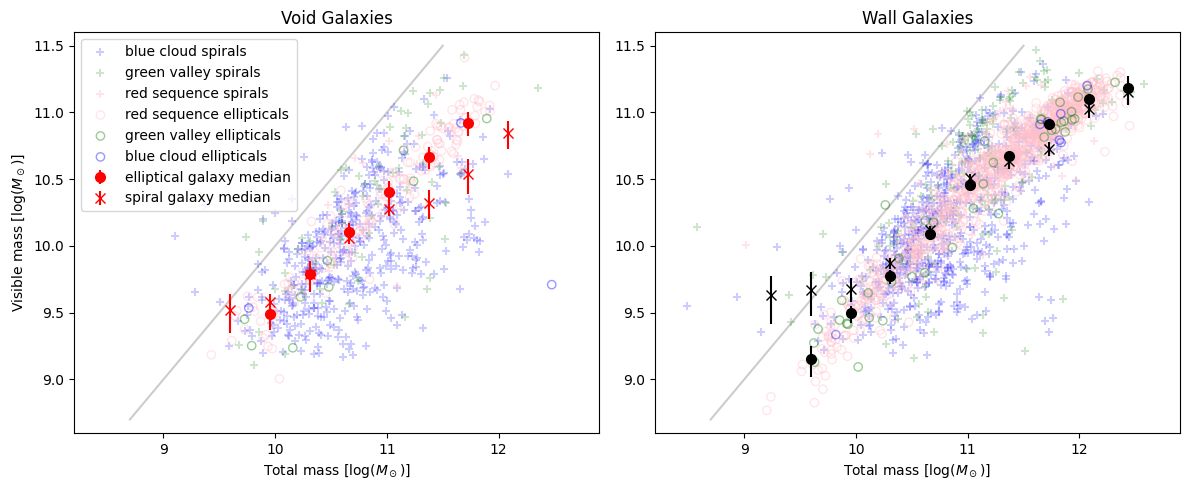

In [73]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_ylabel(r'Visible mass [$\log(M_\odot)$]')
ax[0].set_xlabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Total mass [$\log(M_\odot)$]')


ax[1].set_ylim(8.6,11.6)
ax[0].set_ylim(8.6,11.6)
ax[1].set_xlim(8.2,12.9)
ax[0].set_xlim(8.2,12.9)

ax[0].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)
ax[1].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)

ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M_R90'], s_void[s_void['CMD_class'] == 1]['Mstar_HI_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M_R90'], s_void[s_void['CMD_class'] == 2]['Mstar_HI_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M_R90'], s_void[s_void['CMD_class'] == 3]['Mstar_HI_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void[e_void['CMD_class'] == 3]['Mvir'], e_void[e_void['CMD_class'] == 3]['nsa_elpetro_log_mass'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['Mvir'], e_void[e_void['CMD_class'] == 2]['nsa_elpetro_log_mass'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 1]['Mvir'], e_void[e_void['CMD_class'] == 1]['nsa_elpetro_log_mass'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')


ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M_R90'], s_wall[s_wall['CMD_class'] == 1]['Mstar_HI_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M_R90'], s_wall[s_wall['CMD_class'] == 2]['Mstar_HI_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M_R90'], s_wall[s_wall['CMD_class'] == 3]['Mstar_HI_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[1].scatter(e_wall[e_wall['CMD_class'] == 3]['Mvir'], e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_log_mass'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['Mvir'], e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_log_mass'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['Mvir'], e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_log_mass'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



sp_void_mvis = med_err(s_void_mvis)
sp_wall_mvis = med_err(s_wall_mvis)
ep_void_mvis = med_err(e_void_mvis)
ep_wall_mvis = med_err(e_wall_mvis)

inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')



ax[0].legend()

fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_MstarHI_scatter_cmd_morph_env.png')

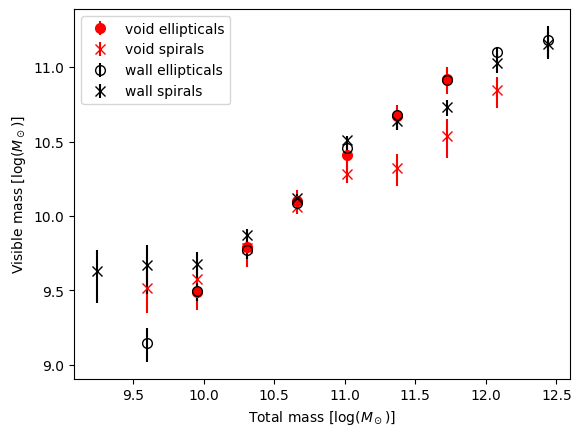

In [74]:
inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='void ellipticals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', markersize=7, mfc='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.ylabel(r'Visible mass [$\log(M_\odot)$]')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')

plt.legend()
plt.savefig(plot_dir + 'Mtot_MstarHI_median_morph_env.png')

### void vs. wall  Mtot vs. Mvis (Mstar + MHIR90)

In [75]:
bins = np.linspace(np.min([np.min(spirals_HI_R90['Mstar_HI_R90']), np.min(ellipticals['nsa_elpetro_log_mass'])]),
                   np.max([np.max(spirals_HI_R90['Mstar_HI_R90']), np.max(ellipticals['nsa_elpetro_log_mass'])]), 15)
pts = (bins[1:] + bins[:-1])/2

s_void_mtot = []
s_wall_mtot = []
e_void_mtot = []
e_wall_mtot = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        s_void_mtot.append(s_void['M_R90'][s_void['Mstar_HI_R90'] <= mass_lim])
        s_wall_mtot.append(s_wall['M_R90'][s_wall['Mstar_HI_R90'] <= mass_lim])
        e_void_mtot.append(e_void['Mvir'][e_void['nsa_elpetro_log_mass'] <= mass_lim])
        e_wall_mtot.append(e_wall['Mvir'][e_wall['nsa_elpetro_log_mass'] <= mass_lim])

    else:
        lower_lim = bins[i]
        s_void_mtot.append(s_void['M_R90'][np.logical_and(s_void['Mstar_HI_R90'] <= mass_lim,
                                                             s_void['Mstar_HI_R90'] > lower_lim)])
        s_wall_mtot.append(s_wall['M_R90'][np.logical_and(s_wall['Mstar_HI_R90'] <= mass_lim,
                                                             s_wall['Mstar_HI_R90'] > lower_lim)])
        e_void_mtot.append(e_void['Mvir'][np.logical_and(e_void['nsa_elpetro_log_mass'] <= mass_lim, 
                                                                   e_void['nsa_elpetro_log_mass'] > lower_lim)])
        e_wall_mtot.append(e_wall['Mvir'][np.logical_and(e_wall['nsa_elpetro_log_mass'] <= mass_lim, 
                                                                   e_wall['nsa_elpetro_log_mass'] > lower_lim)])

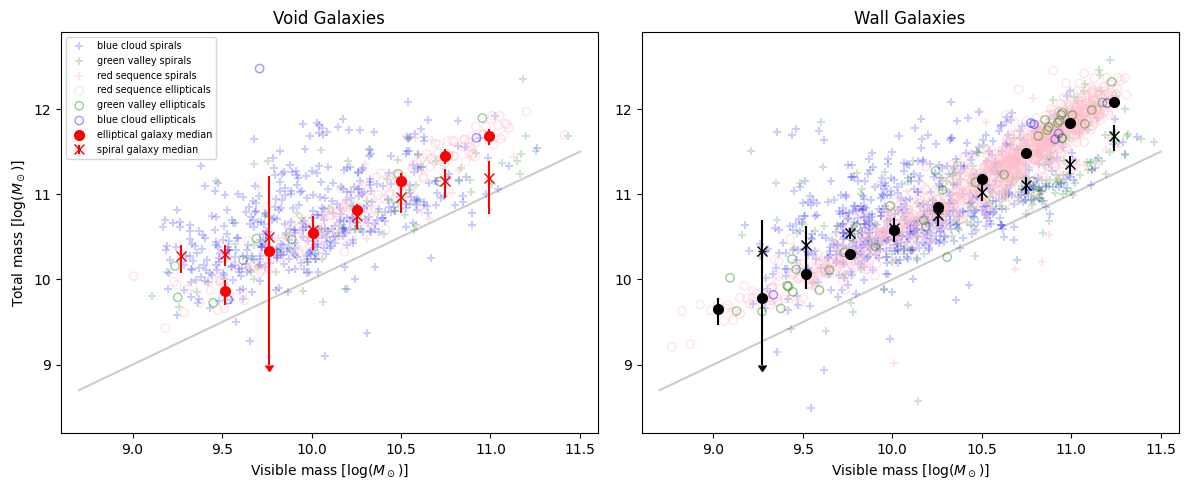

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_xlabel(r'Visible mass [$\log(M_\odot)$]')
ax[0].set_ylabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Visible mass [$\log(M_\odot)$]')


ax[1].set_xlim(8.6,11.6)
ax[0].set_xlim(8.6,11.6)
ax[1].set_ylim(8.2,12.9)
ax[0].set_ylim(8.2,12.9)

ax[0].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)
ax[1].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)

ax[0].scatter(s_void[s_void['CMD_class'] == 1]['Mstar_HI_R90'], s_void[s_void['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter( s_void[s_void['CMD_class'] == 2]['Mstar_HI_R90'], s_void[s_void['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter( s_void[s_void['CMD_class'] == 3]['Mstar_HI_R90'], s_void[s_void['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter( e_void[e_void['CMD_class'] == 3]['nsa_elpetro_log_mass'], e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['nsa_elpetro_log_mass'], e_void[e_void['CMD_class'] == 2]['Mvir'], 
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter( e_void[e_void['CMD_class'] == 1]['nsa_elpetro_log_mass'], e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')


ax[1].scatter( s_wall[s_wall['CMD_class'] == 1]['Mstar_HI_R90'],s_wall[s_wall['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['Mstar_HI_R90'], s_wall[s_wall['CMD_class'] == 2]['M_R90'], 
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[1].scatter( s_wall[s_wall['CMD_class'] == 3]['Mstar_HI_R90'], s_wall[s_wall['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[1].scatter( e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_log_mass'], e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_log_mass'], e_wall[e_wall['CMD_class'] == 2]['Mvir'], 
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_log_mass'], e_wall[e_wall['CMD_class'] == 1]['Mvir'], 
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



sp_void_mtot = med_err(s_void_mtot)
sp_wall_mtot = med_err(s_wall_mtot)
ep_void_mtot = med_err(e_void_mtot)
ep_wall_mtot = med_err(e_wall_mtot)

inf_bars = np.where(ep_void_mtot == np.inf)[0]
ep_void_mtot[inf_bars][:,0]
ax[0].errorbar(pts, ep_void_mtot[:,0], color='r', yerr=[ep_void_mtot[:,1] ,ep_void_mtot[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=ep_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mtot == np.inf)[0]
sp_void_mtot[inf_bars][:,0]
ax[0].errorbar(pts, sp_void_mtot[:,0], color='r', yerr=[sp_void_mtot[:,1] ,sp_void_mtot[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=sp_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mtot == np.inf)[0]
ep_wall_mtot[inf_bars][:,0]
ax[1].errorbar(pts, ep_wall_mtot[:,0], color='k', yerr=[ep_wall_mtot[:,1] ,ep_wall_mtot[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=ep_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mtot == np.inf)[0]
sp_wall_mtot[inf_bars][:,0]
ax[1].errorbar(pts, sp_wall_mtot[:,0], color='k', yerr=[sp_wall_mtot[:,1] ,sp_wall_mtot[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=sp_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')



ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'MstarHI_Mtot_scatter_cmd_morph_env.png')

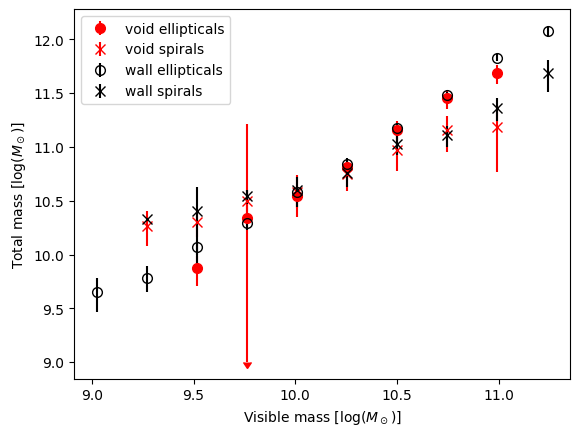

In [77]:
inf_bars = np.where(ep_void_mtot == np.inf)[0]
ep_void_mtot[inf_bars][:,0]
plt.errorbar(pts, ep_void_mtot[:,0], color='r', yerr=[ep_void_mtot[:,1] ,ep_void_mtot[:,2]], 
             marker='o', label='void ellipticals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=ep_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mtot == np.inf)[0]
sp_void_mtot[inf_bars][:,0]
plt.errorbar(pts, sp_void_mtot[:,0], color='r', yerr=[sp_void_mtot[:,1] ,sp_void_mtot[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=sp_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mtot == np.inf)[0]
ep_wall_mtot[inf_bars][:,0]
plt.errorbar(pts, ep_wall_mtot[:,0], color='k', yerr=[ep_wall_mtot[:,1] ,ep_wall_mtot[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', markersize=7, mfc='none')
plt.errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=ep_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mtot == np.inf)[0]
sp_wall_mtot[inf_bars][:,0]
plt.errorbar(pts, sp_wall_mtot[:,0], color='k', yerr=[sp_wall_mtot[:,1] ,sp_wall_mtot[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=sp_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.xlabel(r'Visible mass [$\log(M_\odot)$]')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')

plt.legend()
plt.savefig(plot_dir + 'MstarHI_Mtot_median_morph_env.png')

### Mvis (all) vs. Mtot void vs wall

In [264]:
bins = np.linspace(np.min([np.min(spirals['M_R90']), np.min(ellipticals['Mvir'])]),
                   np.max([np.max(spirals['M_R90']), np.max(ellipticals['Mvir'])]),
                   15)
pts = (bins[1:] + bins[:-1])/2

e_void_mvis = []
s_void_mvis = []
e_wall_mvis = []
s_wall_mvis = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        e_void_mvis.append(e_void['nsa_elpetro_log_mass'][e_void['Mvir'] <= mass_lim])
        e_wall_mvis.append(e_wall['nsa_elpetro_log_mass'][e_wall['Mvir'] <= mass_lim])
        s_void_mvis.append(s_void['Mvis_R90'][s_void['M_R90'] <= mass_lim])
        s_wall_mvis.append(s_wall['Mvis_R90'][s_wall['M_R90'] <= mass_lim])

    else:
        lower_lim = bins[i]
        e_void_mvis.append(e_void['nsa_elpetro_log_mass'][np.logical_and(e_void['Mvir'] <= mass_lim, e_void['Mvir'] > lower_lim)])
        e_wall_mvis.append(e_wall['nsa_elpetro_log_mass'][np.logical_and(e_wall['Mvir'] <= mass_lim, e_wall['Mvir'] > lower_lim)])
        s_void_mvis.append(s_void['Mvis_R90'][np.logical_and(s_void['M_R90'] <= mass_lim, s_void['M_R90'] > lower_lim)])
        s_wall_mvis.append(s_wall['Mvis_R90'][np.logical_and(s_wall['M_R90'] <= mass_lim, s_wall['M_R90'] > lower_lim)])

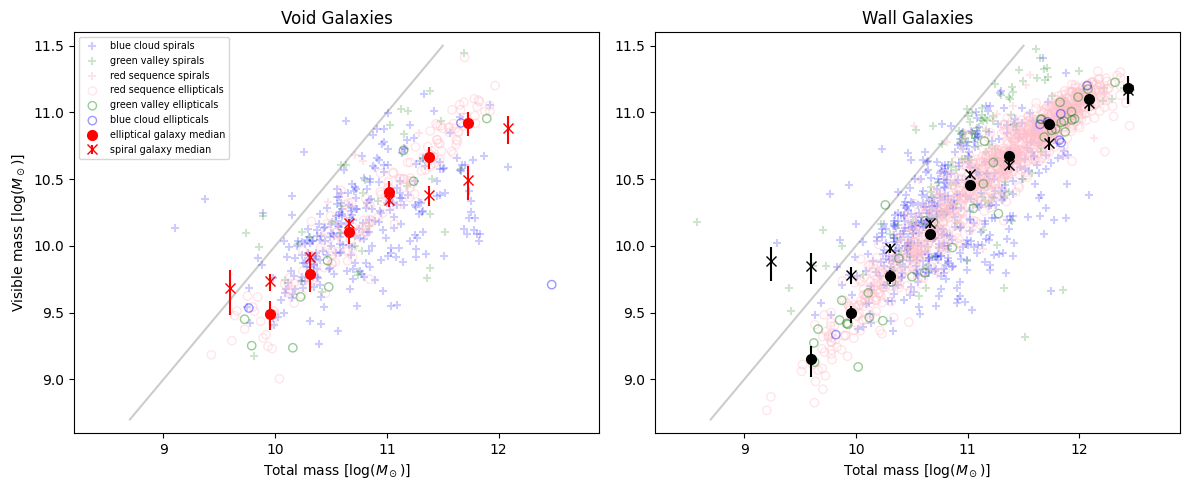

In [265]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_ylabel(r'Visible mass [$\log(M_\odot)$]')
ax[0].set_xlabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Total mass [$\log(M_\odot)$]')


ax[1].set_ylim(8.6,11.6)
ax[0].set_ylim(8.6,11.6)
ax[1].set_xlim(8.2,12.9)
ax[0].set_xlim(8.2,12.9)

ax[0].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)
ax[1].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)

ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M_R90'], s_void[s_void['CMD_class'] == 1]['Mvis_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M_R90'], s_void[s_void['CMD_class'] == 2]['Mvis_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M_R90'], s_void[s_void['CMD_class'] == 3]['Mvis_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void[e_void['CMD_class'] == 3]['Mvir'], e_void[e_void['CMD_class'] == 3]['nsa_elpetro_log_mass'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['Mvir'], e_void[e_void['CMD_class'] == 2]['nsa_elpetro_log_mass'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 1]['Mvir'], e_void[e_void['CMD_class'] == 1]['nsa_elpetro_log_mass'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')


ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M_R90'], s_wall[s_wall['CMD_class'] == 1]['Mvis_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M_R90'], s_wall[s_wall['CMD_class'] == 2]['Mvis_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M_R90'], s_wall[s_wall['CMD_class'] == 3]['Mvis_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[1].scatter(e_wall[e_wall['CMD_class'] == 3]['Mvir'], e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_log_mass'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['Mvir'], e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_log_mass'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['Mvir'], e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_log_mass'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

sp_void_mvis = med_err(s_void_mvis)
sp_wall_mvis = med_err(s_wall_mvis)
ep_void_mvis = med_err(e_void_mvis)
ep_wall_mvis = med_err(e_wall_mvis)

inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')


ax[0].legend(fontsize='x-small')


fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_Mvis_scatter_cmd_morph_env.png')

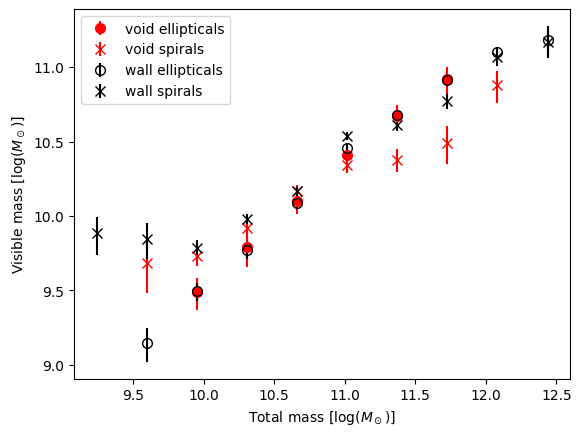

In [266]:
inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='void ellipticals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', markersize=7, mfc='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.ylabel(r'Visible mass [$\log(M_\odot)$]')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')

plt.legend()
plt.savefig(plot_dir + 'Mtot_Mvis_median_morph_env.png')

### Mtot vs. Mvis(all) void vs wall

In [244]:
bins = np.linspace(np.min([np.min(spirals['Mvis_R90']), np.min(ellipticals['nsa_elpetro_log_mass'])]),
                   np.max([np.max(spirals['Mvis_R90']), np.max(ellipticals['nsa_elpetro_log_mass'])]), 15)
pts = (bins[1:] + bins[:-1])/2

s_void_mtot = []
s_wall_mtot = []
e_void_mtot = []
e_wall_mtot = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        s_void_mtot.append(s_void['M_R90'][s_void['Mvis_R90'] <= mass_lim])
        s_wall_mtot.append(s_wall['M_R90'][s_wall['Mvis_R90'] <= mass_lim])
        e_void_mtot.append(e_void['Mvir'][e_void['nsa_elpetro_log_mass'] <= mass_lim])
        e_wall_mtot.append(e_wall['Mvir'][e_wall['nsa_elpetro_log_mass'] <= mass_lim])

    else:
        lower_lim = bins[i]
        s_void_mtot.append(s_void['M_R90'][np.logical_and(s_void['Mvis_R90'] <= mass_lim,
                                                             s_void['Mvis_R90'] > lower_lim)])
        s_wall_mtot.append(s_wall['M_R90'][np.logical_and(s_wall['Mvis_R90'] <= mass_lim,
                                                             s_wall['Mvis_R90'] > lower_lim)])
        e_void_mtot.append(e_void['Mvir'][np.logical_and(e_void['nsa_elpetro_log_mass'] <= mass_lim, 
                                                                   e_void['nsa_elpetro_log_mass'] > lower_lim)])
        e_wall_mtot.append(e_wall['Mvir'][np.logical_and(e_wall['nsa_elpetro_log_mass'] <= mass_lim, 
                                                                   e_wall['nsa_elpetro_log_mass'] > lower_lim)])

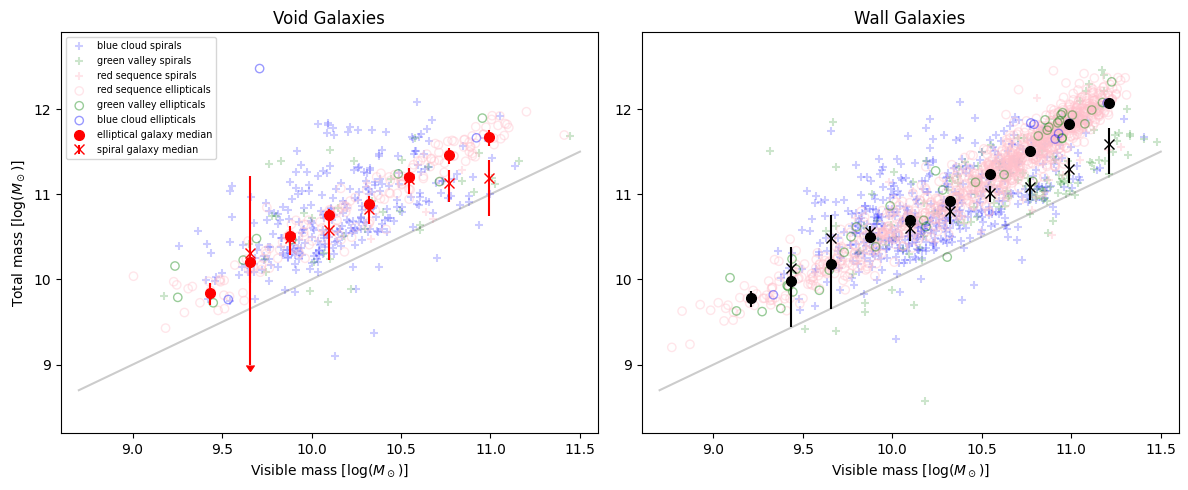

In [245]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_xlabel(r'Visible mass [$\log(M_\odot)$]')
ax[0].set_ylabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Visible mass [$\log(M_\odot)$]')


ax[1].set_xlim(8.6,11.6)
ax[0].set_xlim(8.6,11.6)
ax[1].set_ylim(8.2,12.9)
ax[0].set_ylim(8.2,12.9)

ax[0].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)
ax[1].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)

ax[0].scatter(s_void[s_void['CMD_class'] == 1]['Mvis_R90'], s_void[s_void['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter( s_void[s_void['CMD_class'] == 2]['Mvis_R90'], s_void[s_void['CMD_class'] == 2]['M_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter( s_void[s_void['CMD_class'] == 3]['Mvis_R90'], s_void[s_void['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter( e_void[e_void['CMD_class'] == 3]['nsa_elpetro_log_mass'], e_void[e_void['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['nsa_elpetro_log_mass'], e_void[e_void['CMD_class'] == 2]['Mvir'], 
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter( e_void[e_void['CMD_class'] == 1]['nsa_elpetro_log_mass'], e_void[e_void['CMD_class'] == 1]['Mvir'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')


ax[1].scatter( s_wall[s_wall['CMD_class'] == 1]['Mvis_R90'],s_wall[s_wall['CMD_class'] == 1]['M_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['Mvis_R90'], s_wall[s_wall['CMD_class'] == 2]['M_R90'], 
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[1].scatter( s_wall[s_wall['CMD_class'] == 3]['Mvis_R90'], s_wall[s_wall['CMD_class'] == 3]['M_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[1].scatter( e_wall[e_wall['CMD_class'] == 3]['nsa_elpetro_log_mass'], e_wall[e_wall['CMD_class'] == 3]['Mvir'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['nsa_elpetro_log_mass'], e_wall[e_wall['CMD_class'] == 2]['Mvir'], 
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['nsa_elpetro_log_mass'], e_wall[e_wall['CMD_class'] == 1]['Mvir'], 
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')



sp_void_mtot = med_err(s_void_mtot)
sp_wall_mtot = med_err(s_wall_mtot)
ep_void_mtot = med_err(e_void_mtot)
ep_wall_mtot = med_err(e_wall_mtot)

inf_bars = np.where(ep_void_mtot == np.inf)[0]
ep_void_mtot[inf_bars][:,0]
ax[0].errorbar(pts, ep_void_mtot[:,0], color='r', yerr=[ep_void_mtot[:,1] ,ep_void_mtot[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=ep_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mtot == np.inf)[0]
sp_void_mtot[inf_bars][:,0]
ax[0].errorbar(pts, sp_void_mtot[:,0], color='r', yerr=[sp_void_mtot[:,1] ,sp_void_mtot[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=sp_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mtot == np.inf)[0]
ep_wall_mtot[inf_bars][:,0]
ax[1].errorbar(pts, ep_wall_mtot[:,0], color='k', yerr=[ep_wall_mtot[:,1] ,ep_wall_mtot[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=ep_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_wall_mtot == np.inf)[0]
sp_wall_mtot[inf_bars][:,0]
ax[1].errorbar(pts, sp_wall_mtot[:,0], color='k', yerr=[sp_wall_mtot[:,1] ,sp_wall_mtot[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=sp_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')



ax[0].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mvis_Mtot_scatter_cmd_morph_env.png')

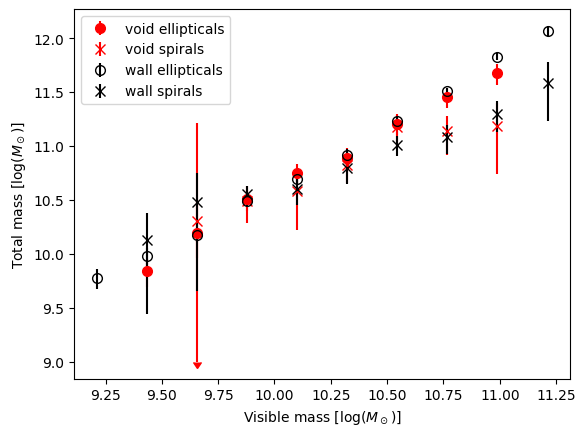

In [246]:
inf_bars = np.where(ep_void_mtot == np.inf)[0]
ep_void_mtot[inf_bars][:,0]
plt.errorbar(pts, ep_void_mtot[:,0], color='r', yerr=[ep_void_mtot[:,1] ,ep_void_mtot[:,2]], 
             marker='o', label='void ellipticals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=ep_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mtot == np.inf)[0]
sp_void_mtot[inf_bars][:,0]
plt.errorbar(pts, sp_void_mtot[:,0], color='r', yerr=[sp_void_mtot[:,1] ,sp_void_mtot[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=sp_void_mtot[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_void_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mtot[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mtot == np.inf)[0]
ep_wall_mtot[inf_bars][:,0]
plt.errorbar(pts, ep_wall_mtot[:,0], color='k', yerr=[ep_wall_mtot[:,1] ,ep_wall_mtot[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', markersize=7, mfc='none')
plt.errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=ep_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mtot == np.inf)[0]
sp_wall_mtot[inf_bars][:,0]
plt.errorbar(pts, sp_wall_mtot[:,0], color='k', yerr=[sp_wall_mtot[:,1] ,sp_wall_mtot[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=sp_wall_mtot[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_wall_mtot[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mtot[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.xlabel(r'Visible mass [$\log(M_\odot)$]')
plt.ylabel(r'Total mass [$\log(M_\odot)$]')

plt.legend()
plt.savefig(plot_dir + 'Mvis_Mtot_median_morph_env.png')

### Spiral mvis = Mstar(R90) + MHI (R90); Elliptical Mvis = Mstar

In [78]:
tot_mass_bins = np.linspace(np.min(spirals_HI_R90['M_R90']), np.max(ellipticals['Mvir']), 15)
tot_mass_points = (tot_mass_bins[1:] + tot_mass_bins[:-1])/2

spirals_HI_R90_mvis = []
ellipticals_mstar = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        spirals_HI_R90_mvis.append(np.log10(10**spirals_HI_R90['logHI_R90'][spirals_HI_R90['M_R90'] <= mass_lim] + 10**spirals_HI_R90['M90_disk'][spirals_HI_R90['M_R90'] <= mass_lim]))
        ellipticals_mstar.append(ellipticals['nsa_elpetro_mass'][ellipticals['Mvir'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        ellipticals_mstar.append(ellipticals['nsa_elpetro_mass'][np.logical_and(ellipticals['Mvir'] <= mass_lim, ellipticals['Mvir'] > lower_lim)])
        spirals_HI_R90_mvis.append(np.log10(10**spirals_HI_R90['M90_disk'][np.logical_and(spirals_HI_R90['M_R90'] <= mass_lim, spirals_HI_R90['M_R90'] > lower_lim)] +\
                                            10**spirals_HI_R90['logHI_R90'][np.logical_and(spirals_HI_R90['M_R90'] <= mass_lim, spirals_HI_R90['M_R90'] > lower_lim)])
        )

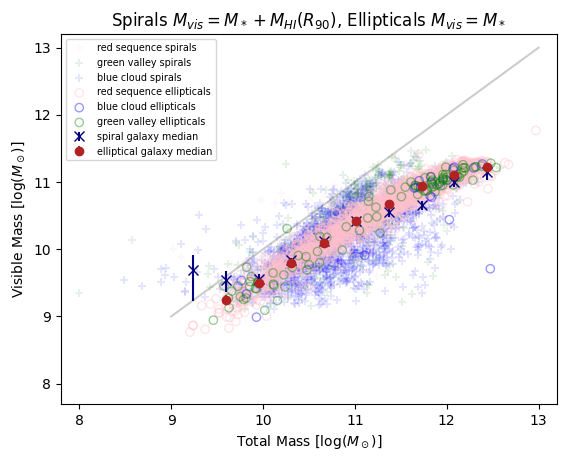

In [80]:
plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['logHI_R90']),
            alpha=0.1, color='pink', marker='+', label = 'red sequence spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['logHI_R90']),
            alpha=0.1, color='g', marker='+', label='green valley spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['logHI_R90']),
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(Mvir[ellipticals['CMD_class'] == 3], Mstar[ellipticals['CMD_class'] == 3],
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 1], Mstar[ellipticals['CMD_class'] == 1],
            color = 'b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 2], Mstar[ellipticals['CMD_class'] == 2],
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')


ep = med_err(ellipticals_mstar, False, True)
sp = med_err(spirals_HI_R90_mvis)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')


# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='median spiral galaxy mass',linestyle='none')

# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='median elliptical galaxy mass', linestyle='none')



plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Visible Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.title(r'Spirals $M_{vis} = M_* + M_{HI}(R_{90})$, Ellipticals $M_{vis}=M_*$')
plt.ylim(7.7,13.2)
plt.xlim(7.8,13.2)
plt.savefig(plot_dir + 'Mtot_MstarHI_scatter_cmd_morph.png')
plt.show()

In [81]:
global_max = 0
global_min = 100
for i in range(len(spirals_HI_R90_mvis)):

    if len(spirals_HI_R90_mvis[i]) > 0:
        global_max = np.max([global_max, np.max(spirals_HI_R90_mvis[i])])
        global_min = np.min([global_min, np.min(spirals_HI_R90_mvis[i])])


for i in range(len(ellipticals_mstar)):
    if len(ellipticals_mstar[i]) > 0:
        global_max = np.max([global_max, np.max(np.log10(ellipticals_mstar[i]))])
        global_min = np.min([global_min, np.min(np.log10(ellipticals_mstar[i]))])


In [82]:
bins = np.linspace(global_min, global_max, 16)

/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/2404587908.py:15: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, mstar_e/np.sum(mstar_e), color='r', where='mid',linestyle=':', label='ellipticals ({})'.format(np.sum(mstar_e)))
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_66512/2404587908.py:14: RuntimeWarning: invalid value encountered in divide
  ax[j,k].step(pts, mvis_s/np.sum(mvis_s), color='b', where='mid', label='spirals ({})'.format(np.sum(mvis_s)))


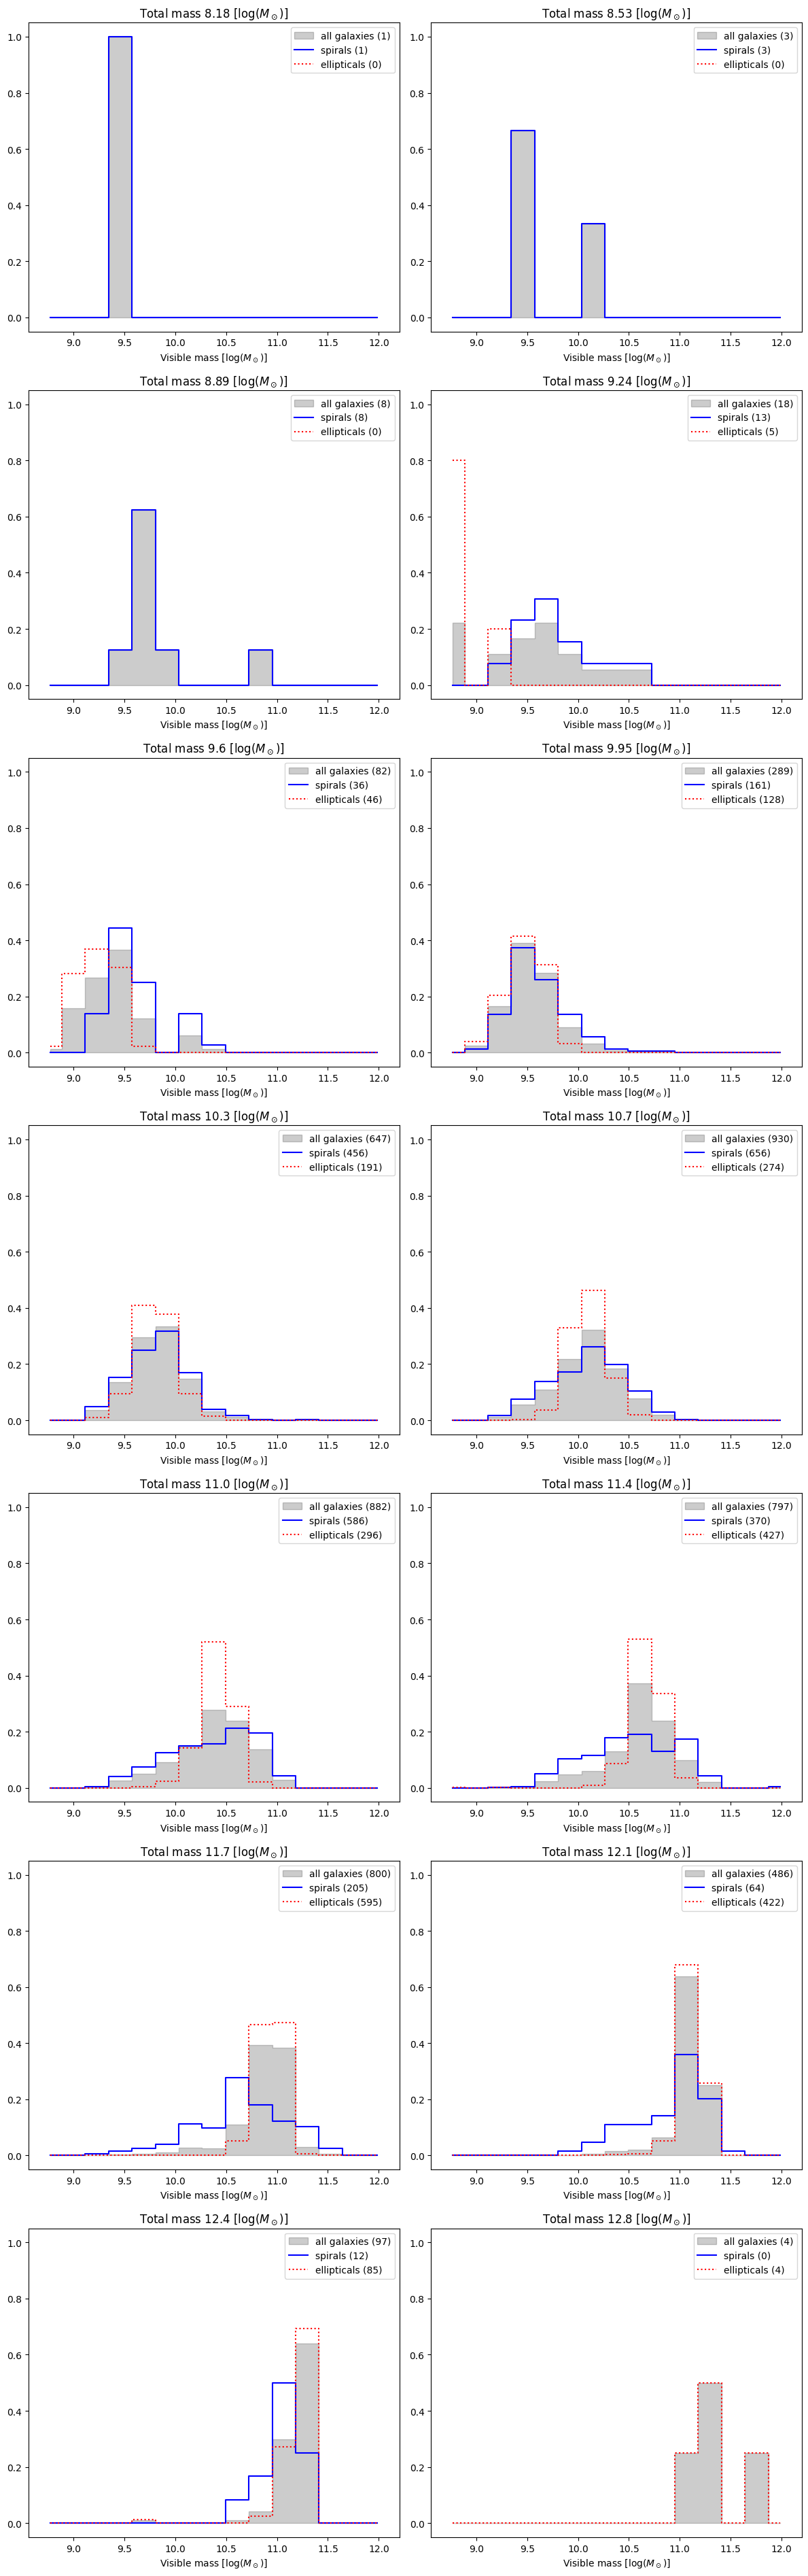

In [83]:
fig, ax = plt.subplots(7,2, figsize=(12,38))

for i in range(0,len(tot_mass_points)):
    j = int(i/2)
    k = i % 2
    
    mvis = np.hstack([spirals_HI_R90_mvis[i].data,np.log10(ellipticals_mstar[i].data)])
    all_mvis, _ = np.histogram(mvis, bins=bins)
    pts = (bins[1:] + bins[:-1])/2
    mvis_s, _ = np.histogram(spirals_HI_R90_mvis[i], bins=bins)
    mstar_e, _ = np.histogram(np.log10(ellipticals_mstar[i]), bins=bins)
    
    ax[j,k].fill_between(pts, all_mvis/np.sum(all_mvis), 0, step = 'mid', color='k', alpha=0.2,label='all galaxies ({})'.format(np.sum(all_mvis)))
    ax[j,k].step(pts, mvis_s/np.sum(mvis_s), color='b', where='mid', label='spirals ({})'.format(np.sum(mvis_s)))
    ax[j,k].step(pts, mstar_e/np.sum(mstar_e), color='r', where='mid',linestyle=':', label='ellipticals ({})'.format(np.sum(mstar_e)))
    
    ax[j,k].set_title(r'Total mass {:.3} [$\log (M_\odot)$]'.format(tot_mass_points[i]))
    ax[j,k].legend()
    ax[j,k].set_xlabel(r'Visible mass [$\log(M_\odot)$]')
    ax[j,k].set_xlim(global_min-0.1,global_max+0.1)
    ax[j,k].set_ylim(-0.05,1.05)

fig.tight_layout()
fig.savefig(plot_dir + 'MstarHI_Mtothist_morph.png')

In [84]:
tot_mass_bins = np.linspace(np.min([np.min(spirals_HI_R90['M_R90']), np.min(ellipticals['Mvir'])]),
                           np.max([np.max(spirals_HI_R90['M_R90']), np.max(ellipticals['Mvir'])]),
                           15)
points = (tot_mass_bins[1:] + tot_mass_bins[:-1])/2

s_void_HI = spirals_HI_R90[spirals_HI_R90['vflag_VF'] == 1]
s_wall_HI = spirals_HI_R90[spirals_HI_R90['vflag_VF'] == 0]

s_void_ratio = []
e_void_ratio = []
s_wall_ratio = []
e_wall_ratio = []
s_all = []
e_all = []


for i in range(len(points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        s_void_ratio.append(s_void_HI['M_star_HI_R90'][s_void_HI['M_R90'] <= mass_lim] 
                            - s_void_HI['M_R90'][s_void_HI['M_R90'] <= mass_lim])
        e_void_ratio.append(np.log10(e_void['nsa_elpetro_mass'][e_void['Mvir'] <= mass_lim]) - e_void['Mvir'][e_void['Mvir'] <= mass_lim])
        s_wall_ratio.append(s_wall_HI['M_star_HI_R90'][s_wall_HI['M_R90'] <= mass_lim] 
                            - s_wall_HI['M_R90'][s_wall_HI['M_R90'] <= mass_lim])
        e_wall_ratio.append(np.log10(e_wall['nsa_elpetro_mass'][e_wall['Mvir'] <= mass_lim]) - e_wall['Mvir'][e_wall['Mvir'] <= mass_lim])
        s_all.append(spirals_HI_R90['M_star_HI_R90'][spirals_HI_R90['M_R90'] <= mass_lim] 
                     - spirals_HI_R90['M_R90'][spirals_HI_R90['M_R90'] <= mass_lim])
        e_all.append(np.log10(ellipticals['nsa_elpetro_mass'][ellipticals['Mvir'] <= mass_lim])
                     - ellipticals['Mvir'][ellipticals['Mvir'] <= mass_lim])
    else:
        s_void_ratio.append(s_void_HI['M_star_HI_R90'][np.logical_and(s_void_HI['M_R90'] <= mass_lim] 
                            - s_void_HI['M_R90'][s_void_HI['M_R90'] <= mass_lim])
        e_void_ratio.append(np.log10(e_void['nsa_elpetro_mass'][e_void['Mvir'] <= mass_lim]) - e_void['Mvir'][e_void['Mvir'] <= mass_lim])
        s_wall_ratio.append(s_wall_HI['M_star_HI_R90'][s_wall_HI['M_R90'] <= mass_lim] 
                            - s_wall_HI['M_R90'][s_wall_HI['M_R90'] <= mass_lim])
        e_wall_ratio.append(np.log10(e_wall['nsa_elpetro_mass'][e_wall['Mvir'] <= mass_lim]) - e_wall['Mvir'][e_wall['Mvir'] <= mass_lim])
        s_all.append(spirals_HI_R90['M_star_HI_R90'][spirals_HI_R90['M_R90'] <= mass_lim] 
                     - spirals_HI_R90['M_R90'][spirals_HI_R90['M_R90'] <= mass_lim])
        e_all.append(np.log10(ellipticals['nsa_elpetro_mass'][ellipticals['Mvir'] <= mass_lim])
                     - ellipticals['Mvir'][ellipticals['Mvir'] <= mass_lim])

for i in range(len(points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        s_void_ratio.append(s_void['M90_disk'][s_void['M_R90'] <= mass_lim] - s_void['M_R90'][s_mag_void <= mass_lim])
        e_void_ratio.append(np.log10(e_void['nsa_elpetro_mass'][e_void['Mvir'] <= mass_lim]) - e_void['Mvir'])
        s_void_ratio.append(s_void['M90_disk'][s_void['M_R90'] <= mass_lim] - s_void['M_R90'][s_mag_void <= mass_lim])
        e_wall_ratio.append(e_wall['Mvir'][e_mag_wall <= mass_lim])
    else:
        lower_lim = magnitude_bins[i]

        s_void_vals.append(s_void['M_R90'][np.logical_and(s_mag_void <= mag_lim, s_mag_void > lower_lim)])
        e_void_vals.append(e_void['Mvir'][np.logical_and(e_mag_void <= mag_lim, e_mag_void > lower_lim)])
        s_wall_vals.append(s_wall['M_R90'][np.logical_and(s_mag_wall <= mag_lim, s_mag_wall > lower_lim)])
        e_wall_vals.append(e_wall['Mvir'][np.logical_and(e_mag_wall <= mag_lim, e_mag_wall > lower_lim)])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2613091473.py, line 31)

### Mstar/Mtot vs Mr spirals, ellipticals

In [38]:
mag_bins = np.linspace(np.min([np.min(e_mag), np.min(s_mag)]),
                       np.max([np.max(e_mag), np.max(s_mag)]),
                       30)
pts = (mag_bins[1:] + mag_bins[:-1]) / 2
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**spirals['Mstar_Mtot_R90'][spirals['rabsmag'] <= mag_lim])

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**spirals['Mstar_Mtot_R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)])


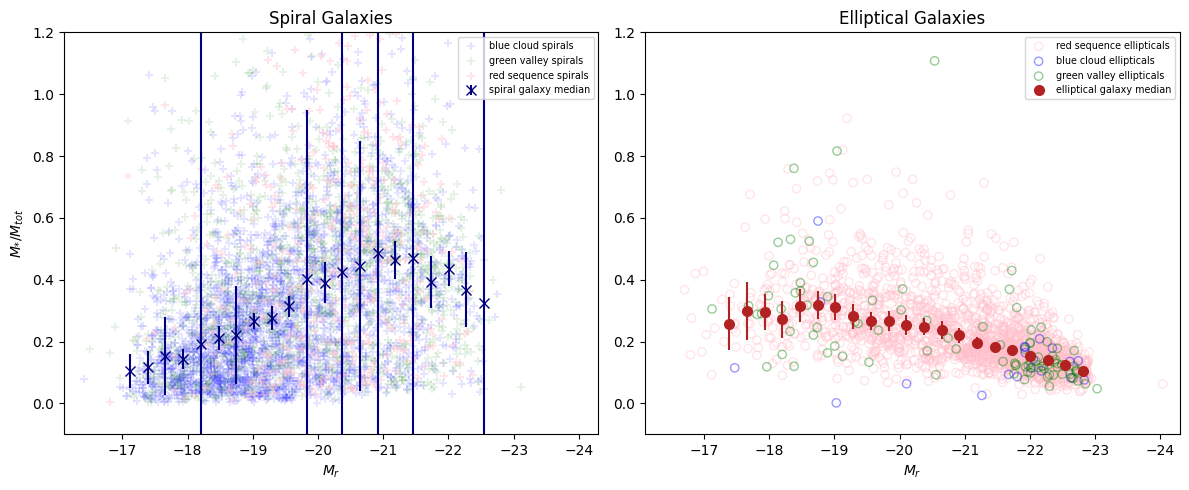

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{*}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 10**spirals['Mstar_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 10**spirals['Mstar_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 10**spirals['Mstar_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')


# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mr_MstarMtot_scatter_cmd_spiral_elliptical.png')

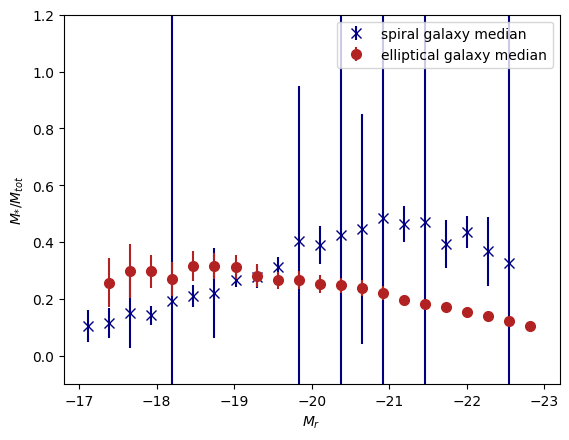

In [16]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{*}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'Mr_MstarMtot_median_morph.png')
plt.show()

### Mvis(Star + HI)/Mtot vs. Mr (spirals, ellipticals)

In [41]:
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**spirals['MstarHI_Mtot_R90'][spirals['rabsmag'] <= mag_lim])

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**spirals['MstarHI_Mtot_R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)])


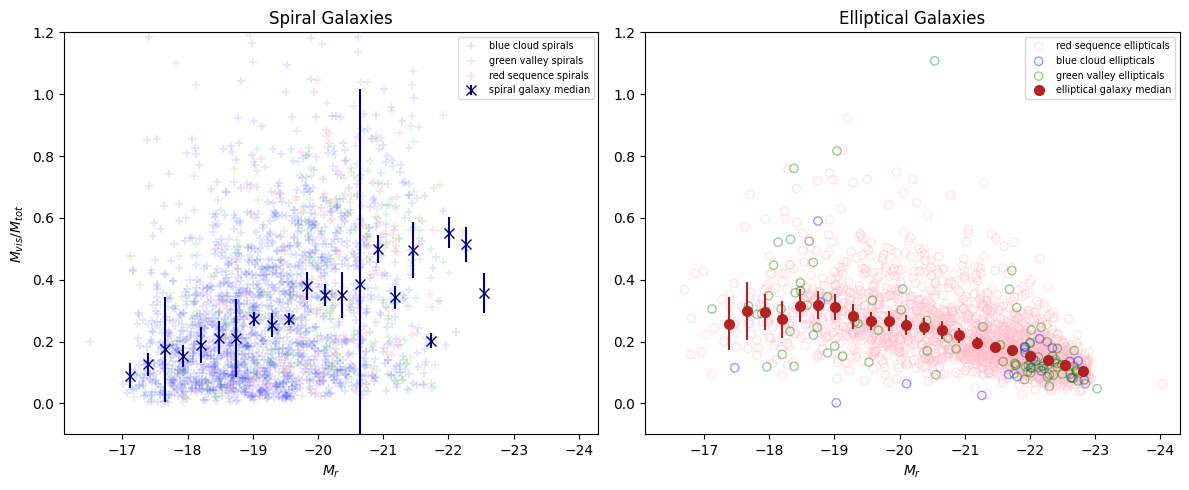

In [42]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 10**spirals['MstarHI_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 10**spirals['MstarHI_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 10**spirals['MstarHI_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mr_MstarHIMtot_scatter_cmd_spiral_elliptical.png')

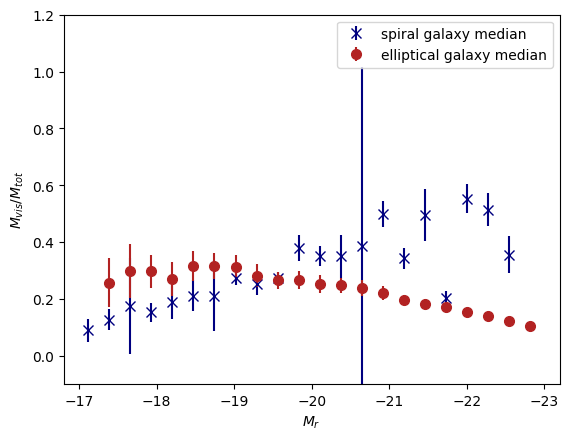

In [43]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'Mr_MstarHIMtot_median_morph.png')
plt.show()

### Mvis(all)/Mtot vs Mr  spirals and ellipticals

In [44]:
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][spirals['rabsmag'] <= mag_lim])

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)])


/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/elliptical_plottingFunctions.py:478: UserWarning: Warning: converting a masked element to nan.
  p[i][0] = median
/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/elliptical_plottingFunctions.py:479: UserWarning: Warning: converting a masked element to nan.
  p[i][1] = rms/sqrtN
/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/elliptical_plottingFunctions.py:480: UserWarning: Warning: converting a masked element to nan.
  p[i][2] = rms/sqrtN


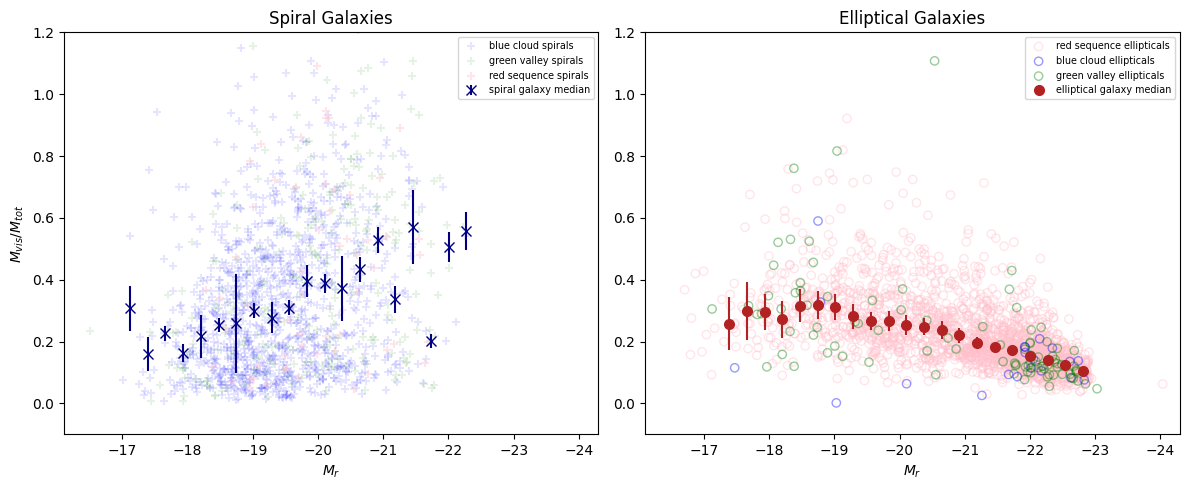

In [45]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mr_MvisMtot_scatter_cmd_spiral_elliptical.png')

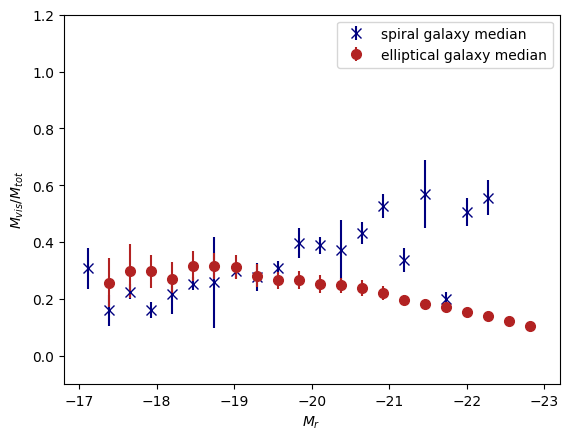

In [46]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'Mr_MvisMtot_median_morph.png')
plt.show()

### Mvis(all)/Mtot vs SFR

In [77]:
bins = np.linspace(np.min([np.min(spirals['SFR']), np.min(ellipticals['SFR'])]),
                   np.max([np.max(spirals['SFR']), np.max(ellipticals['SFR'])]),
                   25)
pts = (bins[1:] + bins[:-1])/2

e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['SFR'] <= mag_lim])
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][spirals['SFR'] <= mag_lim])

    else:
        lower_lim = bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['SFR'] <= mag_lim, 
                                                                         ellipticals['SFR'] > lower_lim)])
        
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][np.logical_and(spirals['SFR'] <= mag_lim, 
                                                                         spirals['SFR'] > lower_lim)])


<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/2403320123.py:12: SyntaxWarning: invalid escape sequence '\ '
  ax[0].set_xlabel('$SFR\ [\log(M_\odot / yr)]$')
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/2403320123.py:13: SyntaxWarning: invalid escape sequence '\ '
  ax[1].set_xlabel('$SFR\ [\log(M_\odot / yr)]$')


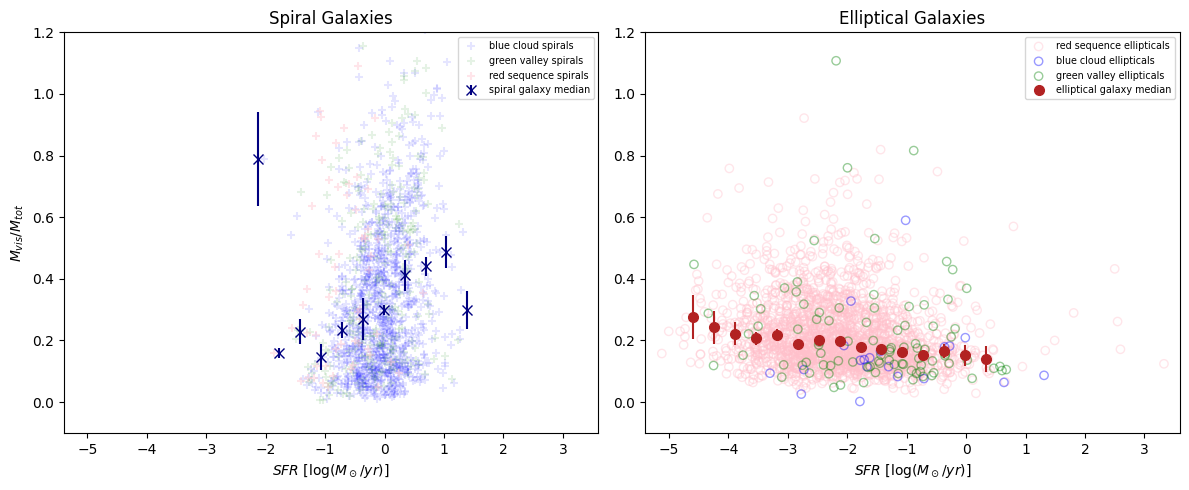

In [79]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-5.4,3.6)
ax[1].set_xlim(-5.4,3.6)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$SFR\ [\log(M_\odot / yr)]$')
ax[1].set_xlabel('$SFR\ [\log(M_\odot / yr)]$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['SFR'][spirals['CMD_class'] == 1], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['SFR'][spirals['CMD_class'] == 2], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['SFR'][spirals['CMD_class'] == 3], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['SFR'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['SFR'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['SFR'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'SFR_MvisMtot_scatter_cmd_spiral_elliptical.png')

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/3083857822.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$SFR [\log(M_\odot/yr)]$')


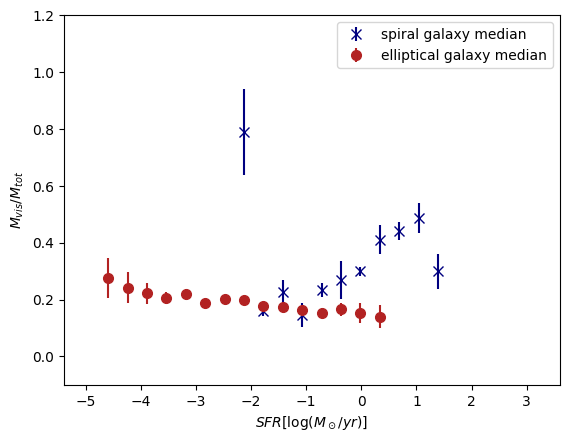

In [81]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$SFR [\log(M_\odot/yr)]$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-5.4,3.6)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'SFR_MvisMtot_median_morph.png')
plt.show()

### Mvis(all)/Mtot vs sSFR 

In [82]:
bins = np.linspace(np.min([np.min(spirals['sSFR']), np.min(ellipticals['sSFR'])]),
                   np.max([np.max(spirals['sSFR']), np.max(ellipticals['sSFR'])]),
                   25)
pts = (bins[1:] + bins[:-1])/2

e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['sSFR'] <= mag_lim])
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][spirals['sSFR'] <= mag_lim])

    else:
        lower_lim = bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['sSFR'] <= mag_lim, 
                                                                         ellipticals['sSFR'] > lower_lim)])
        
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][np.logical_and(spirals['sSFR'] <= mag_lim, 
                                                                         spirals['sSFR'] > lower_lim)])


<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/175349684.py:10: SyntaxWarning: invalid escape sequence '\ '
  ax[0].set_xlabel('$sSFR\ [\log(yr^{-1})]$')
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/175349684.py:11: SyntaxWarning: invalid escape sequence '\ '
  ax[1].set_xlabel('$sSFR\ [\log(yr^{-1})]$')


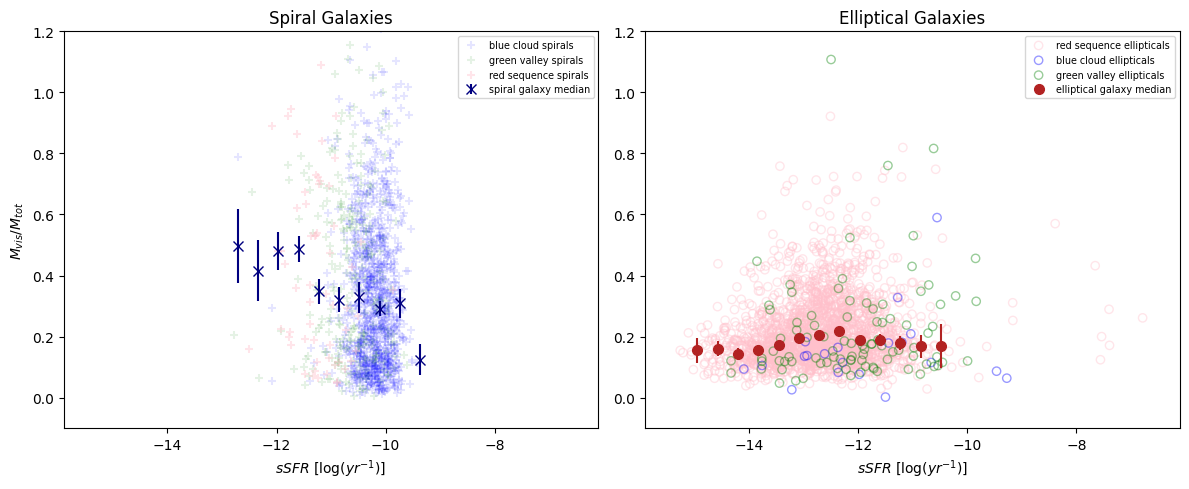

In [86]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$sSFR\ [\log(yr^{-1})]$')
ax[1].set_xlabel('$sSFR\ [\log(yr^{-1})]$')
ax[0].set_xlim(-15.9,-6.1)
ax[1].set_xlim(-15.9,-6.1)
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['sSFR'][spirals['CMD_class'] == 1], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['sSFR'][spirals['CMD_class'] == 2], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['sSFR'][spirals['CMD_class'] == 3], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['sSFR'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['sSFR'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['sSFR'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'sSFR_MvisMtot_scatter_cmd_spiral_elliptical.png')

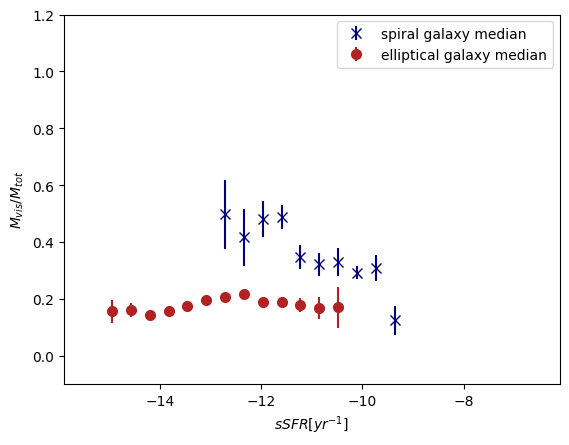

In [87]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$sSFR [yr^{-1}]$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-15.9,-6.1)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'sSFR_MvisMtot_median_morph.png')
plt.show()

### Mvis(all)/Mtot vs R90kpc

In [97]:
nsa = Table.read('/Users/nityaravi/Documents/Research/RotationCurves/data/nsa_v1_0_1.fits')
nsa_dict = {}
for i in range(len(nsa)):
    nsa_dict[nsa['NSAID'][i]] = i

In [98]:
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458  # Speed of light in units of km/s

In [99]:
for i in range(len(ellipticals)):
    nsa_idx = nsa_dict[ellipticals['nsa_nsaid'][i]]
    R90 = nsa['ELPETRO_TH90_R'][nsa_idx]
    ellipticals['nsa_elpetro_th90'][i] = R90
    ellipticals['R90_kpc'][i] = R90_kpc = 1000*c*ellipticals['nsa_z'][i]\
                            /H_0*np.tan(R90*(1./60)*(1./60)*(np.pi/180))

In [109]:
bins = np.linspace(np.min([np.min(spirals['R90_kpc']), np.min(ellipticals['R90_kpc'])]),
                   #np.max([np.max(spirals['R90_kpc']), np.max(ellipticals['R90_kpc'])]),
                   60,
                   30)
pts = (bins[1:] + bins[:-1])/2

e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['R90_kpc'] <= mag_lim])
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][spirals['R90_kpc'] <= mag_lim])

    else:
        lower_lim = bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['R90_kpc'] <= mag_lim, 
                                                                         ellipticals['R90_kpc'] > lower_lim)])
        
        s_mratio.append(10**spirals['Mvis_Mtot_R90'][np.logical_and(spirals['R90_kpc'] <= mag_lim, 
                                                                         spirals['R90_kpc'] > lower_lim)])


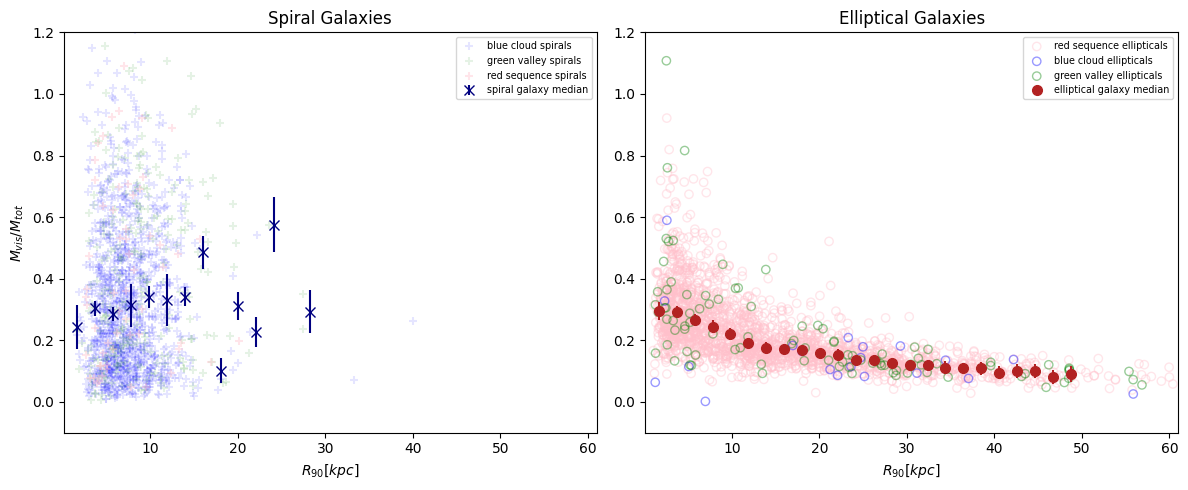

In [112]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$R_{90}\ [kpc]$')
ax[1].set_xlabel('$R_{90}\ [kpc]$')
ax[0].set_xlim(0.1,61)
ax[1].set_xlim(0.1,61)
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['R90_kpc'][spirals['CMD_class'] == 1], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 1],
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['R90_kpc'][spirals['CMD_class'] == 2], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 2],
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['R90_kpc'][spirals['CMD_class'] == 3], 10**spirals['Mvis_Mtot_R90'][spirals['CMD_class'] == 3],
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['R90_kpc'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['R90_kpc'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['R90_kpc'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'R90_MvisMtot_scatter_cmd_spiral_elliptical.png')

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/2016836218.py:18: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$R_{90}\ [kpc]$')


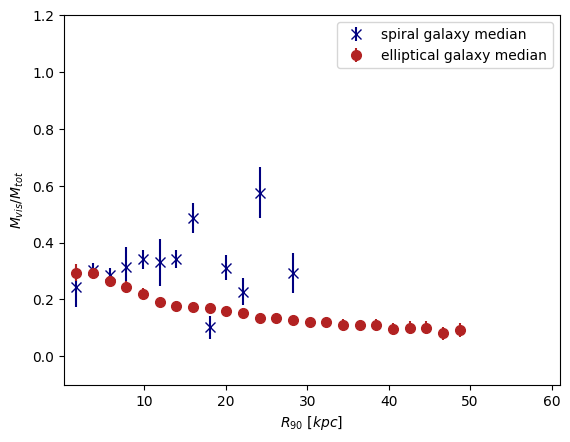

In [113]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$R_{90}\ [kpc]$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(0.1,61)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'R90_MvisMtot_median_morph.png')
plt.show()

### Mvis(stellar+HI)/Mtot vs Mr 3.5 R90 

In [47]:
e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['rabsmag'] <= mag_lim])
        s_mratio.append(10**(spirals['Mstar_HI_3p5R90'][spirals['rabsmag'] <= mag_lim] 
                        - spirals['M'][spirals['rabsmag'] <= mag_lim]))

    else:
        lower_lim = mag_bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                                         ellipticals['rabsmag'] > lower_lim)])
        
        s_mratio.append(10**(spirals['Mstar_HI_3p5R90'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)]
                            - spirals['M'][np.logical_and(spirals['rabsmag'] <= mag_lim, 
                                                                         spirals['rabsmag'] > lower_lim)]))


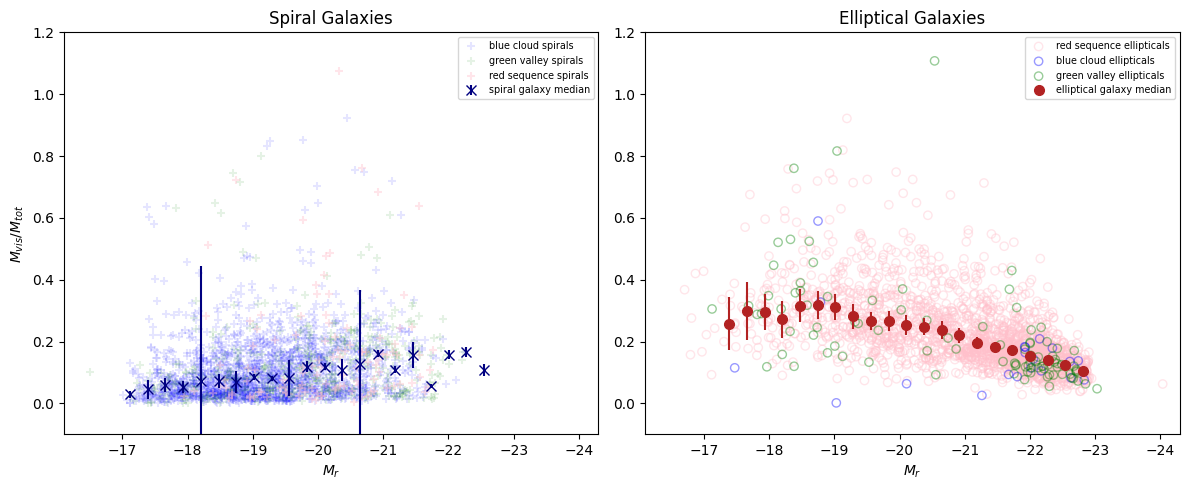

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(-16.1,-24.3)
ax[1].set_xlim(-16.1,-24.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_r$')
ax[1].set_xlabel('$M_r$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 1], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 1] - spirals['M'][spirals['CMD_class'] == 1]),
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 2], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 2] - spirals['M'][spirals['CMD_class'] == 2]),
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['rabsmag'][spirals['CMD_class'] == 3], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 3] - spirals['M'][spirals['CMD_class'] == 3]),
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['rabsmag'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mr_MstarHIMtot3p5_scatter_cmd_spiral_elliptical.png')

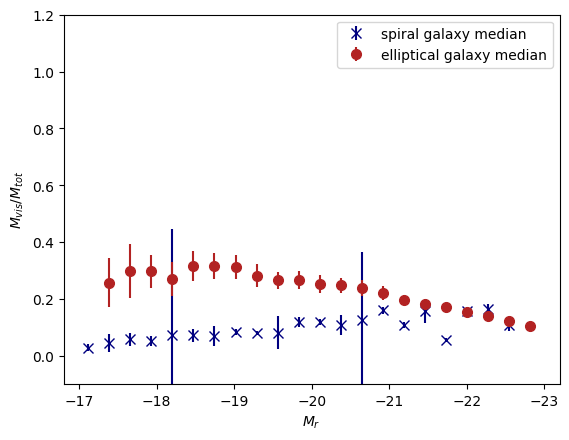

In [50]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(-16.8, -23.2)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'Mr_MstarHIMtot3p5_median_morph.png')
plt.show()

### Mvis(stellar+HI)/Mtot vs Mtot 3.590

In [57]:
bins = np.linspace(np.min([np.min(spirals['M']), np.min(ellipticals['Mvir'])]),
                   np.max([np.max(spirals['M']), np.max(ellipticals['Mvir'])]),
                   25)
pts = (bins[1:] + bins[:-1])/2

e_mratio = []
s_mratio = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][ellipticals['Mvir'] <= mass_lim])
        s_mratio.append(10**(spirals['Mstar_HI_3p5R90'][spirals['M'] <= mass_lim] 
                        - spirals['M'][spirals['M'] <= mass_lim]))

    else:
        lower_lim = bins[i]
        e_mratio.append(10**ellipticals['nsa_Mstar_Mtot'][np.logical_and(ellipticals['Mvir'] <= mass_lim, 
                                                                         ellipticals['Mvir'] > lower_lim)])
        
        s_mratio.append(10**(spirals['Mstar_HI_3p5R90'][np.logical_and(spirals['M'] <= mass_lim, 
                                                                         spirals['M'] > lower_lim)]
                            - spirals['M'][np.logical_and(spirals['M'] <= mass_lim, 
                                                                         spirals['M'] > lower_lim)]))


<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/3648984078.py:12: SyntaxWarning: invalid escape sequence '\ '
  ax[0].set_xlabel('$M_{tot}\ [\log(M_\odot)]$')
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/3648984078.py:13: SyntaxWarning: invalid escape sequence '\ '
  ax[1].set_xlabel('$M_{tot}\ [\log(M_\odot)]$')


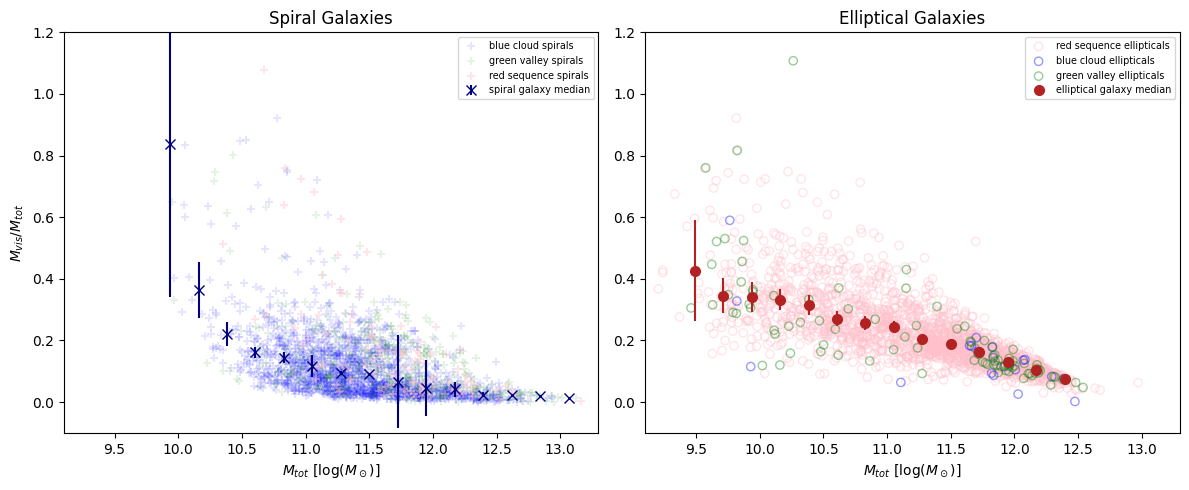

In [63]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Spiral Galaxies')
ax[1].set_title('Elliptical Galaxies')
ax[0].set_xlim(9.1,13.3)
ax[1].set_xlim(9.1,13.3)


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel('$M_{tot}\ [\log(M_\odot)]$')
ax[1].set_xlabel('$M_{tot}\ [\log(M_\odot)]$')
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)


# spirals
ax[0].scatter(spirals['M'][spirals['CMD_class'] == 1], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 1] - spirals['M'][spirals['CMD_class'] == 1]),
              marker='+', color='b', alpha=0.1, label='blue cloud spirals')
ax[0].scatter(spirals['M'][spirals['CMD_class'] == 2], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 2] - spirals['M'][spirals['CMD_class'] == 2]),
              marker='+', color='g', alpha=0.1, label='green valley spirals')
ax[0].scatter(spirals['M'][spirals['CMD_class'] == 3], 
              10**(spirals['Mstar_HI_3p5R90'][spirals['CMD_class'] == 3] - spirals['M'][spirals['CMD_class'] == 3]),
              marker='+', color='pink', alpha=0.4, label='red sequence spirals')


sp_mratio = med_err(s_mratio, False, False)

inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
ax[0].errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

# ellipticals

ax[1].scatter(ellipticals['Mvir'][ellipticals['CMD_class'] == 3], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 3],
              marker='o', color='pink', alpha=0.4, label='red sequence ellipticals', fc='none')
ax[1].scatter(ellipticals['Mvir'][ellipticals['CMD_class'] == 1], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 1],
              marker='o', color='b', alpha=0.4, label='blue cloud ellipticals', fc='none')
ax[1].scatter(ellipticals['Mvir'][ellipticals['CMD_class'] == 2], 10**ellipticals['nsa_Mstar_Mtot'][ellipticals['CMD_class'] == 2],
              marker='o', color='g', alpha=0.4, label='green valley ellipticals', fc='none')


ep_mratio = med_err(e_mratio, False, False)

inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
ax[1].errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')

fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_MstarHIMtot3p5_scatter_cmd_spiral_elliptical.png')

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_16352/1485666468.py:18: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$M_{tot}\ [\log(M_\odot)]$')


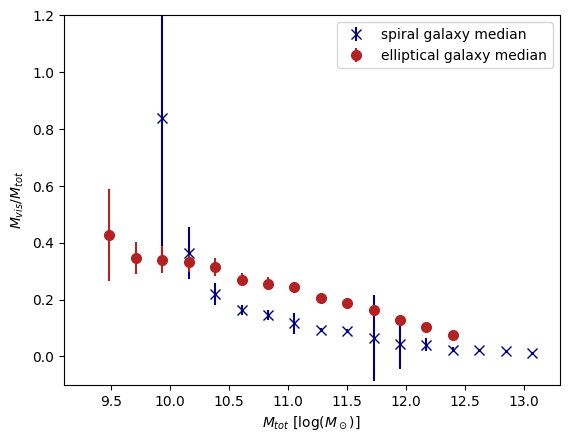

In [64]:
inf_bars = np.where(sp_mratio == np.inf)[0]
sp_mratio[inf_bars][:,0]
plt.errorbar(pts, sp_mratio[:,0], color='navy', yerr=[sp_mratio[:,1] ,sp_mratio[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=sp_mratio[inf_bars][:,0], uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_mratio[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')
inf_bars = np.where(ep_mratio == np.inf)[0]
ep_mratio[inf_bars][:,0]
plt.errorbar(pts, ep_mratio[:,0], color='firebrick', yerr=[ep_mratio[:,1] ,ep_mratio[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=ep_mratio[inf_bars][:,0], uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_mratio[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_mratio[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_{tot}\ [\log(M_\odot)]$')
plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlim(9.1,13.3)
plt.ylim(-0.1, 1.2)
plt.legend()
plt.savefig(plot_dir + 'Mtot_MstarHIMtot3p5_median_morph.png')
plt.show()

### Spirals Mvis = Mstar(R90) + MHI(R90); Ellipticals Mvis = Mstar + MHI

In [85]:
ellipticals_mvis = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        ellipticals_mvis.append(ellipticals_HI['nsa_elpetro_mass'][ellipticals_HI['Mvir'] <= mass_lim] \
                                + 10**ellipticals_HI['logHI'][ellipticals_HI['Mvir'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        ellipticals_mvis.append(ellipticals_HI['nsa_elpetro_mass'][np.logical_and(ellipticals_HI['Mvir'] <= mass_lim, ellipticals_HI['Mvir'] > lower_lim)]\
                                + 10**ellipticals_HI['logHI'][np.logical_and(ellipticals_HI['Mvir'] <= mass_lim, ellipticals_HI['Mvir'] > lower_lim)])

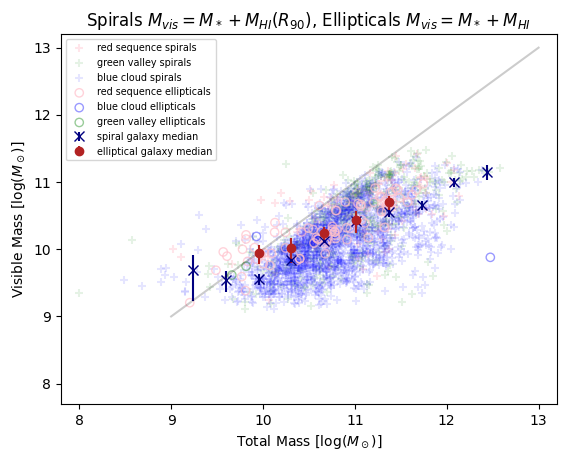

In [87]:
plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['logHI_R90']),
            alpha=0.4, color='pink', marker='+', label='red sequence spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['logHI_R90']),
            alpha=0.1, color='g', marker='+', label='green valley spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['logHI_R90']),
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(ellipticals_HI[ellipticals_HI['CMD_class'] == 3]['Mvir'], 
            np.log10(ellipticals_HI[ellipticals_HI['CMD_class'] == 3]['nsa_elpetro_mass']+10**ellipticals_HI[ellipticals_HI['CMD_class'] == 3]['logHI']),
            alpha=0.7, color = 'pink', label='red sequence ellipticals', facecolor='none')
plt.scatter(ellipticals_HI[ellipticals_HI['CMD_class'] == 1]['Mvir'], 
            np.log10(ellipticals_HI[ellipticals_HI['CMD_class'] == 1]['nsa_elpetro_mass']+10**ellipticals_HI[ellipticals_HI['CMD_class'] == 1]['logHI']),
            color = 'b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(ellipticals_HI[ellipticals_HI['CMD_class'] == 2]['Mvir'], 
            np.log10(ellipticals_HI[ellipticals_HI['CMD_class'] == 2]['nsa_elpetro_mass']+10**ellipticals_HI[ellipticals_HI['CMD_class'] == 2]['logHI']),
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')


ep = med_err(ellipticals_mvis, False, True)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='median spiral galaxy mass',linestyle='none')

# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='median elliptical galaxy mass', linestyle='none')



plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Visible Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.ylim(7.7,13.2)
plt.xlim(7.8,13.2)
plt.title(r'Spirals $M_{vis} = M_* + M_{HI}(R_{90})$, Ellipticals $M_{vis}=M_* + M_{HI}$')
plt.savefig(plot_dir + 'Mtot_MstarHIall_scatter_cmd_moprh.png')
plt.show()

### Spirals Mvis = Mstar(R90) + MHI(R90); Ellipticals Mvis = Mstar + MHIlim

In [88]:
ellipticals_mvis_lim = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        ellipticals_mvis_lim.append(ellipticals_HI_lim['nsa_elpetro_mass'][ellipticals_HI_lim['Mvir'] <= mass_lim] \
                                + 10**ellipticals_HI_lim['logHIlim'][ellipticals_HI_lim['Mvir'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        ellipticals_mvis_lim.append(ellipticals_HI_lim['nsa_elpetro_mass'][np.logical_and(ellipticals_HI_lim['Mvir'] <= mass_lim, ellipticals_HI_lim['Mvir'] > lower_lim)]\
                                + 10**ellipticals_HI_lim['logHIlim'][np.logical_and(ellipticals_HI_lim['Mvir'] <= mass_lim, ellipticals_HI_lim['Mvir'] > lower_lim)])

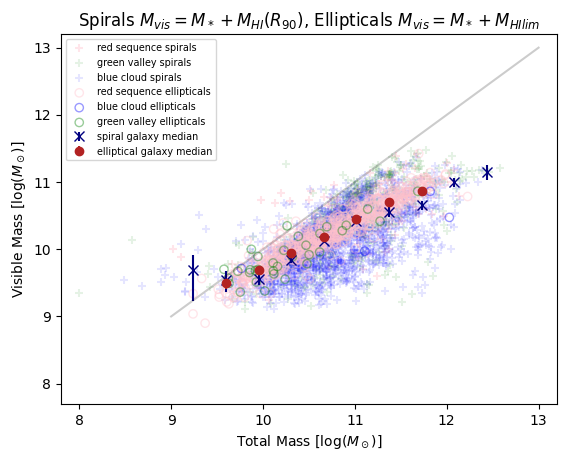

In [89]:
plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['logHI_R90']),
            alpha=0.4, color='pink', marker='+', label='red sequence spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['logHI_R90']),
            alpha=0.1, color='g', marker='+', label='green valley spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M_R90'],
            np.log10(10**spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M90_disk']+10**spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['logHI_R90']),
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 3]['Mvir'], 
            np.log10(ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 3]['nsa_elpetro_mass']+
                     10**ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 3]['logHIlim']),
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none')
plt.scatter(ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 1]['Mvir'], 
            np.log10(ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 1]['nsa_elpetro_mass']+
                     10**ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 1]['logHIlim']),
            color = 'b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 2]['Mvir'], 
            np.log10(ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 2]['nsa_elpetro_mass']+
                     10**ellipticals_HI_lim[ellipticals_HI_lim['CMD_class'] == 2]['logHIlim']),
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')

ep = med_err(ellipticals_mvis_lim, False, True)


inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='median spiral galaxy mass',linestyle='none')

# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='median elliptical galaxy mass', linestyle='none')

plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Visible Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.ylim(7.7,13.2)
plt.xlim(7.8,13.2)
plt.title(r'Spirals $M_{vis} = M_* + M_{HI}(R_{90})$, Ellipticals $M_{vis}=M_* + M_{HIlim}$')
plt.savefig(plot_dir + 'Mtot_MstarHIlim_scatter_cmd_morph.png')
plt.show()

### Spirals Mvis = Mstar(R90) + MHI; Ellipticals Mvis = Mstar

In [90]:
spirals_HI_mvis = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        spirals_HI_mvis.append(np.log10(10**spirals_HI_R90['logHI'][spirals_HI_R90['M_R90'] <= mass_lim] + 10**spirals_HI_R90['M90_disk'][spirals_HI_R90['M_R90'] <= mass_lim]))
        
    else:
        lower_lim = tot_mass_bins[i]
        spirals_HI_mvis.append(np.log10(10**spirals_HI_R90['M90_disk'][np.logical_and(spirals_HI_R90['M_R90'] <= mass_lim, spirals_HI_R90['M_R90'] > lower_lim)] +\
                                            10**spirals_HI_R90['logHI'][np.logical_and(spirals_HI_R90['M_R90'] <= mass_lim, spirals_HI_R90['M_R90'] > lower_lim)])
        )

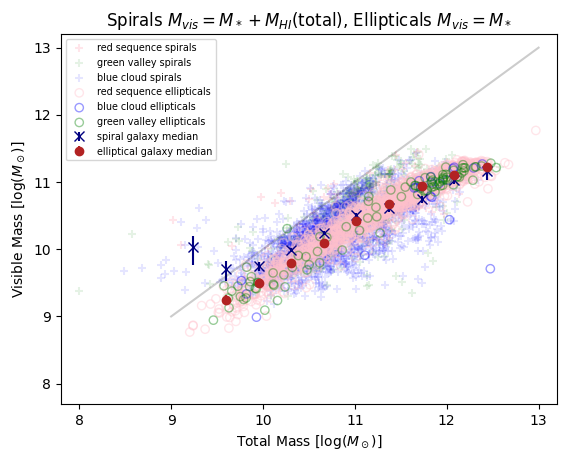

In [91]:
plt.scatter(spirals_HI[spirals_HI['CMD_class']==3]['M_R90'],
            np.log10(10**spirals_HI[spirals_HI['CMD_class']==3]['M90_disk']+10**spirals_HI[spirals_HI['CMD_class']==3]['logHI']),
            alpha=0.4, color='pink', marker='+', label= 'red sequence spirals')

plt.scatter(spirals_HI[spirals_HI['CMD_class']==2]['M_R90'],
            np.log10(10**spirals_HI[spirals_HI['CMD_class']==2]['M90_disk']+10**spirals_HI[spirals_HI['CMD_class']==2]['logHI']),
            alpha=0.1, color='g', marker='+', label='green valley spirals')

plt.scatter(spirals_HI[spirals_HI['CMD_class']==1]['M_R90'],
            np.log10(10**spirals_HI[spirals_HI['CMD_class']==1]['M90_disk']+10**spirals_HI[spirals_HI['CMD_class']==1]['logHI']),
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(Mvir[ellipticals['CMD_class'] == 3], Mstar[ellipticals['CMD_class'] == 3],
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 1], Mstar[ellipticals['CMD_class'] == 1],
            color = 'b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 2], Mstar[ellipticals['CMD_class'] == 2],
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')

ep = med_err(ellipticals_mstar, False, True)
sp = med_err(spirals_HI_mvis)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='median spiral galaxy mass',linestyle='none')

# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='median elliptical galaxy mass', linestyle='none')

plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Visible Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.xlim(7.8,13.2)
plt.ylim(7.7,13.2)
plt.title(r'Spirals $M_{vis} = M_* + M_{HI}$(total), Ellipticals $M_{vis}=M_*$')
plt.savefig(plot_dir + 'Mtot_MstarHItot_scatter_cmd_morph.png')
plt.show()

### Spirals Mvis = Mstar(3.5 R90) + MHI; Ellipticals Mvis = Mstar

In [92]:
tot_mass_bins = np.linspace(np.min(spirals_HI['M']), np.max(spirals_HI['M']), 15)
tot_mass_points = (tot_mass_bins[1:] + tot_mass_bins[:-1])/2

spirals_HI_mvis_3p5 = []
ellipticals_mstar_3p5 = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        spirals_HI_mvis_3p5.append(np.log10(10**spirals_HI['logHI'][spirals_HI_R90['M'] <= mass_lim] + 10**spirals_HI_R90['M_disk'][spirals_HI_R90['M'] <= mass_lim]))
        ellipticals_mstar_3p5.append(ellipticals['nsa_elpetro_mass'][ellipticals['Mvir'] <= mass_lim])

    else:
        lower_lim = tot_mass_bins[i]
        ellipticals_mstar_3p5.append(ellipticals['nsa_elpetro_mass'][np.logical_and(ellipticals['Mvir'] <= mass_lim, ellipticals['Mvir'] > lower_lim)])
        spirals_HI_mvis_3p5.append(np.log10(10**spirals_HI_R90['M_disk'][np.logical_and(spirals_HI_R90['M'] <= mass_lim, spirals_HI_R90['M'] > lower_lim)] +\
                                            10**spirals_HI_R90['logHI'][np.logical_and(spirals_HI_R90['M'] <= mass_lim, spirals_HI_R90['M'] > lower_lim)])
        )

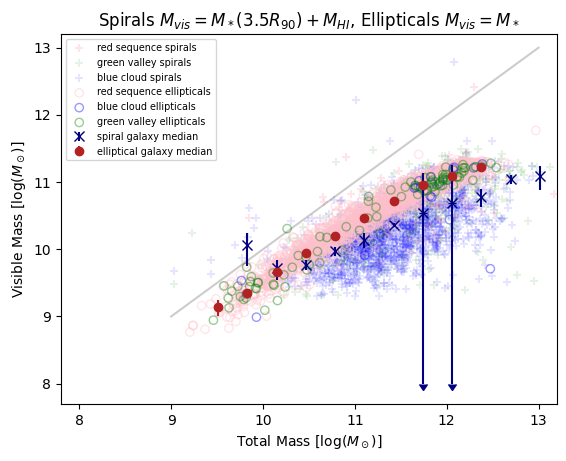

In [93]:
plt.scatter(spirals_HI[spirals_HI['CMD_class']==3]['M'],
            np.log10(10**spirals_HI[spirals_HI['CMD_class']==3]['M_disk']+10**spirals_HI[spirals_HI['CMD_class']==3]['logHI']),
            alpha=0.4, color='pink', marker='+', label='red sequence spirals')

plt.scatter(spirals_HI[spirals_HI['CMD_class']==2]['M'],
            np.log10(10**spirals_HI[spirals_HI['CMD_class']==2]['M_disk']+10**spirals_HI[spirals_HI['CMD_class']==2]['logHI']),
            alpha=0.1, color='g', marker='+', label='green valley spirals')

plt.scatter(spirals_HI[spirals_HI['CMD_class']==1]['M'],
            np.log10(10**spirals_HI[spirals_HI['CMD_class']==1]['M_disk']+10**spirals_HI[spirals_HI['CMD_class']==1]['logHI']),
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(Mvir[ellipticals['CMD_class'] == 3], Mstar[ellipticals['CMD_class'] == 3],
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 1], Mstar[ellipticals['CMD_class'] == 1],
            color = 'b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 2], Mstar[ellipticals['CMD_class'] == 2],
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')

ep = med_err(ellipticals_mstar_3p5, False, True)
sp = med_err(spirals_HI_mvis_3p5)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='median spiral galaxy mass',linestyle='none')

# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='median elliptical galaxy mass', linestyle='none')

plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Visible Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.xlim(7.8,13.2)
plt.ylim(7.7,13.2)
plt.title(r'Spirals $M_{vis} = M_*(3.5R_{90}) + M_{HI}$, Ellipticals $M_{vis}=M_*$')
plt.savefig(plot_dir + 'Mtot_MstarHI3p5_scatter_cmd_morph.png')
plt.show()

### Spirals Mvis = Mstar(R90); Ellipticals Mvis = Mstar

In [94]:
tot_mass_bins = np.linspace(np.min(spirals_HI_R90['M_R90']), np.max(ellipticals['Mvir']), 15)
tot_mass_points = (tot_mass_bins[1:] + tot_mass_bins[:-1])/2

spirals_HI_R90_mstar = []
ellipticals_mstar = []

for i in range(len(tot_mass_points)):
    mass_lim = tot_mass_bins[i+1]
    if i == 0:
        spirals_HI_R90_mstar.append(spirals_HI_R90['M90_disk'][spirals_HI_R90['M_R90'] <= mass_lim])
        ellipticals_mstar.append(ellipticals['nsa_elpetro_mass'][ellipticals['Mvir'] <= mass_lim])
        
    else:
        lower_lim = tot_mass_bins[i]
        spirals_HI_R90_mstar.append(spirals_HI_R90['M90_disk'][np.logical_and(spirals_HI_R90['M_R90'] <= mass_lim, spirals_HI_R90['M_R90'] > lower_lim)])
        ellipticals_mstar.append(ellipticals['nsa_elpetro_mass'][np.logical_and(ellipticals['Mvir'] <= mass_lim, ellipticals['Mvir'] > lower_lim )])

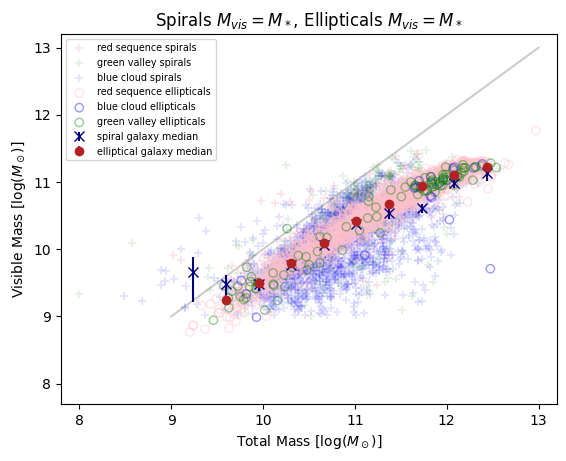

In [95]:
plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M_R90'],
            spirals_HI_R90[spirals_HI_R90['CMD_class']==3]['M90_disk'],
            alpha=0.4, color='pink', marker='+', label='red sequence spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M_R90'],
            spirals_HI_R90[spirals_HI_R90['CMD_class']==2]['M90_disk'],
            alpha=0.1, color='g', marker='+', label='green valley spirals')

plt.scatter(spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M_R90'],
            spirals_HI_R90[spirals_HI_R90['CMD_class']==1]['M90_disk'],
            alpha=0.1, color='b', marker='+', label='blue cloud spirals')


plt.scatter(Mvir[ellipticals['CMD_class'] == 3], Mstar[ellipticals['CMD_class'] == 3],
            alpha=0.4, color = 'pink', label='red sequence ellipticals', facecolor='none',)
plt.scatter(Mvir[ellipticals['CMD_class'] == 1], Mstar[ellipticals['CMD_class'] == 1],
            color = 'b', alpha=0.4, label='blue cloud ellipticals', facecolor='none')
plt.scatter(Mvir[ellipticals['CMD_class'] == 2], Mstar[ellipticals['CMD_class'] == 2],
            alpha=0.4, color = 'g', label='green valley ellipticals', facecolor='none')



sp = med_err(spirals_HI_R90_mstar)

ep = med_err(ellipticals_mstar, False, True)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-8, uplims=True,
             color='navy', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='navy', mfc='none', mec='none')

inf_bars = np.where(ep == np.inf)[0]
ep[inf_bars][:,0]
plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none',)
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=ep[inf_bars][:,0]-8, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(tot_mass_points[inf_bars], ep[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')



# plt.errorbar(tot_mass_points, sp[:,0], color='navy', yerr=[sp[:,1] ,sp[:,2]], 
#              marker='d', label='median spiral galaxy',linestyle='none')

# plt.errorbar(tot_mass_points, ep[:,0], color='firebrick', yerr=[ep[:,1] ,ep[:,2]], 
#              marker='d', label='median elliptical galaxy', linestyle='none')

plt.legend(fontsize='x-small')
plt.xlabel(r'Total Mass [$\log (M_\odot)$]')
plt.ylabel(r'Visible Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.title(r'Spirals $M_{vis} = M_*$, Ellipticals $M_{vis}=M_*$')
plt.ylim(7.7,13.2)
plt.xlim(7.8,13.2)
plt.savefig(plot_dir + 'Mtot_Mstar_scatter_cmd_morph.png')
plt.show()

### Mvis(stellar + HI)/Mtot vs Mtot void vs wall

In [267]:
bins = np.linspace(np.min([np.min(spirals['M_R90']), np.min(ellipticals['Mvir'])]),
                   np.max([np.max(spirals['M_R90']), np.max(ellipticals['Mvir'])]),
                   15)
pts = (bins[1:] + bins[:-1])/2

e_void_mvis = []
s_void_mvis = []
e_wall_mvis = []
s_wall_mvis = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        e_void_mvis.append(10**e_void['nsa_Mstar_Mtot'][e_void['Mvir'] <= mass_lim])
        e_wall_mvis.append(10**e_wall['nsa_Mstar_Mtot'][e_wall['Mvir'] <= mass_lim])
        s_void_mvis.append(10**s_void['MstarHI_Mtot_R90'][s_void['M_R90'] <= mass_lim])
        s_wall_mvis.append(10**s_wall['MstarHI_Mtot_R90'][s_wall['M_R90'] <= mass_lim])

    else:
        lower_lim = bins[i]
        e_void_mvis.append(10**e_void['nsa_Mstar_Mtot'][np.logical_and(e_void['Mvir'] <= mass_lim, e_void['Mvir'] > lower_lim)])
        e_wall_mvis.append(10**e_wall['nsa_Mstar_Mtot'][np.logical_and(e_wall['Mvir'] <= mass_lim, e_wall['Mvir'] > lower_lim)])
        s_void_mvis.append(10**s_void['MstarHI_Mtot_R90'][np.logical_and(s_void['M_R90'] <= mass_lim, s_void['M_R90'] > lower_lim)])
        s_wall_mvis.append(10**s_wall['MstarHI_Mtot_R90'][np.logical_and(s_wall['M_R90'] <= mass_lim, s_wall['M_R90'] > lower_lim)])

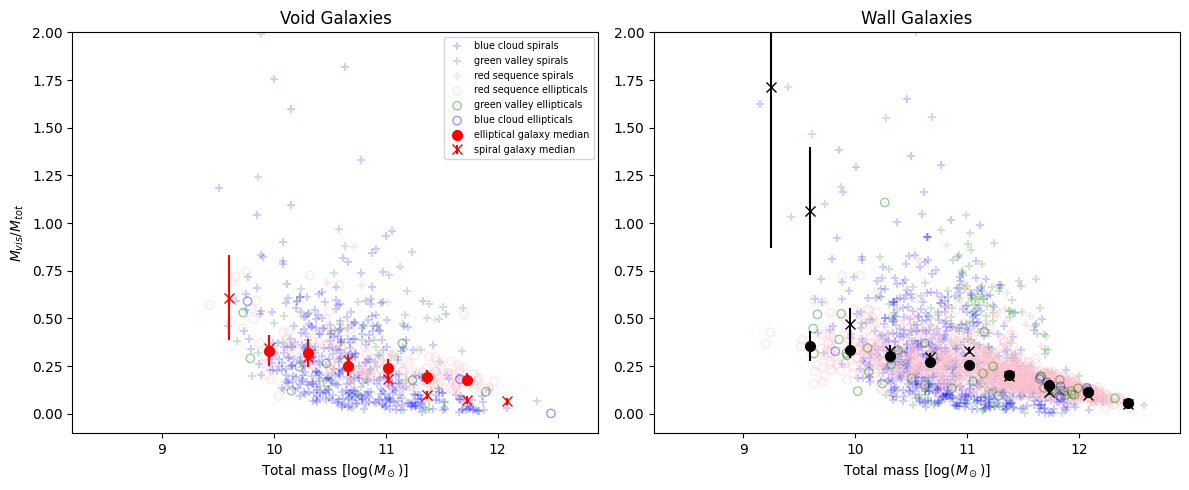

In [268]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Total mass [$\log(M_\odot)$]')


ax[1].set_ylim(-0.1,2)
ax[0].set_ylim(-0.1,2)
ax[1].set_xlim(8.2,12.9)
ax[0].set_xlim(8.2,12.9)

# ax[0].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)
# ax[1].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)

ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M_R90'], 10**s_void[s_void['CMD_class'] == 1]['MstarHI_Mtot_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M_R90'], 10**s_void[s_void['CMD_class'] == 2]['MstarHI_Mtot_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M_R90'], 10**s_void[s_void['CMD_class'] == 3]['MstarHI_Mtot_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void[e_void['CMD_class'] == 3]['Mvir'], 10**e_void[e_void['CMD_class'] == 3]['nsa_Mstar_Mtot'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['Mvir'], 10**e_void[e_void['CMD_class'] == 2]['nsa_Mstar_Mtot'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 1]['Mvir'], 10**e_void[e_void['CMD_class'] == 1]['nsa_Mstar_Mtot'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')


ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M_R90'], 10**s_wall[s_wall['CMD_class'] == 1]['MstarHI_Mtot_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M_R90'], 10**s_wall[s_wall['CMD_class'] == 2]['MstarHI_Mtot_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M_R90'], 10**s_wall[s_wall['CMD_class'] == 3]['MstarHI_Mtot_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[1].scatter(e_wall[e_wall['CMD_class'] == 3]['Mvir'], 10**e_wall[e_wall['CMD_class'] == 3]['nsa_Mstar_Mtot'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['Mvir'], 10**e_wall[e_wall['CMD_class'] == 2]['nsa_Mstar_Mtot'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['Mvir'], 10**e_wall[e_wall['CMD_class'] == 1]['nsa_Mstar_Mtot'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

sp_void_mvis = med_err(s_void_mvis, False, False)
sp_wall_mvis = med_err(s_wall_mvis, False, False)
ep_void_mvis = med_err(e_void_mvis, False, False)
ep_wall_mvis = med_err(e_wall_mvis, False, False)

inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0], uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0], uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0], uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0], uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')


ax[0].legend(fontsize='x-small')


fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_MstarHIMtot_scatter_cmd_morph_env.png')

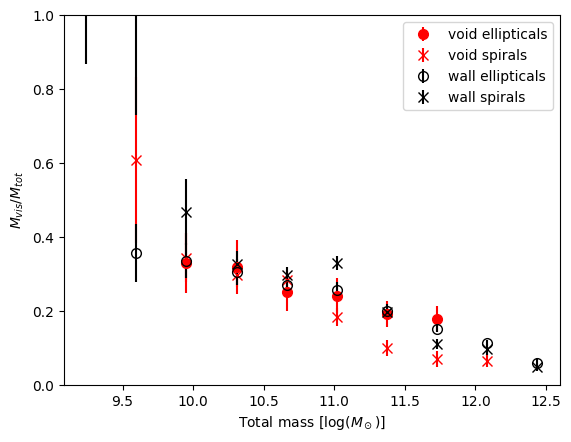

In [269]:
inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='void ellipticals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', markersize=7, mfc='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')
plt.ylim(0,1)

plt.legend()
plt.savefig(plot_dir + 'Mtot_MstarHIMtot_median_morph_env.png')

### Mvis(all)/Mtot vs Mtot void vs wall

In [271]:
bins = np.linspace(np.min([np.min(spirals['M_R90']), np.min(ellipticals['Mvir'])]),
                   np.max([np.max(spirals['M_R90']), np.max(ellipticals['Mvir'])]),
                   15)
pts = (bins[1:] + bins[:-1])/2

e_void_mvis = []
s_void_mvis = []
e_wall_mvis = []
s_wall_mvis = []

for i in range(len(pts)):
    mass_lim = bins[i+1]
    if i == 0:
        e_void_mvis.append(10**e_void['nsa_Mstar_Mtot'][e_void['Mvir'] <= mass_lim])
        e_wall_mvis.append(10**e_wall['nsa_Mstar_Mtot'][e_wall['Mvir'] <= mass_lim])
        s_void_mvis.append(10**s_void['Mvis_Mtot_R90'][s_void['M_R90'] <= mass_lim])
        s_wall_mvis.append(10**s_wall['Mvis_Mtot_R90'][s_wall['M_R90'] <= mass_lim])

    else:
        lower_lim = bins[i]
        e_void_mvis.append(10**e_void['nsa_Mstar_Mtot'][np.logical_and(e_void['Mvir'] <= mass_lim, e_void['Mvir'] > lower_lim)])
        e_wall_mvis.append(10**e_wall['nsa_Mstar_Mtot'][np.logical_and(e_wall['Mvir'] <= mass_lim, e_wall['Mvir'] > lower_lim)])
        s_void_mvis.append(10**s_void['Mvis_Mtot_R90'][np.logical_and(s_void['M_R90'] <= mass_lim, s_void['M_R90'] > lower_lim)])
        s_wall_mvis.append(10**s_wall['Mvis_Mtot_R90'][np.logical_and(s_wall['M_R90'] <= mass_lim, s_wall['M_R90'] > lower_lim)])

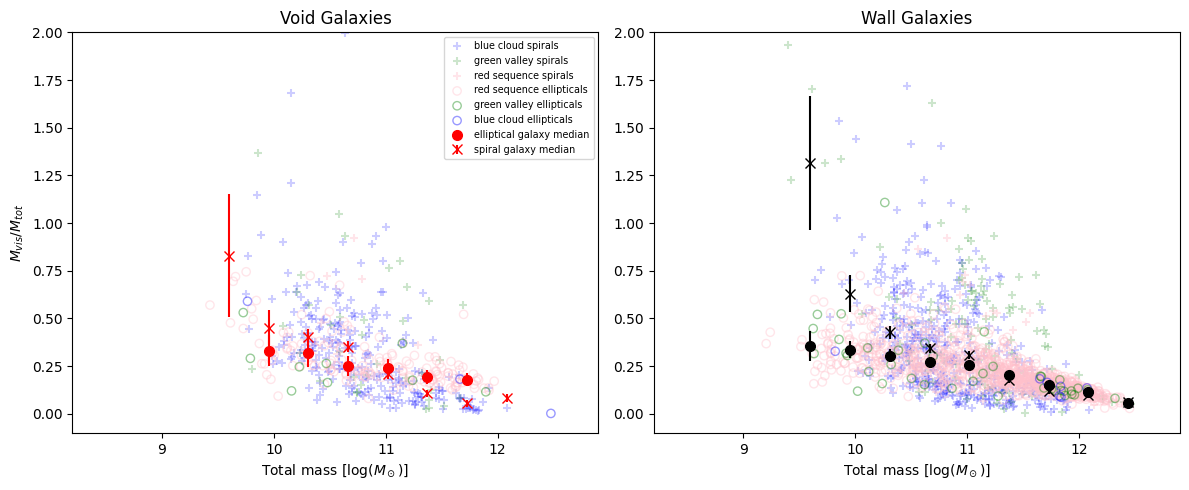

In [272]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#labels

ax[0].set_title('Void Galaxies')
ax[1].set_title('Wall Galaxies')


ax[0].set_ylabel(r'$M_{vis}/M_{tot}$')
ax[0].set_xlabel(r'Total mass [$\log(M_\odot)$]')
ax[1].set_xlabel(r'Total mass [$\log(M_\odot)$]')


ax[1].set_ylim(-0.1,2)
ax[0].set_ylim(-0.1,2)
ax[1].set_xlim(8.2,12.9)
ax[0].set_xlim(8.2,12.9)

# ax[0].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)
# ax[1].plot([8.7,11.5],[8.7,11.5],color='k',alpha=0.2)

ax[0].scatter(s_void[s_void['CMD_class'] == 1]['M_R90'], 10**s_void[s_void['CMD_class'] == 1]['Mvis_Mtot_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 2]['M_R90'], 10**s_void[s_void['CMD_class'] == 2]['Mvis_Mtot_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[0].scatter(s_void[s_void['CMD_class'] == 3]['M_R90'], 10**s_void[s_void['CMD_class'] == 3]['Mvis_Mtot_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[0].scatter(e_void[e_void['CMD_class'] == 3]['Mvir'], 10**e_void[e_void['CMD_class'] == 3]['nsa_Mstar_Mtot'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 2]['Mvir'], 10**e_void[e_void['CMD_class'] == 2]['nsa_Mstar_Mtot'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[0].scatter(e_void[e_void['CMD_class'] == 1]['Mvir'], 10**e_void[e_void['CMD_class'] == 1]['nsa_Mstar_Mtot'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')


ax[1].scatter(s_wall[s_wall['CMD_class'] == 1]['M_R90'], 10**s_wall[s_wall['CMD_class'] == 1]['Mvis_Mtot_R90'],
              color='b', alpha=0.2, marker='+',label='blue cloud spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 2]['M_R90'], 10**s_wall[s_wall['CMD_class'] == 2]['Mvis_Mtot_R90'],
              color='g', alpha=0.2, marker='+', label='green valley spirals')
ax[1].scatter(s_wall[s_wall['CMD_class'] == 3]['M_R90'], 10**s_wall[s_wall['CMD_class'] == 3]['Mvis_Mtot_R90'],
              color='pink', alpha=0.4, marker='+', label='red sequence spirals')

ax[1].scatter(e_wall[e_wall['CMD_class'] == 3]['Mvir'], 10**e_wall[e_wall['CMD_class'] == 3]['nsa_Mstar_Mtot'],
              color='pink', alpha=0.4, marker='o', label='red sequence ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 2]['Mvir'], 10**e_wall[e_wall['CMD_class'] == 2]['nsa_Mstar_Mtot'],
              color='g', alpha=0.4, marker='o', label='green valley ellipticals', facecolor='none')
ax[1].scatter(e_wall[e_wall['CMD_class'] == 1]['Mvir'], 10**e_wall[e_wall['CMD_class'] == 1]['nsa_Mstar_Mtot'],
              color='b', alpha=0.4, marker='o', label='blue cloud ellipticals', facecolor='none')

sp_void_mvis = med_err(s_void_mvis, False, False)
sp_wall_mvis = med_err(s_wall_mvis, False, False)
ep_void_mvis = med_err(e_void_mvis, False, False)
ep_wall_mvis = med_err(e_wall_mvis, False, False)

inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0], uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
ax[0].errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0], uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
ax[0].errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='elliptical galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0], uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
ax[1].errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='spiral galaxy median',linestyle='none', markersize=7,)
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0], uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
ax[1].errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')


ax[0].legend(fontsize='x-small')


fig.tight_layout()
fig.savefig(plot_dir + 'Mtot_MvisMtot_scatter_cmd_morph_env.png')

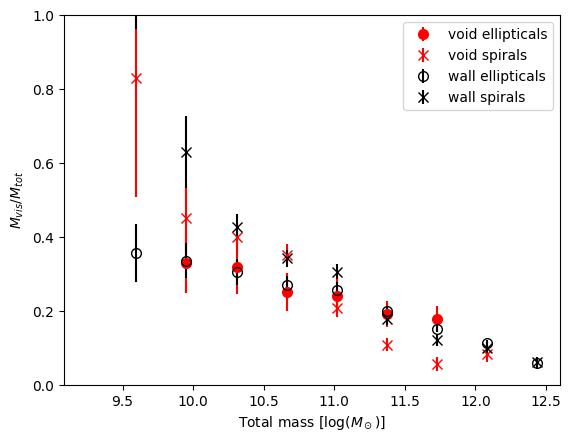

In [273]:
inf_bars = np.where(ep_void_mvis == np.inf)[0]
ep_void_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_void_mvis[:,0], color='r', yerr=[ep_void_mvis[:,1] ,ep_void_mvis[:,2]], 
             marker='o', label='void ellipticals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=ep_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_void_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_void_mvis[:,0], color='r', yerr=[sp_void_mvis[:,1] ,sp_void_mvis[:,2]], 
             marker='x', label='void spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=sp_void_mvis[inf_bars][:,0]-9, uplims=True,
             color='r', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_void_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_void_mvis[inf_bars][:,2]],
            linestyle='none', color='r', mfc='none', mec='none')


inf_bars = np.where(ep_wall_mvis == np.inf)[0]
ep_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, ep_wall_mvis[:,0], color='k', yerr=[ep_wall_mvis[:,1] ,ep_wall_mvis[:,2]], 
             marker='o', label='wall ellipticals',linestyle='none', markersize=7, mfc='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=ep_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], ep_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),ep_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

inf_bars = np.where(sp_void_mvis == np.inf)[0]
sp_wall_mvis[inf_bars][:,0]
plt.errorbar(pts, sp_wall_mvis[:,0], color='k', yerr=[sp_wall_mvis[:,1] ,sp_wall_mvis[:,2]], 
             marker='x', label='wall spirals',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=sp_wall_mvis[inf_bars][:,0]-9, uplims=True,
             color='k', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp_wall_mvis[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp_wall_mvis[inf_bars][:,2]],
            linestyle='none', color='k', mfc='none', mec='none')

plt.ylabel(r'$M_{vis}/M_{tot}$')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')
plt.ylim(0,1)

plt.legend()
plt.savefig(plot_dir + 'Mtot_MvisMtot_median_morph_env.png')

### $\sigma_{M_{DM}}$ vs. Mr ellipticals

In [201]:
mag_bins = np.linspace(np.min(e_mag),
                       np.max(e_mag),
                       15)
pts = (mag_bins[1:] + mag_bins[:-1])/2

mag_bins = np.linspace(np.min([np.min(e_mag), np.min(s_mag)]),
                       np.max([np.max(e_mag), np.max(s_mag)]),
                       30)
pts = (mag_bins[1:] + mag_bins[:-1]) / 2
sigma_dm = (10**ellipticals['Mvir'] - ellipticals['nsa_elpetro_mass']) / np.sqrt((10**ellipticals['Mvir_err'])**2 + (0.1*ellipticals['nsa_elpetro_mass'])**2)
sigma_dm_binned = []

for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        sigma_dm_binned.append(sigma_dm[ellipticals['rabsmag'] <= mag_lim])
        
    else:
        lower_lim = mag_bins[i]
        sigma_dm_binned.append(sigma_dm[np.logical_and(ellipticals['rabsmag'] <= mag_lim, 
                                                       ellipticals['rabsmag'] > lower_lim)])
        
       

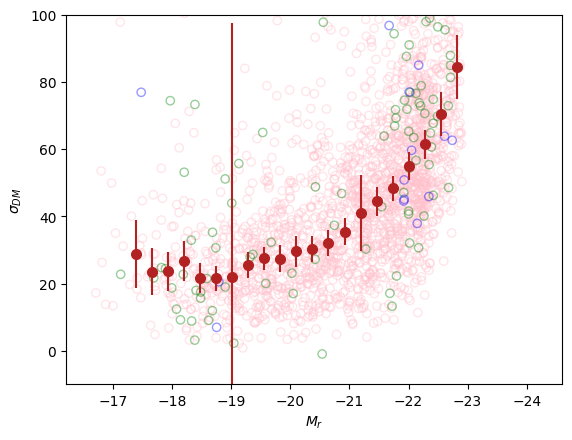

In [210]:
plt.scatter(e_mag[ellipticals['CMD_class'] == 3], sigma_dm[ellipticals['CMD_class'] == 3],
           color='pink', fc='none', alpha=0.4, label='red sequence')
plt.scatter(e_mag[ellipticals['CMD_class'] == 2], sigma_dm[ellipticals['CMD_class'] == 2],
           color='g', fc='none', alpha=0.4, label='green valley')
plt.scatter(e_mag[ellipticals['CMD_class'] == 1], sigma_dm[ellipticals['CMD_class'] == 1],
           color='b', fc='none', alpha=0.4, label='blue cloud')
plt.xlim(-16.2, -24.6)
plt.ylim(-10,100)

sp = med_err(sigma_dm_binned, False, False)

inf_bars = np.where(sp == np.inf)[0]
sp[inf_bars][:,0]
plt.errorbar(pts, sp[:,0], color='firebrick', yerr=[sp[:,1] ,sp[:,2]], 
             marker='o', label='spiral galaxy median',linestyle='none', markersize=7,)
plt.errorbar(pts[inf_bars], sp[inf_bars][:,0], yerr=sp[inf_bars][:,0]-2, uplims=True,
             color='firebrick', linestyle='none', capsize=3, mfc='none', mec='none')
plt.errorbar(pts[inf_bars], sp[inf_bars][:,0], yerr=[np.zeros(len(inf_bars)),sp[inf_bars][:,2]],
            linestyle='none', color='firebrick', mfc='none', mec='none')

plt.xlabel('$M_r$')
plt.ylabel(r'$\sigma_{DM}$')
plt.savefig(plot_dir + 'Mr_sigmaDM_scatter_cmd_ellipticals.png')
plt.show()

In [217]:
Fr_Mvis = np.ones(len(pts))*np.nan

Fr_Mvis_t = ellipticals[ellipticals['Mvir'] < ellipticals['nsa_elpetro_log_mass']]


for i in range(len(pts)):
    mag_lim = mag_bins[i+1]
    if i == 0:
        try:
            Fr_Mvis[i] = (len(Fr_Mvis_t[Fr_Mvis_t['rabsmag'] <= mag_lim]) / len(ellipticals['rabsmag'] <= mag_lim))
        except:
            continue
    else:
        lower_lim = mag_bins[i]
        try:
            Fr_Mvis[i] = (len(Fr_Mvis_t[np.logical_and(Fr_Mvis_t['rabsmag'] <= mag_lim, Fr_Mvis_t['rabsmag'] > lower_lim)])
                      / len(ellipticals[np.logical_and(ellipticals['rabsmag'] <=mag_lim, ellipticals['rabsmag'] > lower_lim)]))
        except:
            continue

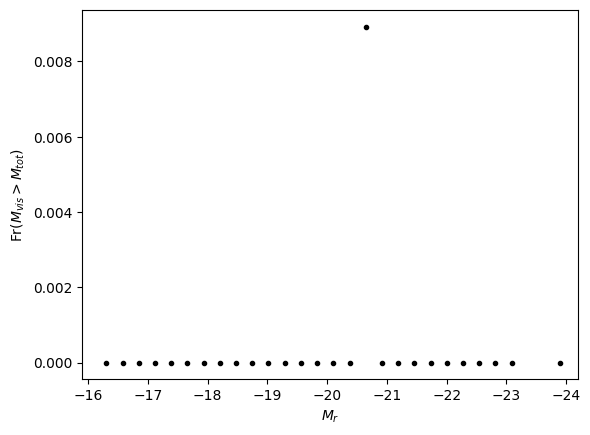

In [222]:
plt.scatter(pts, Fr_Mvis, color='k', marker='.')
plt.xlim(-15.9, -24.2)
plt.xlabel('$M_r$')
plt.ylabel('Fr$(M_{vis} > M_{tot})$')
plt.savefig(plot_dir + 'Mr_FrMvisMtot_scatter_ellipticals.png')
plt.show()

## Histograms

### Pipe3D vs DAP velocity disperison

In [96]:
Pipe3D_sigma_table = Table.read('/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDispDAPMeanSigma_Mvir_smoothness_lt_2_dipole_vflag_comoving_Pipe3D_sigma.fits')
Pipe3D_sigma_table[Pipe3D_sigma_table['Mvir'] > 0][:5]

<Table length=5>
plate ifudsgn   plateifu  ... vflag_VF Pipe3D_star_sigma  Pipe3D_star_sigma_err
int64 bytes32   bytes32   ...  int64        float64              float64       
----- ------- ----------- ... -------- ------------------ ---------------------
10001    3701  10001-3701 ...        0   89.3597901184629   0.30429615201650423
10001    6101  10001-6101 ...        9 181.20427897149176   0.26538403380195114
10001    9102  10001-9102 ...        1 163.12158148902674   0.21305129056283875
10213   12701 10213-12701 ...        9 234.32483354194096    0.1990981768055665
10213   12704 10213-12704 ...        0 228.20715511148177   0.26338709419972484

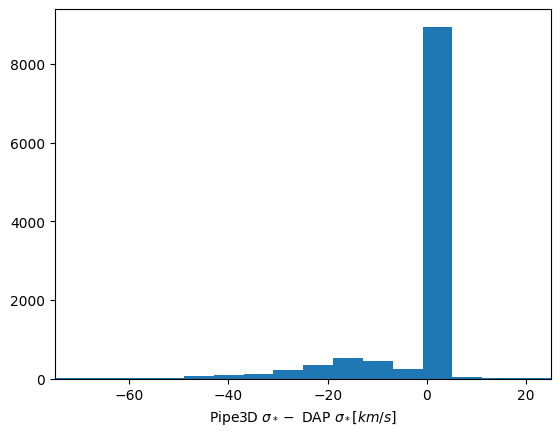

In [97]:
plt.hist(Pipe3D_sigma_table['Pipe3D_star_sigma'] - Pipe3D_sigma_table['star_sigma'],bins=100)
plt.xlim(-75,25)
plt.xlabel(r'Pipe3D $\sigma_* -$ DAP $\sigma_* [km/s]$')
plt.savefig(plot_dir + 'Pipe3D_DAP_sigma_hist_ellipticals.png')
plt.show()

### void vs. wall Mr

In [98]:
r_mag = np.hstack([e_mag, s_mag])

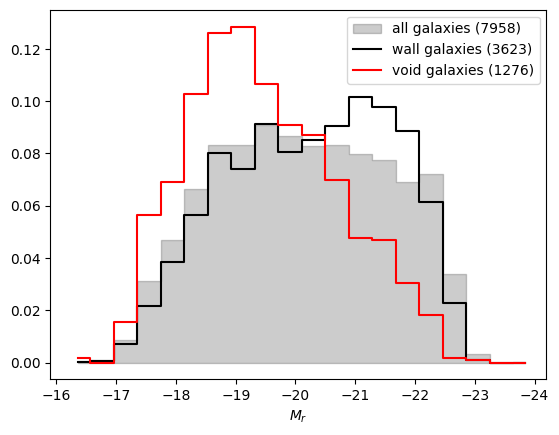

In [99]:
all_mr, bins = np.histogram(r_mag, bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_mr, _ = np.histogram(np.hstack([e_mag[ellipticals['vflag_VF'] == 0], s_mag[spirals['vflag_VF'] == 0]]), bins=bins)
void_mr, _ = np.histogram(np.hstack([e_mag[ellipticals['vflag_VF'] == 1], s_mag[spirals['vflag_VF'] == 1]]), bins=bins)

plt.fill_between(pts, all_mr/np.sum(all_mr), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_mr)))
plt.step(pts, wall_mr/np.sum(wall_mr), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_mr)))
plt.step(pts, void_mr/np.sum(void_mr), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_mr)))

plt.legend()
#plt.xlim(np.max(bins) + 0.2, np.min(bins) - 0.2)
#plt.ylim(0, 760)
plt.xlim(-15.9, -24.2)
plt.xlabel(r'$M_r$')
plt.savefig(plot_dir+'Mr_hist_morph_env.png')
plt.show()

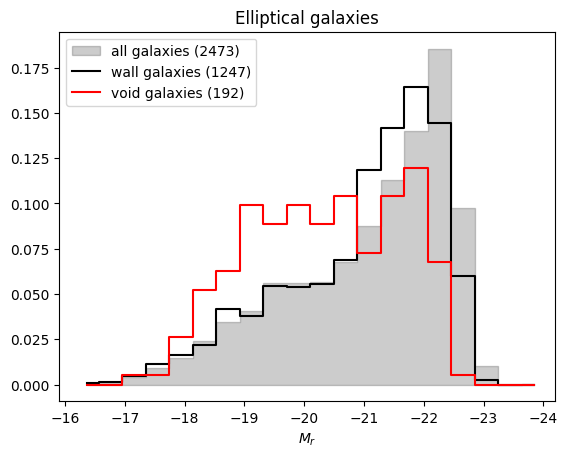

In [100]:
all_mr, bins = np.histogram(e_mag, bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_mr, _ = np.histogram(e_mag[ellipticals['vflag_VF'] == 0], bins=bins)
void_mr, _ = np.histogram(e_mag[ellipticals['vflag_VF'] == 1], bins=bins)

plt.fill_between(pts, all_mr/np.sum(all_mr), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_mr)))
plt.step(pts, wall_mr/np.sum(wall_mr), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_mr)))
plt.step(pts, void_mr/np.sum(void_mr), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_mr)))

plt.legend()
plt.title('Elliptical galaxies')
plt.xlim(-15.9, -24.2)
#plt.ylim(0, 760)
plt.xlabel(r'$M_r$')
plt.savefig(plot_dir+'Mr_hist_ellipticals_env.png')
plt.show()

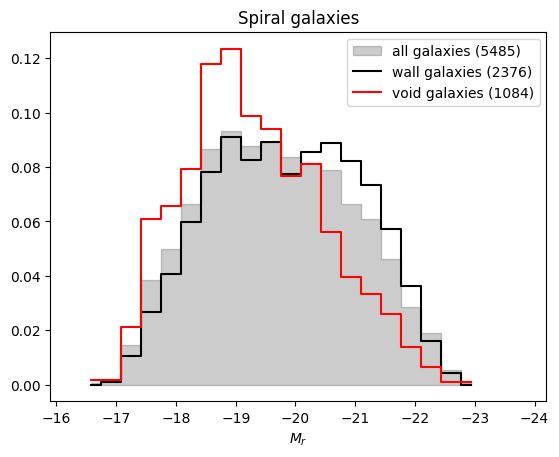

In [101]:
all_mr, bins = np.histogram(s_mag, bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_mr, _ = np.histogram(s_mag[spirals['vflag_VF'] == 0], bins=bins)
void_mr, _ = np.histogram(s_mag[spirals['vflag_VF'] == 1], bins=bins)

plt.fill_between(pts, all_mr/np.sum(all_mr), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_mr)))
plt.step(pts, wall_mr/np.sum(wall_mr), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_mr)))
plt.step(pts, void_mr/np.sum(void_mr), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_mr)))

plt.legend()
plt.xlim(-15.9, -24.2)
plt.xlabel(r'$M_r$')
plt.title('Spiral galaxies')
plt.savefig(plot_dir+'Mr_hist_spirals_env.png')
plt.show()

### void vs. wall total mass

In [102]:
tot_mass = np.hstack([spirals['M_R90'].data, ellipticals['Mvir'].data])

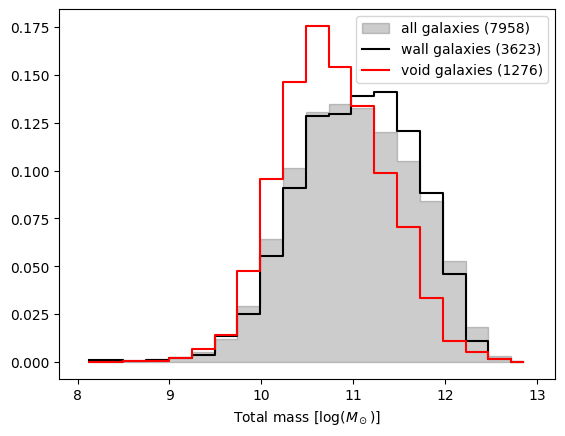

In [103]:
all_mass, bins = np.histogram(tot_mass, bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_mass, _ = np.histogram(np.hstack([ellipticals[ellipticals['vflag_VF'] == 0]['Mvir'].data, 
                   spirals[spirals['vflag_VF'] == 0]['M_R90'].data]), bins=bins)
void_mass, _ = np.histogram(np.hstack([ellipticals[ellipticals['vflag_VF'] == 1]['Mvir'].data, 
                   spirals[spirals['vflag_VF'] == 1]['M_R90'].data]), bins=bins)

plt.fill_between(pts, all_mass/np.sum(all_mass), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_mass)))
plt.step(pts, wall_mass/np.sum(wall_mass), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_mass)))
plt.step(pts, void_mass/np.sum(void_mass), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_mass)))

plt.legend()
plt.xlim(7.8, 13.2)
#plt.ylim(0,1199)
plt.xlabel(r'Total mass [$\log(M_\odot)$]')
plt.savefig(plot_dir+'Mtot_hist_morph_env.png')
plt.show()

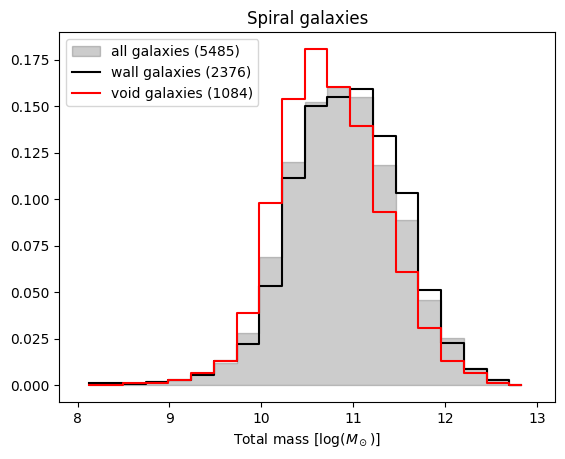

In [104]:
all_mass, bins = np.histogram(spirals['M_R90'], bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_mass, _ = np.histogram(spirals[spirals['vflag_VF'] == 0]['M_R90'].data, bins=bins)
void_mass, _ = np.histogram(spirals[spirals['vflag_VF'] == 1]['M_R90'].data, bins=bins)

plt.fill_between(pts, all_mass/np.sum(all_mass), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_mass)))
plt.step(pts, wall_mass/np.sum(wall_mass), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_mass)))
plt.step(pts, void_mass/np.sum(void_mass), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_mass)))

plt.xlim(7.8, 13.2)
plt.legend()
plt.title('Spiral galaxies')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')
plt.savefig(plot_dir+'Mtot_hist_spirals_env.png')
plt.show()

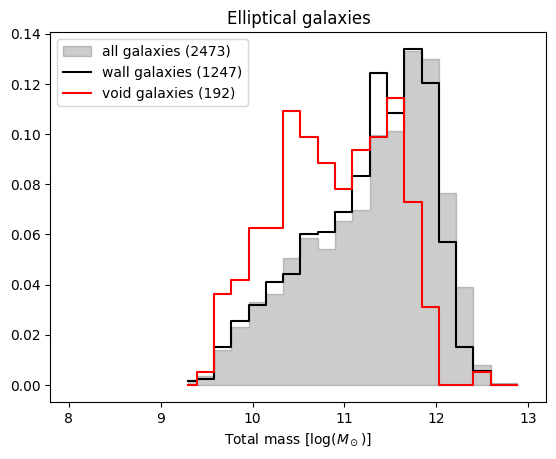

In [105]:
all_mass, bins = np.histogram(ellipticals['Mvir'], bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_mass, _ = np.histogram(ellipticals[ellipticals['vflag_VF'] == 0]['Mvir'].data, bins=bins)
void_mass, _ = np.histogram(ellipticals[ellipticals['vflag_VF'] == 1]['Mvir'].data, bins=bins)

plt.fill_between(pts, all_mass/np.sum(all_mass), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_mass)))
plt.step(pts, wall_mass/np.sum(wall_mass), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_mass)))
plt.step(pts, void_mass/np.sum(void_mass), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_mass)))

plt.legend()

plt.xlim(7.8, 13.2)
plt.title('Elliptical galaxies')
plt.xlabel(r'Total mass [$\log(M_\odot)$]')
plt.savefig(plot_dir+'Mtot_hist_ellipticals_env.png')
plt.show()

### void vs. wall sSFR (dr7)

In [106]:
sSFR = np.hstack([(spirals['SFR'].data - spirals['M90_disk'].data), (ellipticals['SFR'] - np.log10(ellipticals['nsa_elpetro_mass'].data))])

In [107]:
sSFR = sSFR[np.isnan(sSFR) == False]

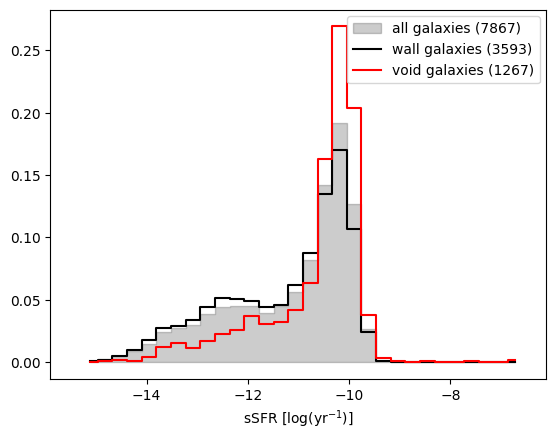

In [108]:
all_sSFR, bins = np.histogram(sSFR, bins=30)
pts = (bins[1:] + bins[:-1])/2
wall_sSFR, _ = np.histogram(np.hstack([ellipticals[ellipticals['vflag_VF'] == 0]['SFR'].data - np.log10(ellipticals[ellipticals['vflag_VF'] == 0]['nsa_elpetro_mass'].data), 
                   spirals[spirals['vflag_VF'] == 0]['SFR'].data - spirals[spirals['vflag_VF'] == 0]['M90_disk'].data]), 
                            bins=bins)
void_sSFR, _ = np.histogram(np.hstack([ellipticals[ellipticals['vflag_VF'] == 1]['SFR'].data - np.log10(ellipticals[ellipticals['vflag_VF'] == 1]['nsa_elpetro_mass'].data), 
                   spirals[spirals['vflag_VF'] == 1]['SFR'].data - spirals[spirals['vflag_VF'] == 1]['M90_disk'].data]), 
                            bins=bins)

plt.fill_between(pts, all_sSFR/np.sum(all_sSFR), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_sSFR)))
plt.step(pts, wall_sSFR/np.sum(wall_sSFR), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_sSFR)))
plt.step(pts, void_sSFR/np.sum(void_sSFR), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_sSFR)))

plt.xlim(-15.9, -6.1)
plt.legend()
plt.xlabel(r'sSFR [$\log($yr$^{-1})$]')
plt.savefig(plot_dir+'sSFR_hist_morph_env.png')
plt.show()

In [109]:
s_sSFR = spirals['SFR'].data - spirals['M90_disk'].data
s_sSFR = s_sSFR[np.isnan(s_sSFR) == False]

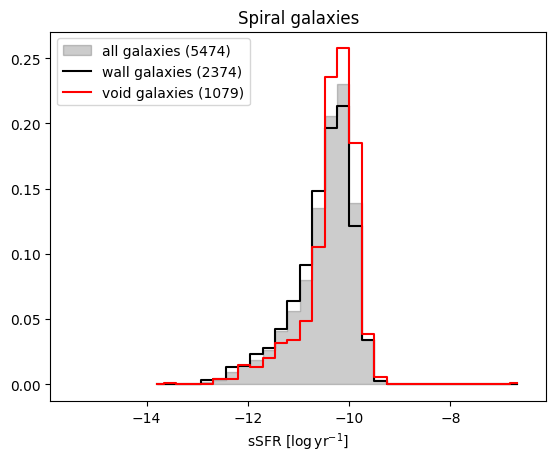

In [110]:
all_sSFR, bins = np.histogram(s_sSFR, bins=30)
pts = (bins[1:] + bins[:-1])/2
wall_sSFR, _ = np.histogram(spirals[spirals['vflag_VF'] == 0]['SFR'].data - spirals[spirals['vflag_VF'] == 0]['M90_disk'].data, 
                            bins=bins)
void_sSFR, _ = np.histogram(spirals[spirals['vflag_VF'] == 1]['SFR'].data - spirals[spirals['vflag_VF'] == 1]['M90_disk'].data, 
                            bins=bins)

plt.fill_between(pts, all_sSFR/np.sum(all_sSFR), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_sSFR)))
plt.step(pts, wall_sSFR/np.sum(wall_sSFR), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_sSFR)))
plt.step(pts, void_sSFR/np.sum(void_sSFR), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_sSFR)))

plt.xlim(-15.9, -6.1)

plt.legend()
plt.title('Spiral galaxies')
plt.xlabel(r'sSFR [$\log$yr$^{-1}$]')
plt.savefig(plot_dir+'sSFR_hist_spirals_env.png')
plt.show()

In [111]:
e_sSFR = ellipticals['SFR'] - np.log10(ellipticals['nsa_elpetro_mass'].data)
e_sSFR = e_sSFR[np.isnan(e_sSFR) == False]
                                       

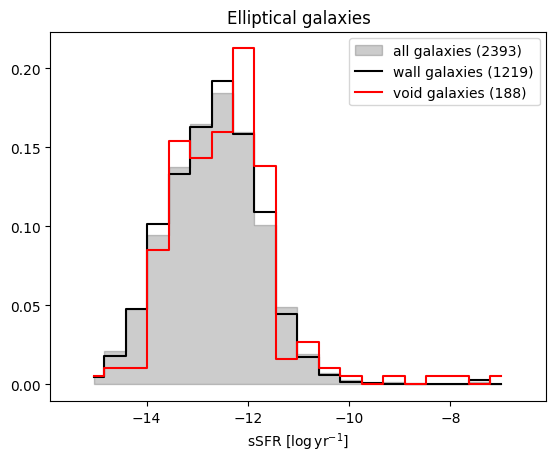

In [112]:
all_sSFR, bins = np.histogram(e_sSFR, bins=20)
pts = (bins[1:] + bins[:-1])/2
wall_sSFR, _ = np.histogram(ellipticals[ellipticals['vflag_VF'] == 0]['SFR'].data - np.log10(ellipticals[ellipticals['vflag_VF'] == 0]['nsa_elpetro_mass'].data), 
                            bins=bins)
void_sSFR, _ = np.histogram(ellipticals[ellipticals['vflag_VF'] == 1]['SFR'].data - np.log10(ellipticals[ellipticals['vflag_VF'] == 1]['nsa_elpetro_mass'].data),
                            bins=bins)

plt.fill_between(pts, all_sSFR/np.sum(all_sSFR), 0, step = 'mid', color='k', alpha=0.2, label='all galaxies ({})'.format(np.sum(all_sSFR)))
plt.step(pts, wall_sSFR/np.sum(wall_sSFR), color='k', where='mid', label='wall galaxies ({})'.format(np.sum(wall_sSFR)))
plt.step(pts, void_sSFR/np.sum(void_sSFR), color='r', where='mid', label='void galaxies ({})'.format(np.sum(void_sSFR)))

plt.xlim(-15.9, -6.1)
plt.xlabel(r'sSFR [$\log$yr$^{-1}$]')
plt.title('Elliptical galaxies')
plt.legend()
plt.savefig(plot_dir+'sSFR_hist_ellipticals_env.png')
plt.show()

### void vs. wall spiral vs elliptical hist

In [13]:
bins = ['void', 'wall']
s_count = [len(s_void), len(s_wall)]
e_count = [len(e_void), len(e_wall)]

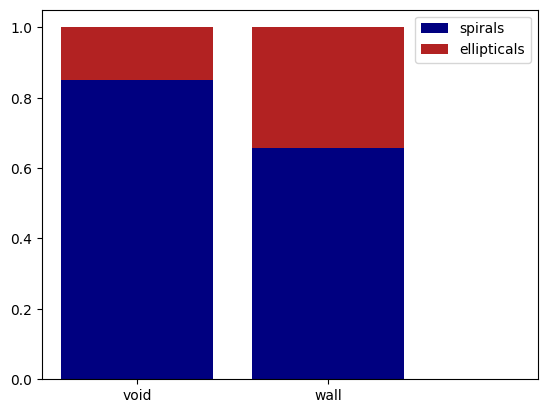

In [162]:
plt.bar('void', len(s_void)/(len(s_void)+len(e_void)), 0.8, bottom=0, color='navy')
plt.bar('void', len(e_void)/(len(s_void)+len(e_void)), 0.8,  bottom=len(s_void)/(len(s_void)+len(e_void)), 
        color='firebrick')
plt.bar('wall', len(s_wall)/(len(s_wall)+len(e_wall)), 0.8, label='spirals', bottom=0,  color='navy')
plt.bar('wall', len(e_wall)/(len(s_wall)+len(e_wall)), 0.8, label='ellipticals', bottom=len(s_wall)/(len(s_wall)+len(e_wall)),
        color='firebrick')
plt.legend(loc='upper right')
plt.xlim(-0.5,2.1)
plt.savefig(plot_dir + 'env_hist_morph.png')
plt.show()

In [132]:
all_targs = master_table[master_table['mngtarg1']>1]

In [138]:
not_in_sample = []
for i in range(len(all_targs['plateifu'])):
    if master_table['plateifu'][i] not in spirals['plateifu']:
        if master_table['plateifu'][i] not in ellipticals['plateifu']:
            not_in_sample.append(i)

In [140]:
targ_not_in_sample = all_targs[not_in_sample]

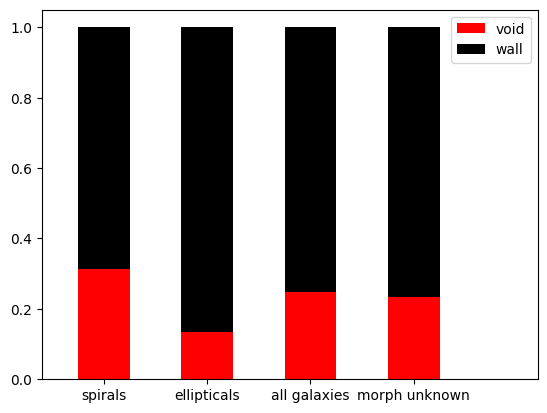

In [161]:
plt.bar('spirals', len(s_void)/(len(s_void) + len(s_wall)), 0.5, bottom= 0, color='r', label='void')
plt.bar('spirals', len(s_wall)/(len(s_void) + len(s_wall)), 0.5, bottom = len(s_void)/(len(s_void) + len(s_wall)), color='k', label='wall')
plt.bar('ellipticals', len(e_void)/(len(e_void) + len(e_wall)), 0.5, bottom= 0, color='r')
plt.bar('ellipticals', len(e_wall)/(len(e_void) + len(e_wall)), 0.5, bottom = len(e_void)/(len(e_void) + len(e_wall)), color='k')
plt.bar('all galaxies', len(master_table[master_table['vflag_VF'] == 1])
        /(len(master_table[master_table['vflag_VF'] == 1]) + len(master_table[master_table['vflag_VF'] == 0])), 
        0.5, bottom= 0, color='r')
plt.bar('all galaxies', len(master_table[master_table['vflag_VF'] == 0])
        /(len(master_table[master_table['vflag_VF'] == 1]) + len(master_table[master_table['vflag_VF'] == 0])), 
        0.5, bottom= len(master_table[master_table['vflag_VF'] == 1])
        /(len(master_table[master_table['vflag_VF'] == 1]) + len(master_table[master_table['vflag_VF'] == 0])), color='k')

plt.bar('morph unknown', len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])
        /(len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1]) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])), 
        0.5, bottom= 0, color='r')
plt.bar('morph unknown', len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])
        /(len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1]) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])), 
        0.5, bottom= len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])
        /(len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1]) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])), color='k')

plt.legend()
plt.xlim(-0.6,4.2)
plt.savefig(plot_dir + 'morph_hist_env.png')
plt.show()

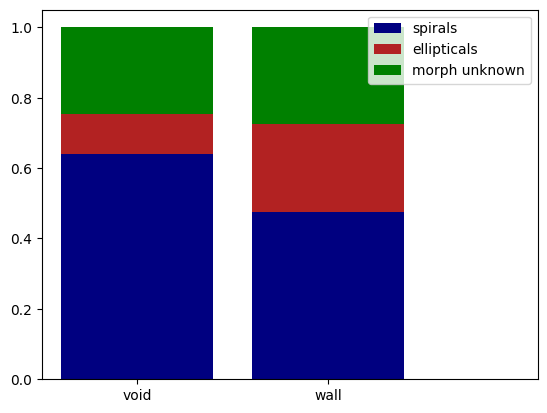

In [160]:
plt.bar('void', len(s_void)/(len(s_void)+len(e_void) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])), 
        0.8, bottom=0, color='navy')
plt.bar('void', len(e_void)/(len(s_void)+len(e_void) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])), 
        0.8,  bottom=len(s_void)/(len(s_void)+len(e_void) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])), 
        color='firebrick')
plt.bar('void', len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])
        /(len(s_void)+len(e_void) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])), 0.8,
        bottom=(len(s_void) + len(e_void))/(len(s_void)+len(e_void) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 1])),
        color='g')
plt.bar('wall', len(s_wall)/(len(s_wall)+len(e_wall) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])), 0.8, 
        label='spirals', bottom=0,  color='navy')
plt.bar('wall', len(e_wall)/(len(s_wall)+len(e_wall) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])), 0.8, 
        label='ellipticals', bottom=len(s_wall)/(len(s_wall)+len(e_wall) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])),
        color='firebrick')
plt.bar('wall', len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])
        /(len(s_wall)+len(e_wall) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])), 0.8,
         bottom=(len(s_wall) + len(e_wall))/(len(s_wall)+len(e_wall) + len(targ_not_in_sample[targ_not_in_sample['vflag_VF'] == 0])),
        label='morph unknown',
        color='g')

plt.legend(loc='upper right')
plt.xlim(-0.5,2.1)
plt.savefig(plot_dir + 'env_hist_morph_unclassified.png')
plt.show()